In [4]:
# !pip install pandas
# !pip install ecg-plot
# !pip install -U matplotlib

     ---------------------------------------- 7.2/7.2 MB 21.9 MB/s eta 0:00:00
     ---------------------------------------- 55.4/55.4 KB ? eta 0:00:00
     ------------------------------------- 957.2/957.2 KB 15.0 MB/s eta 0:00:00
     ---------------------------------------- 3.3/3.3 MB 20.9 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\user\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
import datatable as dt
import pandas as pd

In [3]:
#용량이 큰 csv 파일을 불러올 때 datatable package를 쓴다."
test_df = dt.fread("../DWC/sample-data/180002135/signal_convert_decimal_origin.csv",header=False, columns=["Timestamp","ECG","Signal"]).to_pandas()

In [4]:
# ECG중 "II"인 row를 뽑아 저장
df = test_df[test_df["ECG"]=="II"]

## 데이터 양이 적을때 권장 2GB까지는 확인

In [4]:
# ECG가 II인 row의 Signal label을 전처리 하기 위해 split함수 사용
split = df.Signal.str.split(" ")

In [ ]:
#split은 list로 반환이 된다. 그러므로 Dataframe의 Series로 바꿔 저장
split = split.apply(lambda x:pd.Series(x))

In [ ]:
split

In [ ]:
#기존의 ECG중 "II"인 row를 뽑아 저장한 변수에서 Signal label을 지우고 split한 label을 넣기 위해 drop
df.drop(columns="Signal",inplace=True)

In [ ]:
#merge와 같은 기능
output=pd.concat([df,split], axis=1)

In [ ]:
#전처리 한 내용을 csv로 저장(경로를 따로 지정해도 됨)
output.to_csv("../DWC/sample-data/180002135/signal_II.csv")

## <아래는 데이터 양이 많을때 사용하는걸 권장>

In [5]:
df1 = df.iloc[:100000,:]
df2 = df.iloc[100000:200000,:]
df3 = df.iloc[200000:300000,:]
df4 = df.iloc[300000:400000,:]
df5 = df.iloc[400000:,:]

In [6]:
split1 = df1.Signal.str.split(" ")
split1 = split1.apply(lambda x:pd.Series(x))

In [7]:
split2 = df2.Signal.str.split(" ")
split2 = split2.apply(lambda x:pd.Series(x))

In [8]:
split3 = df3.Signal.str.split(" ")
split3 = split3.apply(lambda x:pd.Series(x))

In [9]:
split4 = df4.Signal.str.split(" ")
split4 = split4.apply(lambda x:pd.Series(x))

In [10]:
split5 = df5.Signal.str.split(" ")
split5 = split5.apply(lambda x:pd.Series(x))

In [11]:
df.drop(columns="Signal",inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_6740\2539654901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns="Signal",inplace=True)


In [12]:
split5

,0,1,2,3,4,5,6,7,8,9,...,2550,2551,2552,2553,2554,2555,2556,2557,2558,2559
1200032,0.63,0.66,0.635,0.585,0.535,0.5,0.485,0.52,0.565,0.61,...,0.44,0.48,0.475,0.455,0.44,0.385,0.35,0.36,0.455,0.5
1200033,0.49,0.475,0.51,0.58,0.625,0.62,0.59,0.55,0.515,0.47,...,0.385,0.365,0.395,0.455,0.55,0.66,0.75,0.865,0.985,1.165
1200035,1.38,1.63,1.775,1.835,1.89,1.905,1.815,1.585,1.335,1.1,...,0.47,0.545,0.575,0.58,0.54,0.44,0.32,0.3,0.4,0.53
1200037,0.575,0.585,0.625,0.625,0.545,0.495,0.495,0.535,0.55,0.58,...,0.515,0.485,0.455,0.395,0.385,0.4,0.455,0.515,0.555,0.55
1200040,0.495,0.435,0.335,0.29,0.305,0.375,0.415,0.44,0.435,0.38,...,0.4,0.33,0.3,0.32,0.425,0.48,0.48,0.48,0.465,0.435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1492532,0.37,0.53,0.685,0.685,0.595,0.55,0.51,0.395,0.345,0.455,...,0.56,0.515,0.495,0.505,0.515,0.52,0.535,0.575,0.57,0.535
1492534,0.28,0.255,0.265,0.295,0.335,0.335,0.37,0.41,0.44,0.445,...,0.51,0.515,0.51,0.52,0.53,0.58,0.575,0.54,0.505,0.49
1492537,0.495,0.505,0.515,0.515,0.535,0.56,0.585,0.535,0.51,0.485,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
1492539,0.5,0.49,0.505,0.52,0.54,0.505,0.47,0.455,0.465,0.47,...,0.435,0.35,0.39,0.59,0.7,0.66,0.58,0.54,0.48,0.365


In [13]:
split = pd.concat([split1,split2],axis=0)
split = pd.concat([split,split3],axis=0)
split = pd.concat([split,split4],axis=0)
split = pd.concat([split,split5],axis=0)

In [14]:
output=pd.concat([df,split], axis=1)

In [15]:
output

,Timestamp,ECG,0,1,2,3,4,5,6,7,...,2550,2551,2552,2553,2554,2555,2556,2557,2558,2559
0,2022-01-18 16:04:43.062 +09:00,II,-40.46,-40.46,-40.46,-40.46,-40.46,-40.46,-40.46,-40.46,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
1,2022-01-18 16:04:48.182 +09:00,II,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,-0.995,-1.005,-1.005,-1.01,-1.015,-1.03,-1.025,-1.03,-1.015,-1.02
5,2022-01-18 16:05:01.522 +09:00,II,-1.015,-1.015,-1.04,-1.06,-1.05,-1.025,-1.005,-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,2022-01-18 16:05:22.945 +09:00,II,-2.375,-2.385,-2.39,-2.415,-2.4,-2.4,-2.39,-2.365,...,-1.625,-1.615,-1.63,-1.655,-1.7,-1.7,-1.72,-1.755,-1.76,-1.78
22,2022-01-18 16:05:28.065 +09:00,II,-1.8,-1.825,-1.8,-1.77,-1.745,-1.755,-1.755,-1.755,...,-0.7,-0.7,-0.725,-0.725,-0.735,-0.75,-0.75,-0.745,-0.74,-0.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1492532,2022-02-17 10:40:36.596 +09:00,II,0.37,0.53,0.685,0.685,0.595,0.55,0.51,0.395,...,0.56,0.515,0.495,0.505,0.515,0.52,0.535,0.575,0.57,0.535
1492534,2022-02-17 10:40:38.167 +09:00,II,0.28,0.255,0.265,0.295,0.335,0.335,0.37,0.41,...,0.51,0.515,0.51,0.52,0.53,0.58,0.575,0.54,0.505,0.49
1492537,2022-02-17 10:40:41.716 +09:00,II,0.495,0.505,0.515,0.515,0.535,0.56,0.585,0.535,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
1492539,2022-02-17 10:40:43.287 +09:00,II,0.5,0.49,0.505,0.52,0.54,0.505,0.47,0.455,...,0.435,0.35,0.39,0.59,0.7,0.66,0.58,0.54,0.48,0.365


In [16]:
output.to_csv("../DWC/sample-data/180002135/signal_II.csv")

In [2]:
import matplotlib.pyplot as plt
import ecg_plot as ep
import pandas as pd

In [3]:
ecg = pd.read_csv("Sig_split.csv")

In [4]:
ecg.drop(columns=["Unnamed: 0","Timestamp","ECG"],inplace=True)

In [5]:
ecg.iloc[:,:]

,0,1,2,3,4,5,6,7,8,9,...,2550,2551,2552,2553,2554,2555,2556,2557,2558,2559
0,-40.460,-40.460,-40.460,-40.460,-40.460,-40.46,-40.460,-40.460,-40.460,-40.460,...,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.50,0.500,0.50
1,0.500,0.500,0.500,0.500,0.500,0.50,0.500,0.500,0.500,0.500,...,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.50,0.500,0.50
2,0.500,0.500,0.500,0.500,0.500,0.50,0.500,0.500,0.500,0.500,...,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.50,0.500,0.50
3,0.500,0.500,0.500,0.500,0.500,0.50,0.500,0.500,0.500,0.500,...,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.50,0.500,0.50
4,0.500,0.500,0.500,0.500,0.500,0.50,0.500,0.500,0.500,0.500,...,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.50,0.500,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2313,0.655,0.665,0.680,0.705,0.740,0.79,0.870,0.940,1.025,1.130,...,0.780,0.770,0.760,0.755,0.745,0.710,0.725,0.87,0.890,0.75
2314,0.715,0.730,0.745,0.755,0.855,0.92,0.970,1.060,1.165,1.290,...,0.745,0.750,0.740,0.745,0.745,0.740,0.740,0.74,0.740,0.73
2315,0.740,0.740,0.750,0.750,0.750,0.75,0.785,0.850,0.865,0.855,...,0.675,0.685,0.680,0.690,0.685,0.680,0.690,0.69,0.690,0.68
2316,0.685,0.690,0.690,0.690,0.695,0.69,0.690,0.690,0.725,0.765,...,0.600,0.575,0.575,0.595,0.610,0.605,0.605,0.63,0.630,0.66


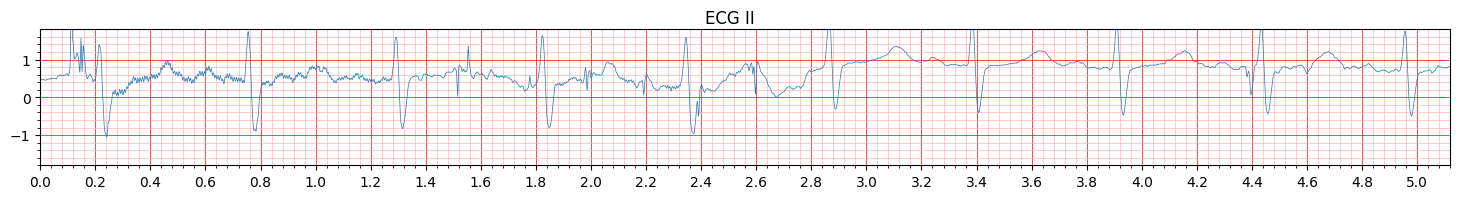

In [6]:
# sample_rate: Hz , ecg_amp: ylim(?) , fig_height: plot height
# https://github.com/dy1901/ecg_plot/blob/master/ecg_plot/ecg_plot.py
ep.plot_1(ecg.iloc[2300,:], sample_rate = 500, title = 'ECG II')
#ep.save_as_png('example_ecg')
ep.show()

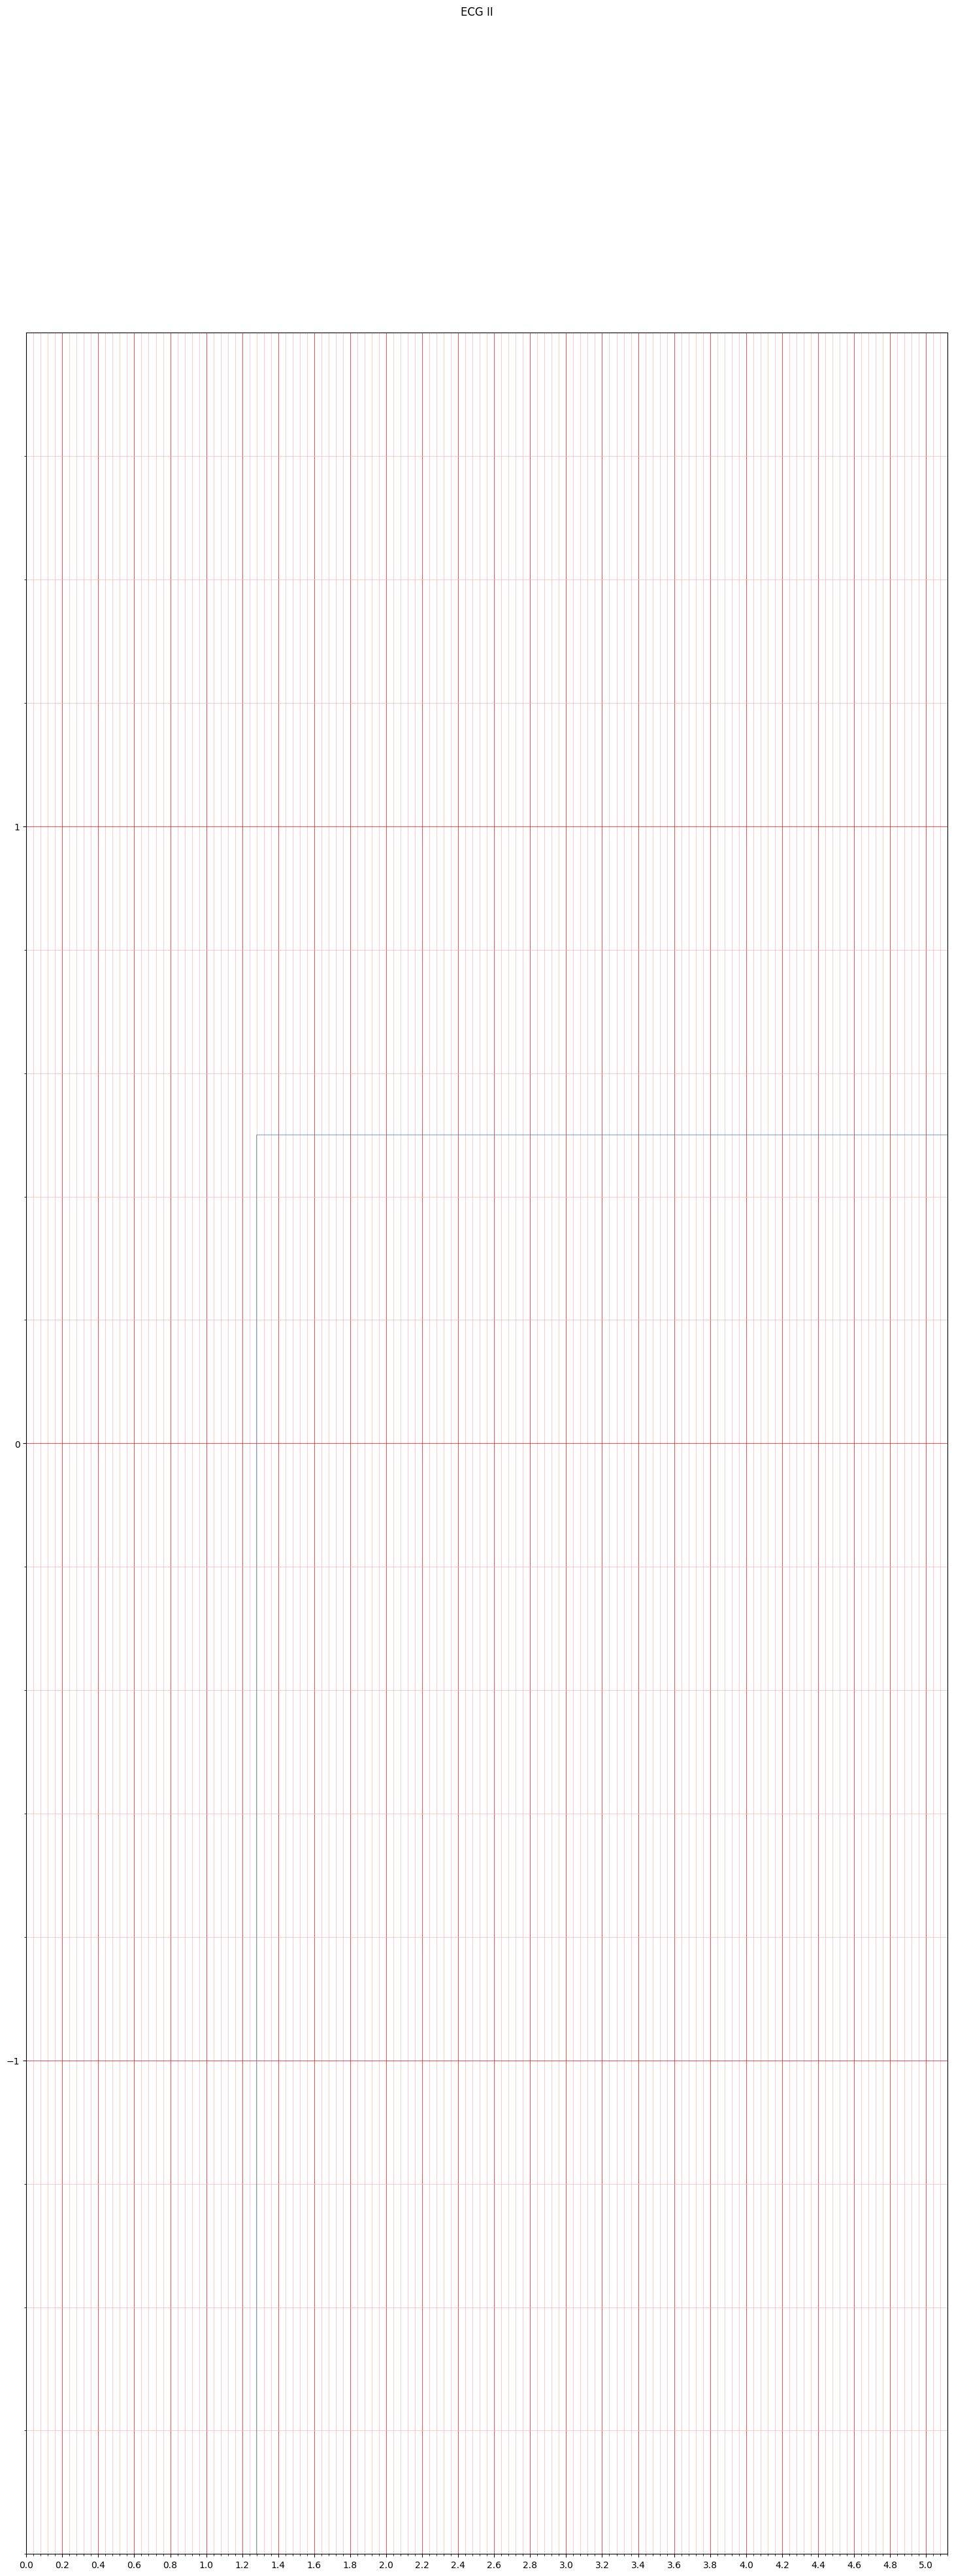

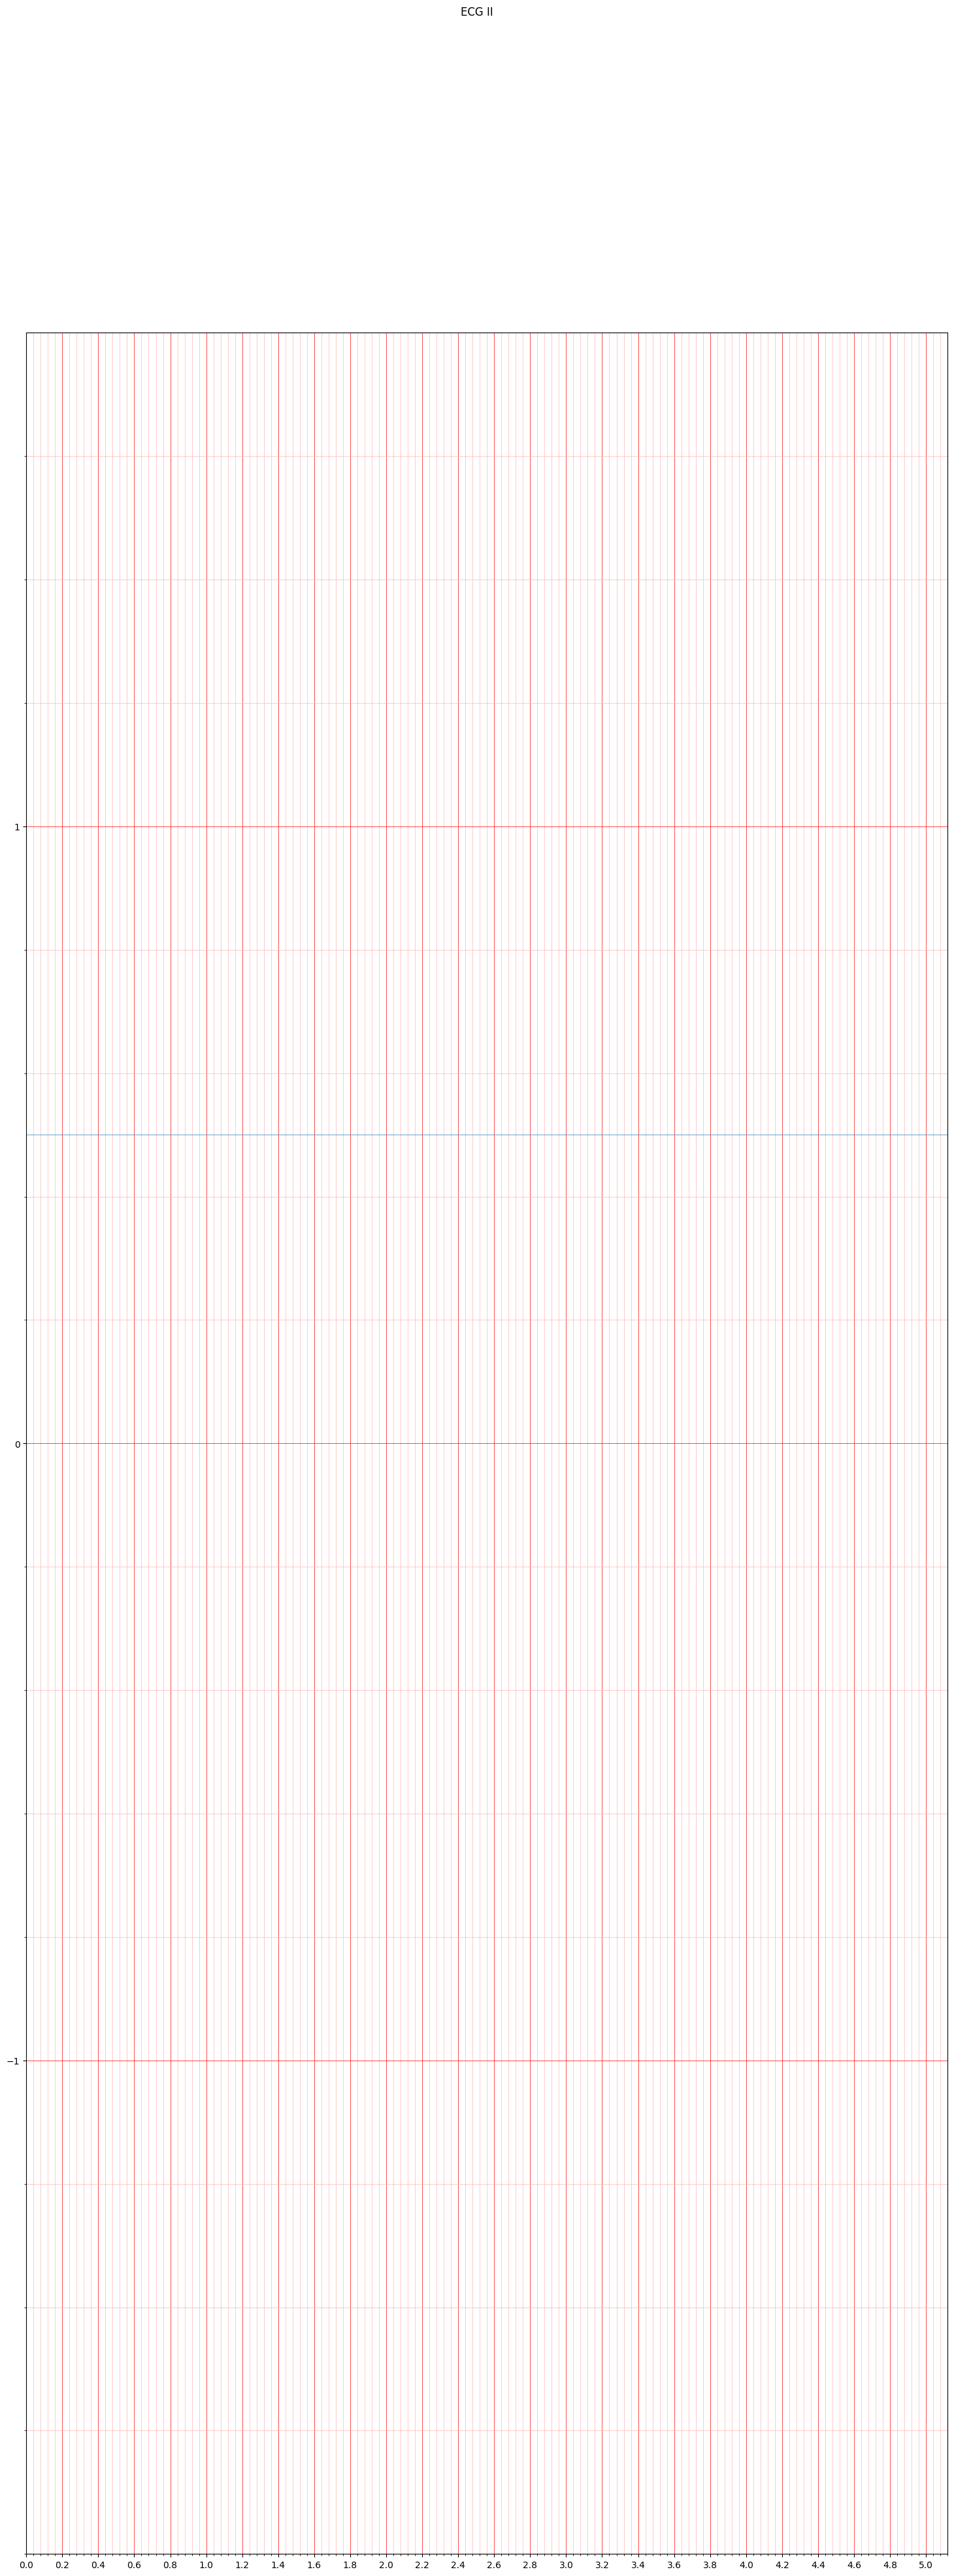

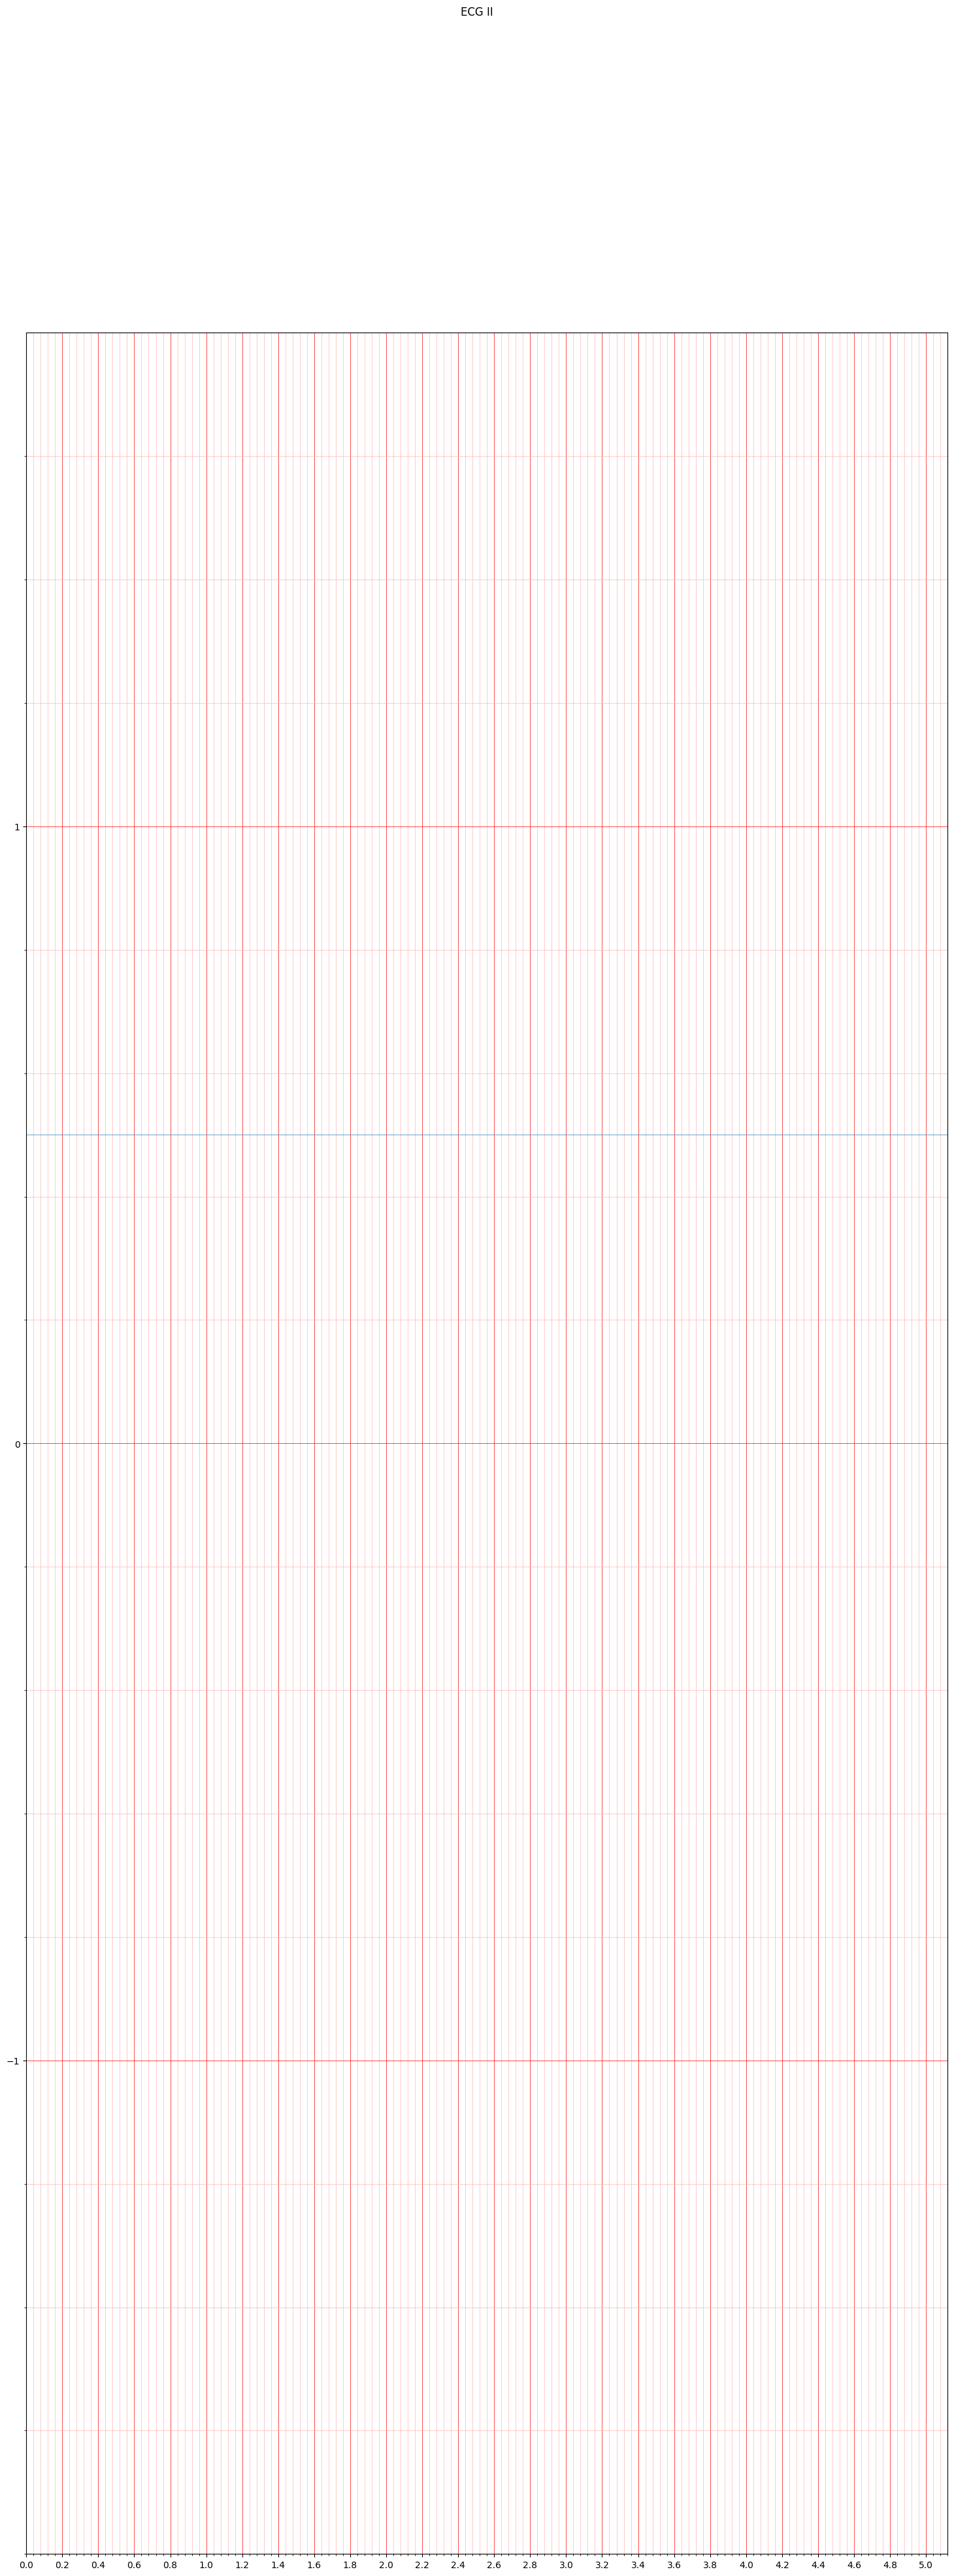

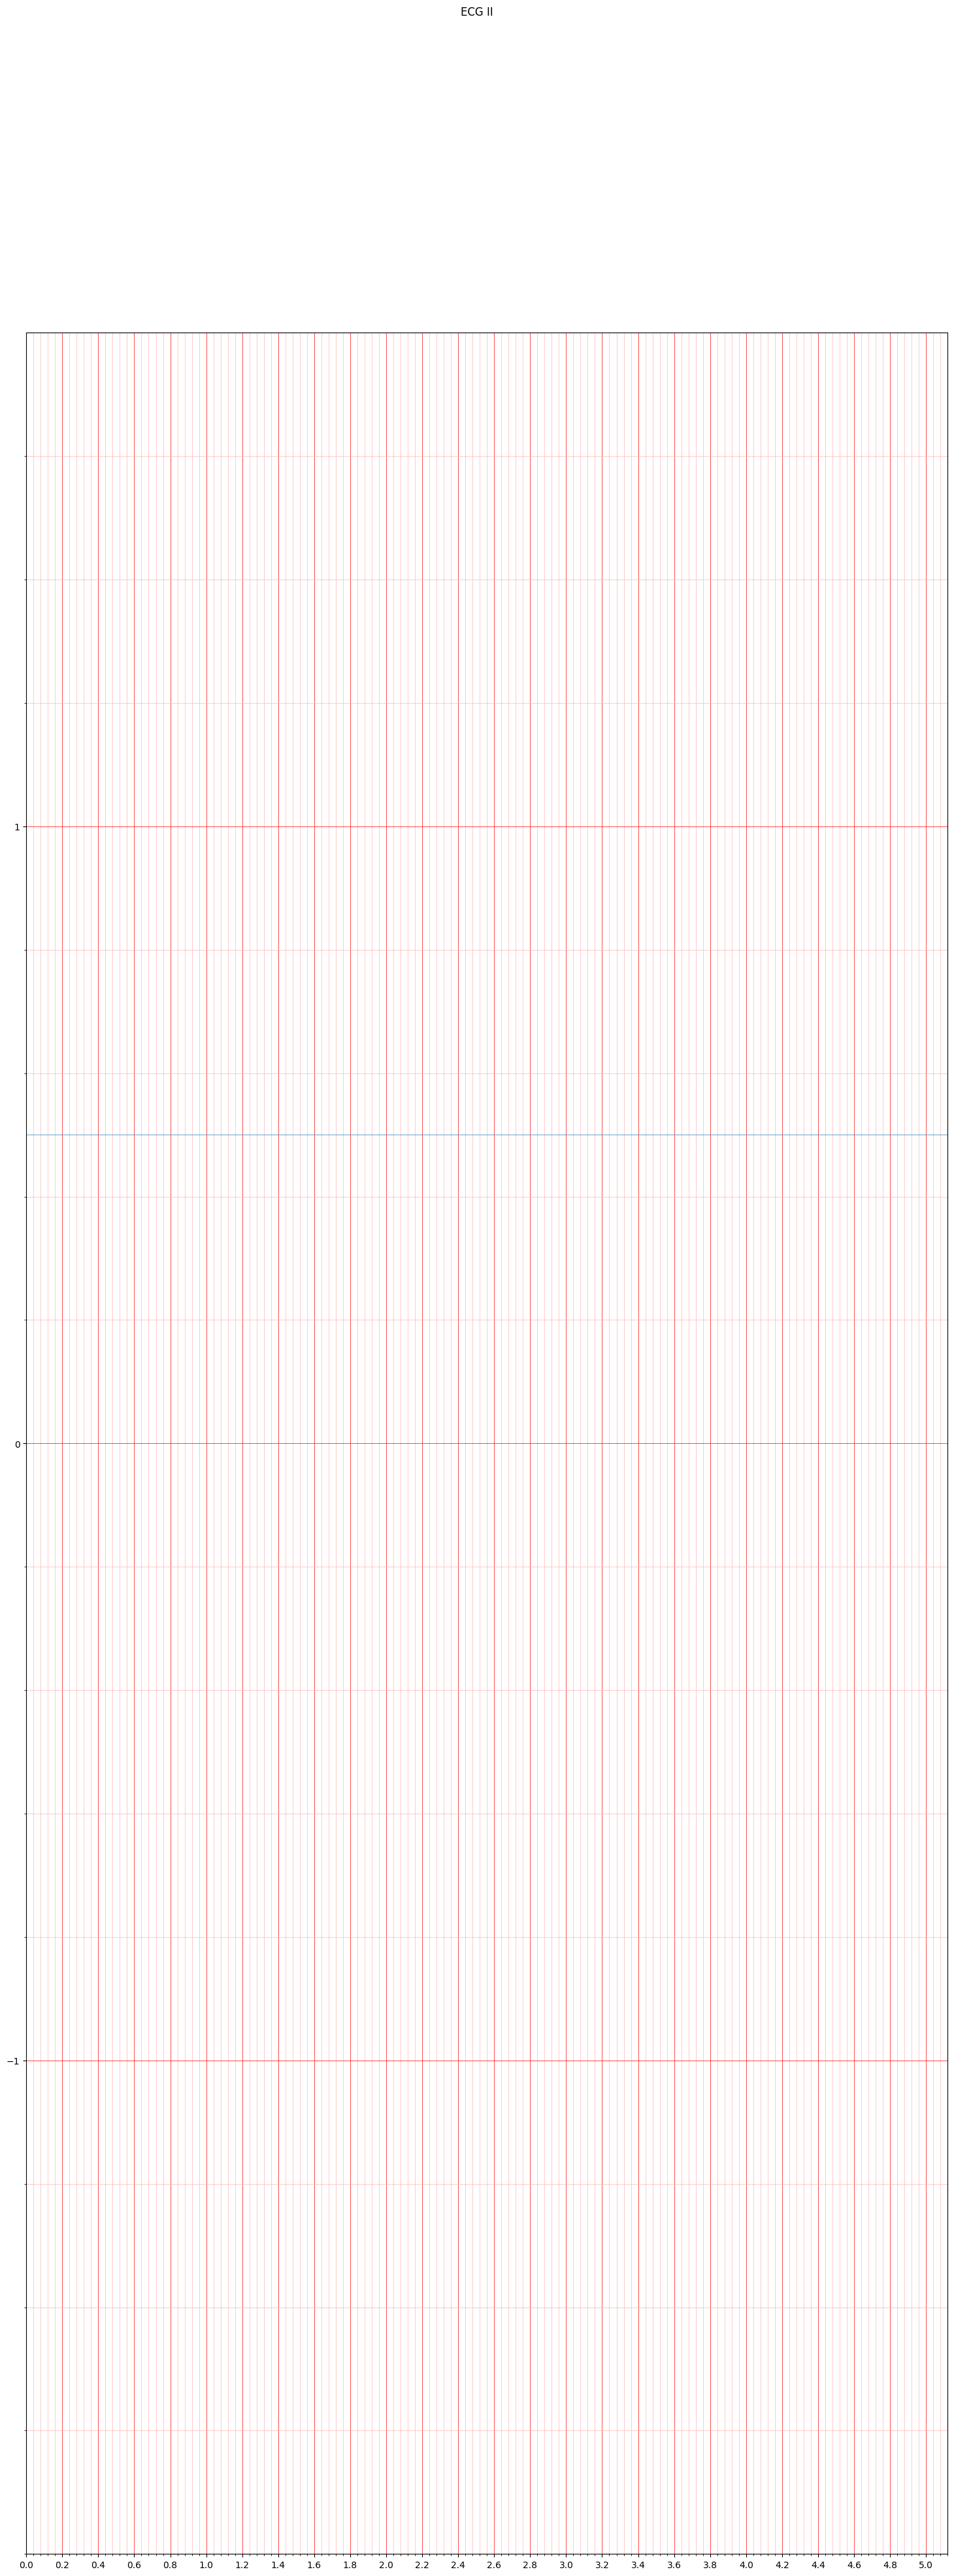

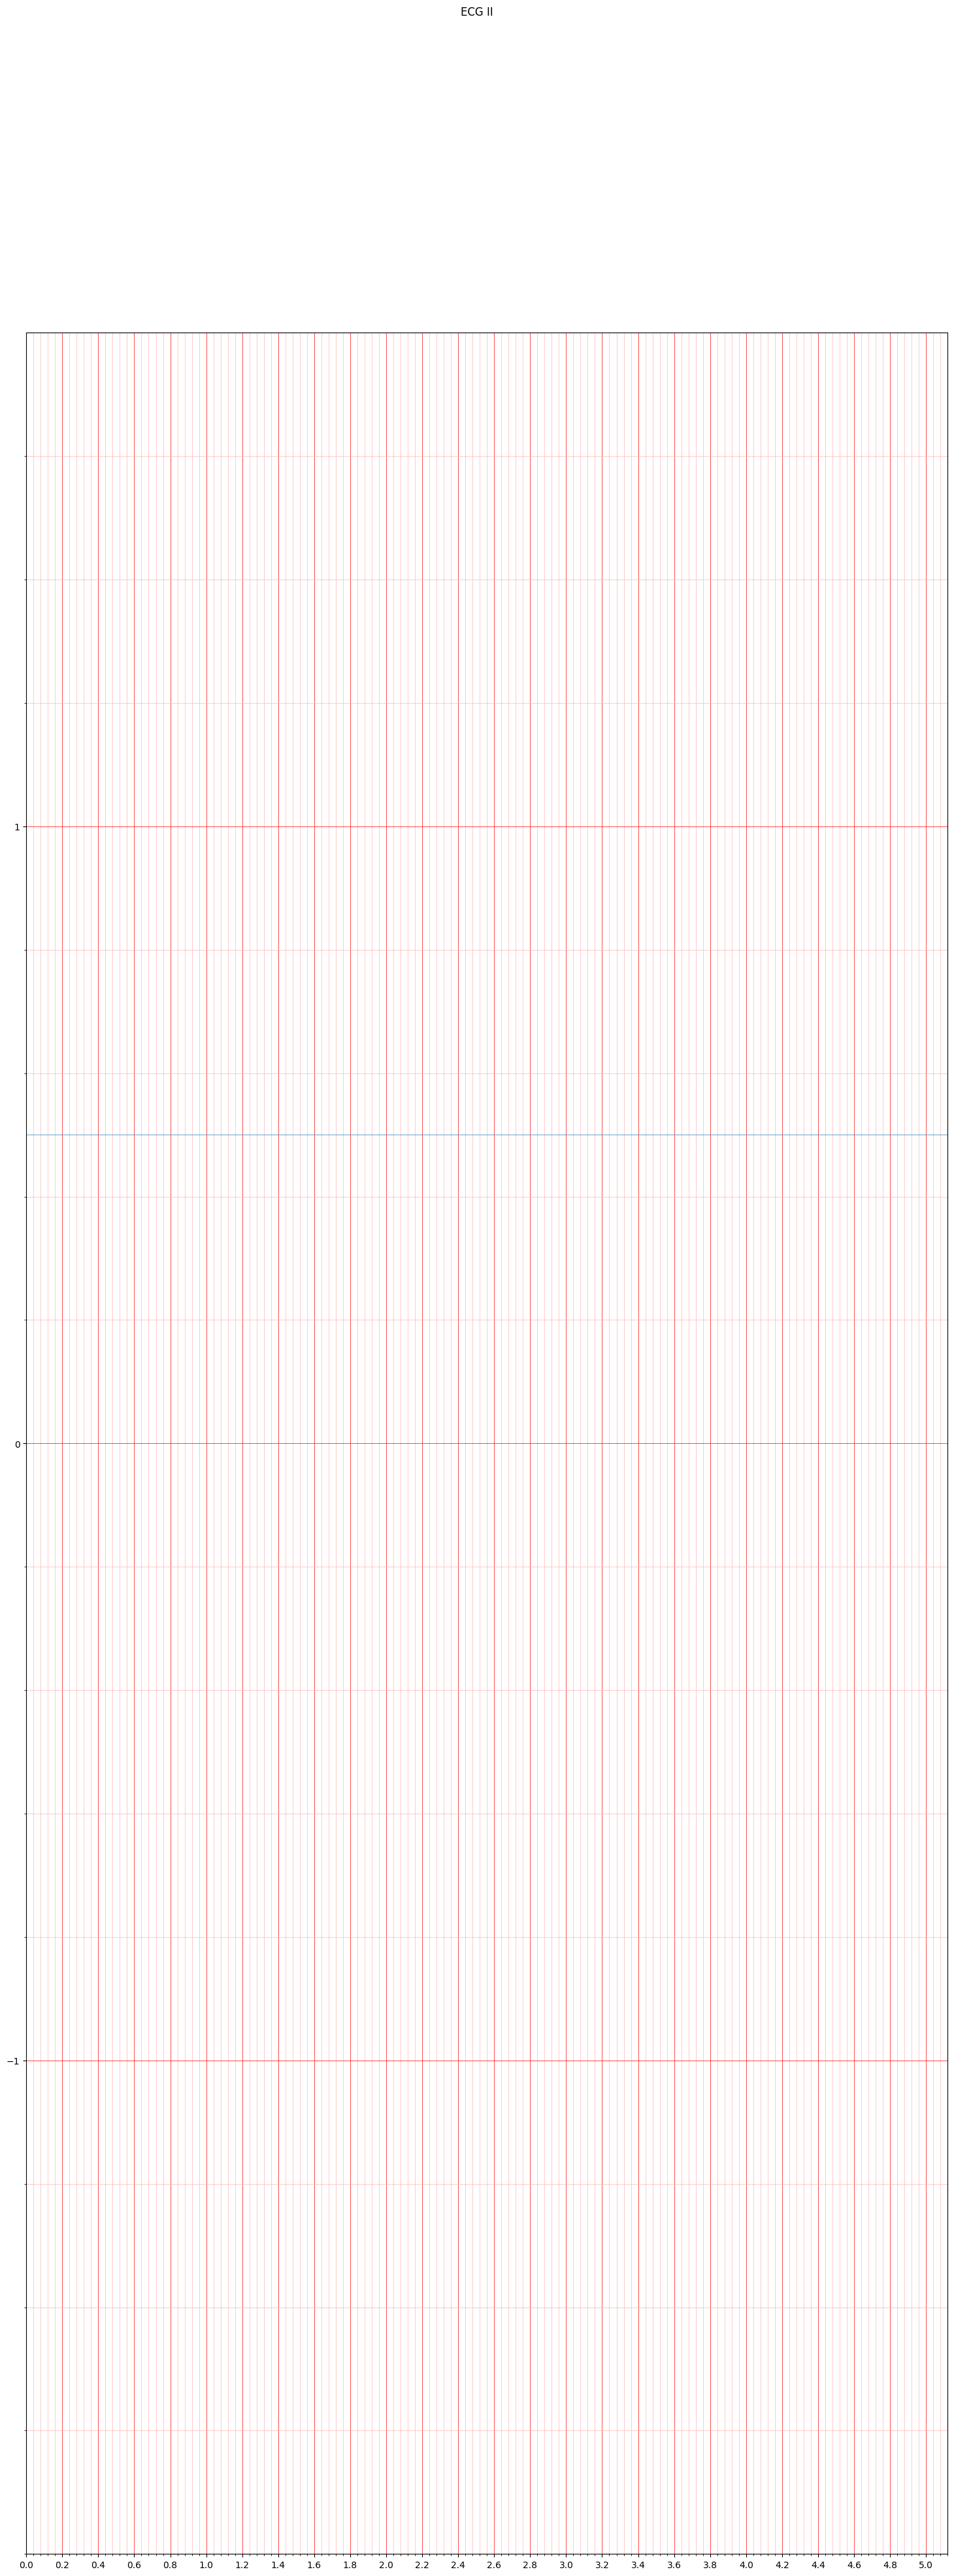

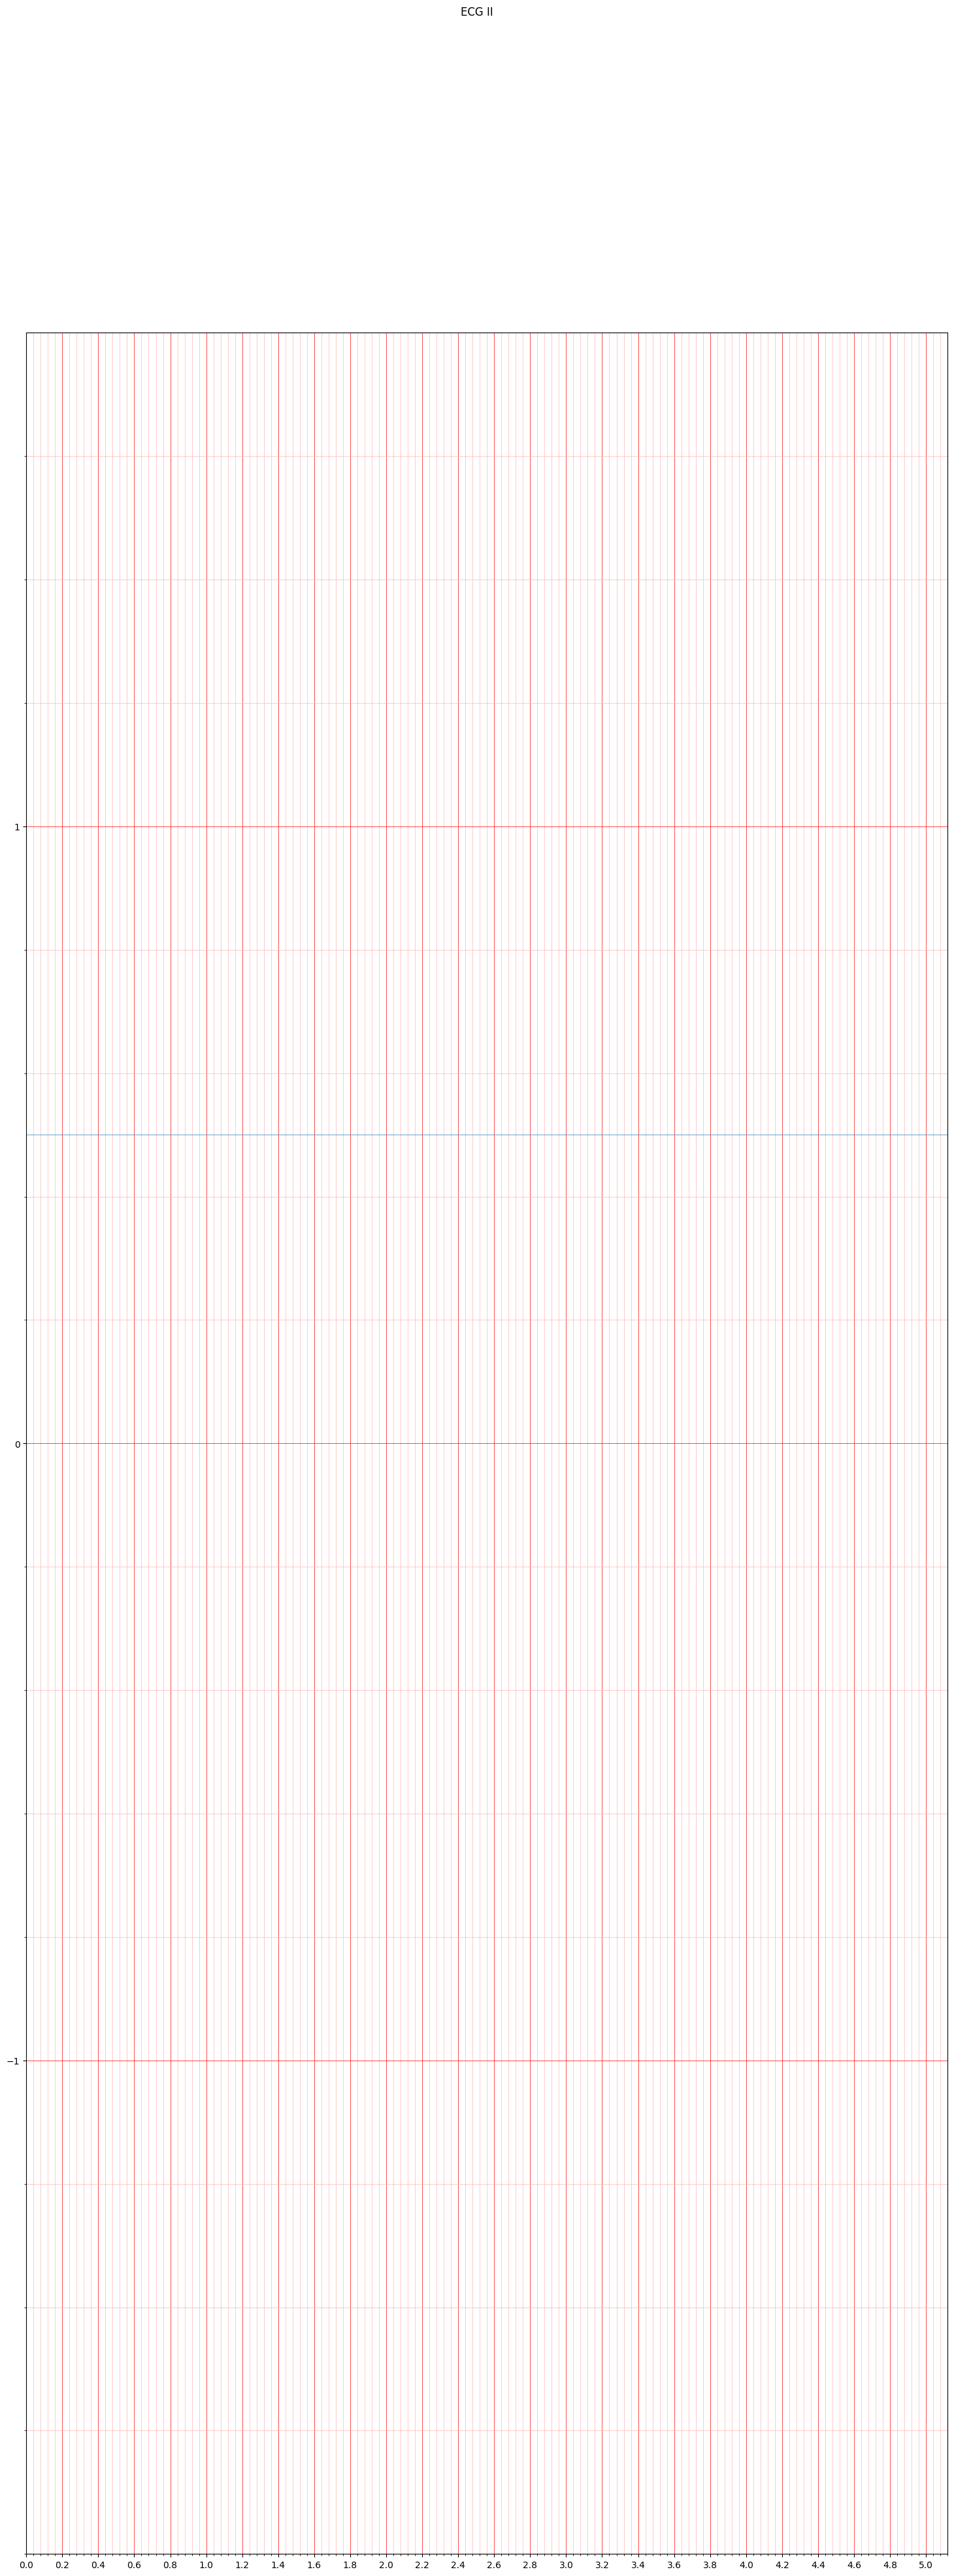

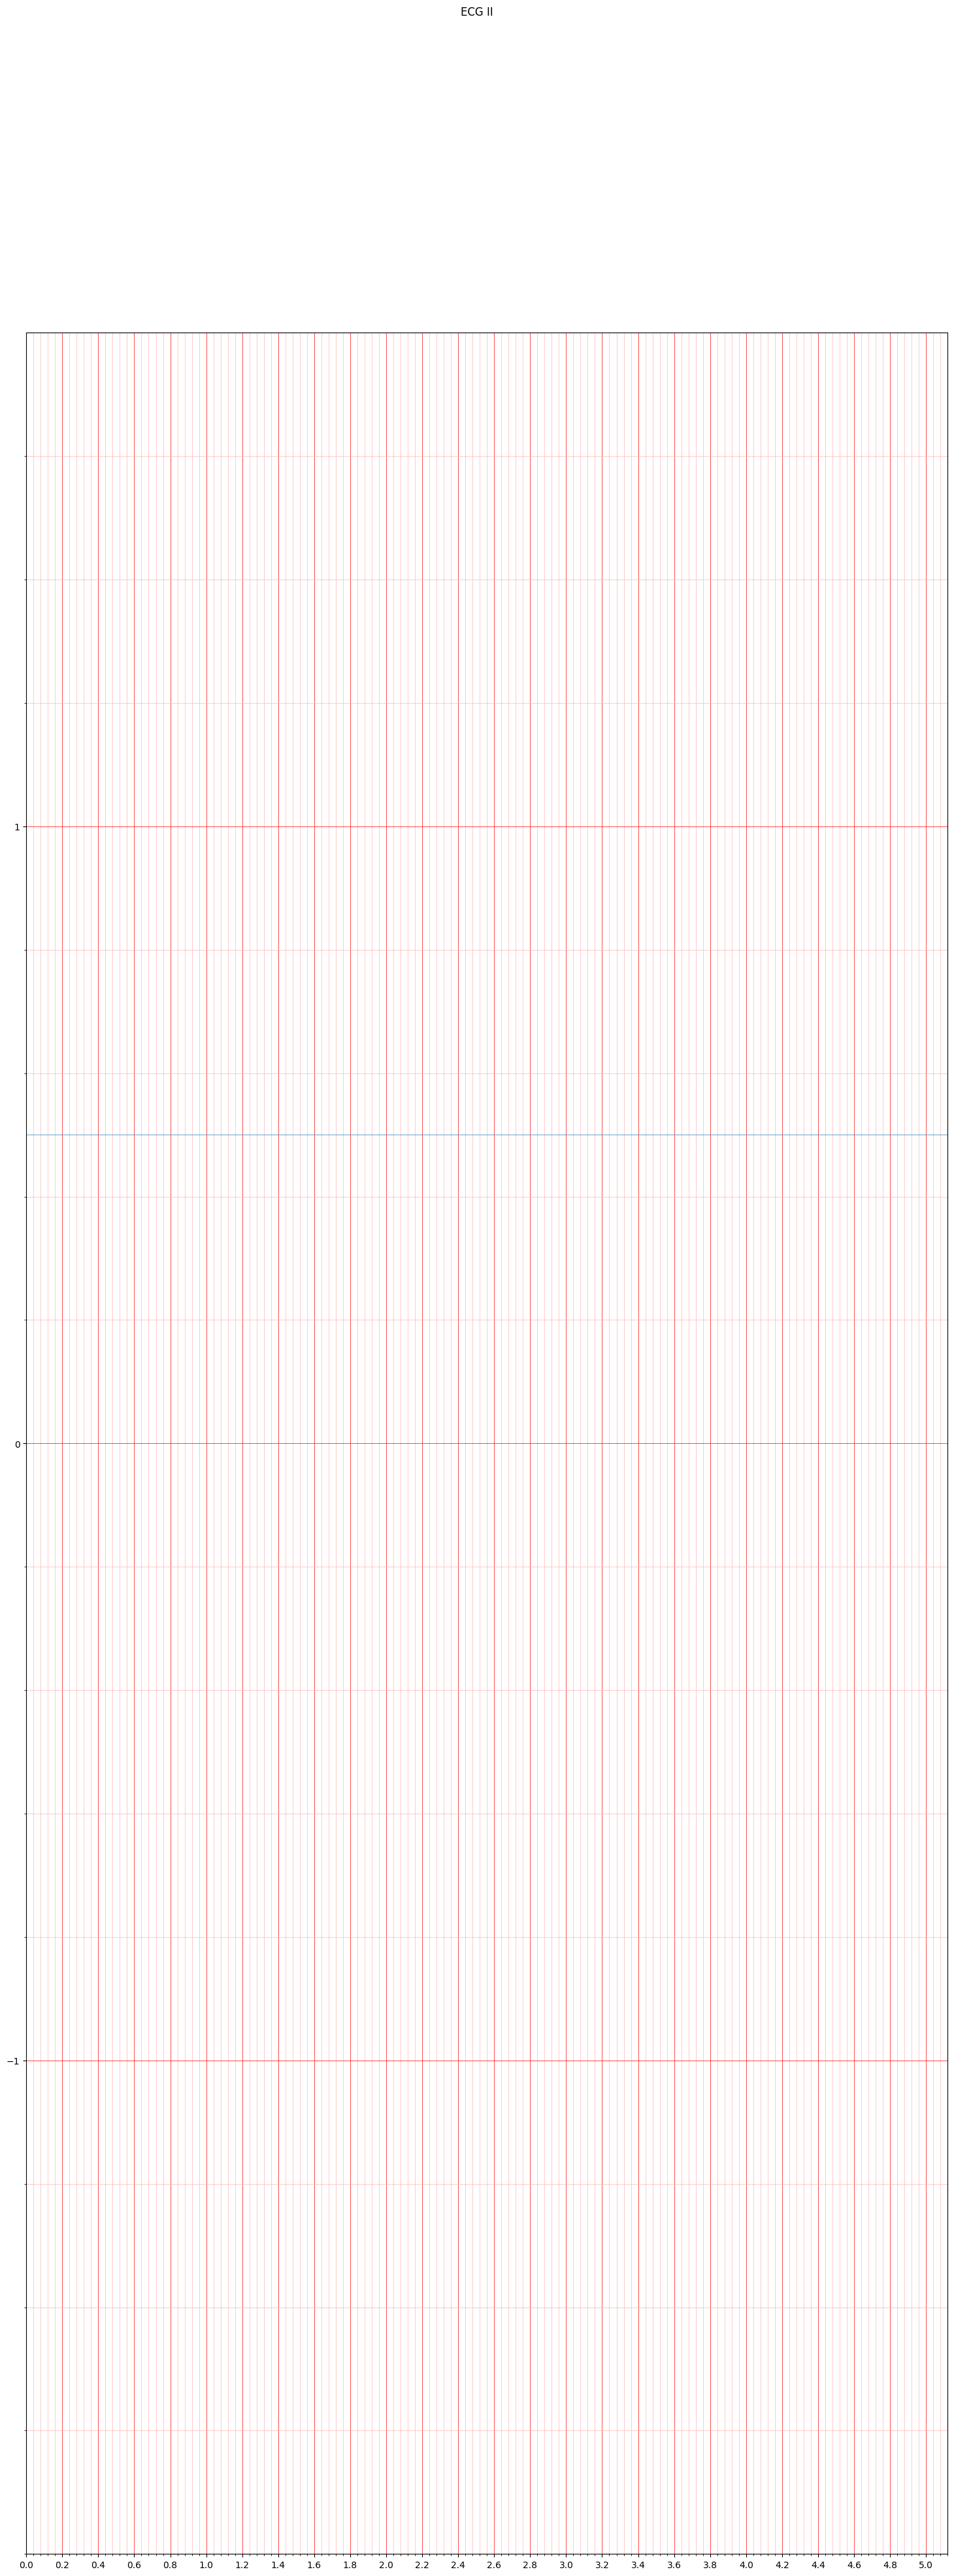

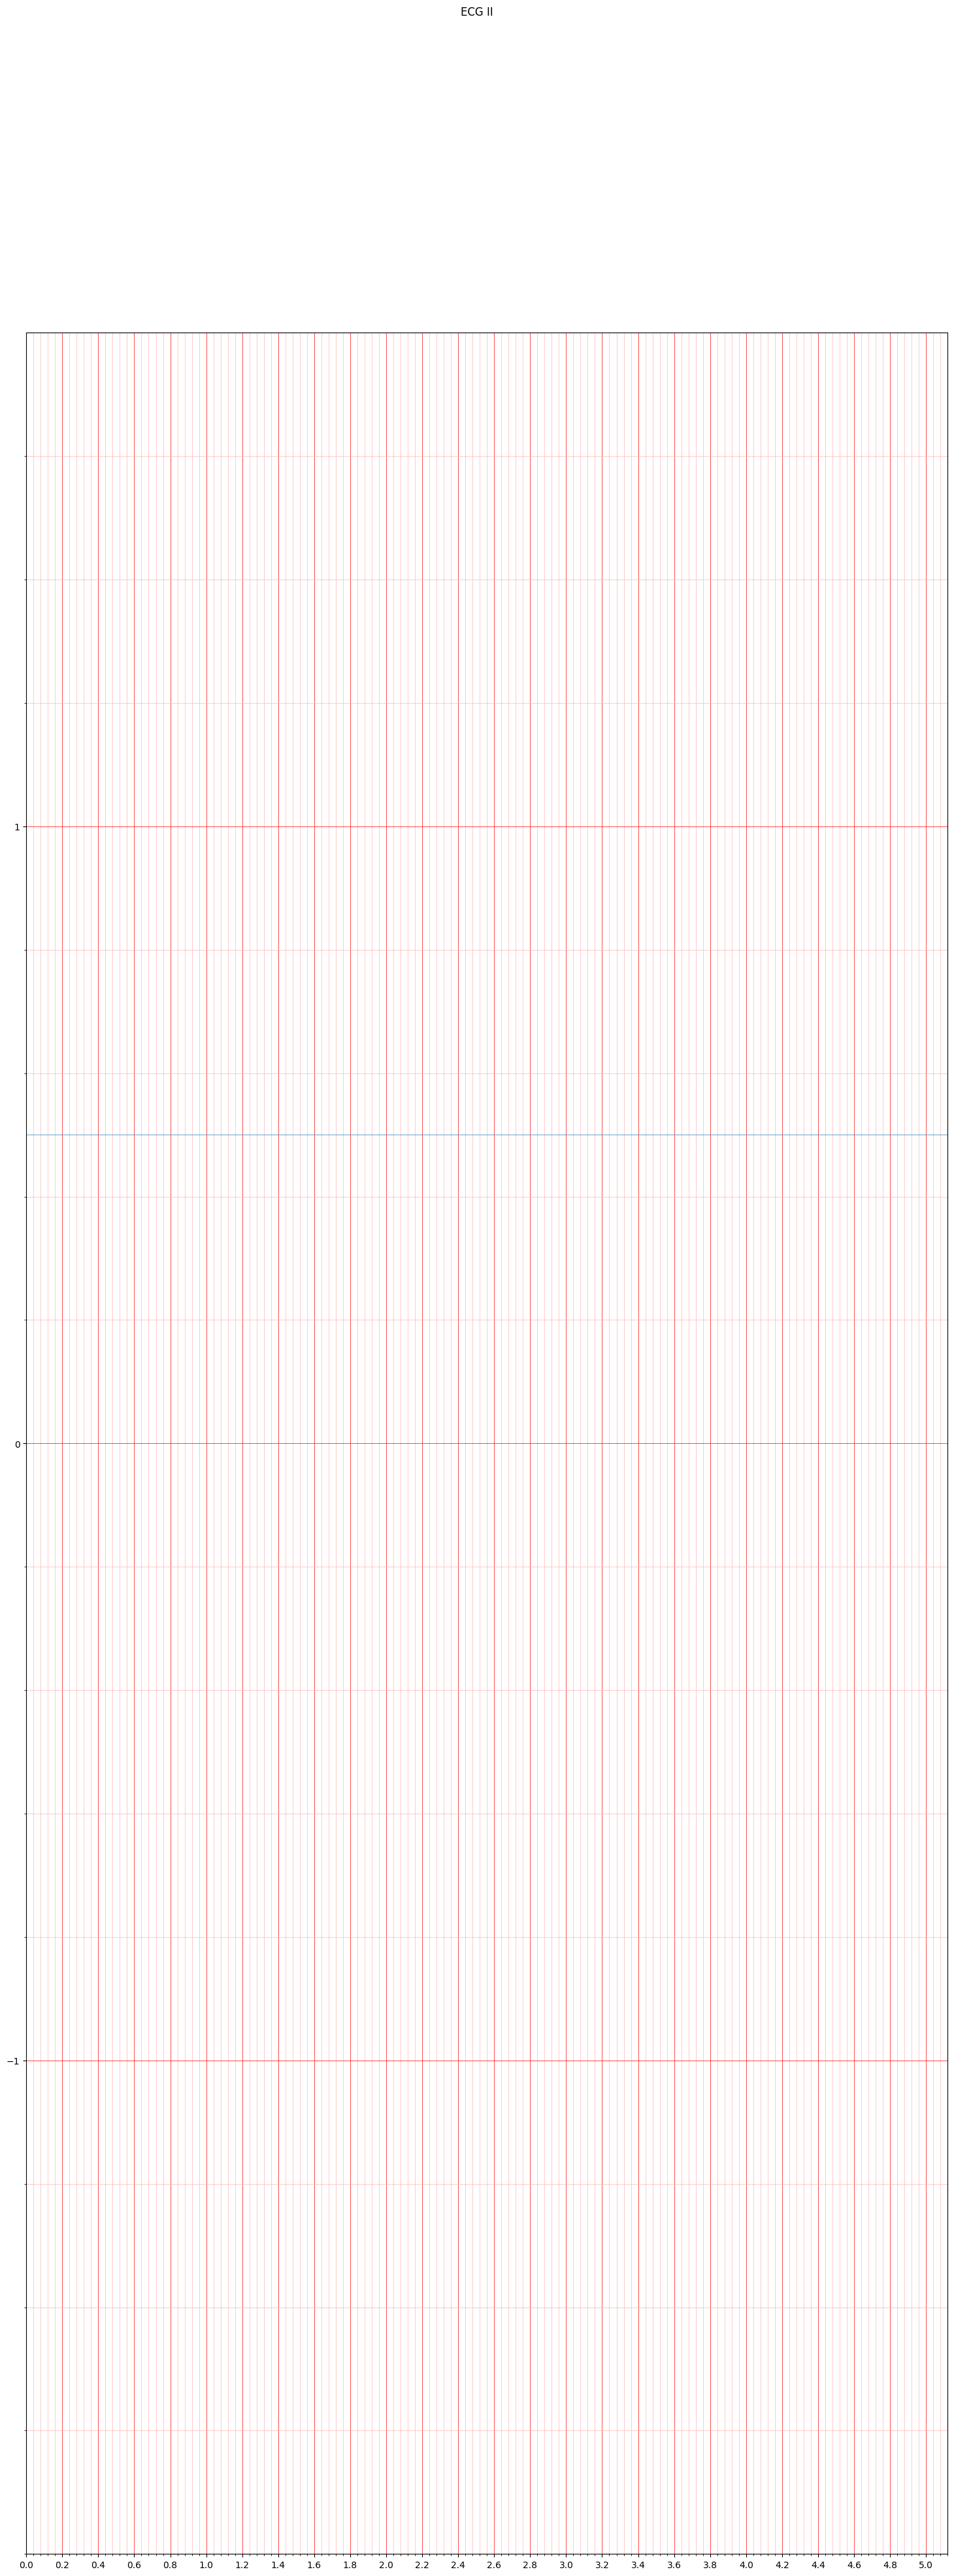

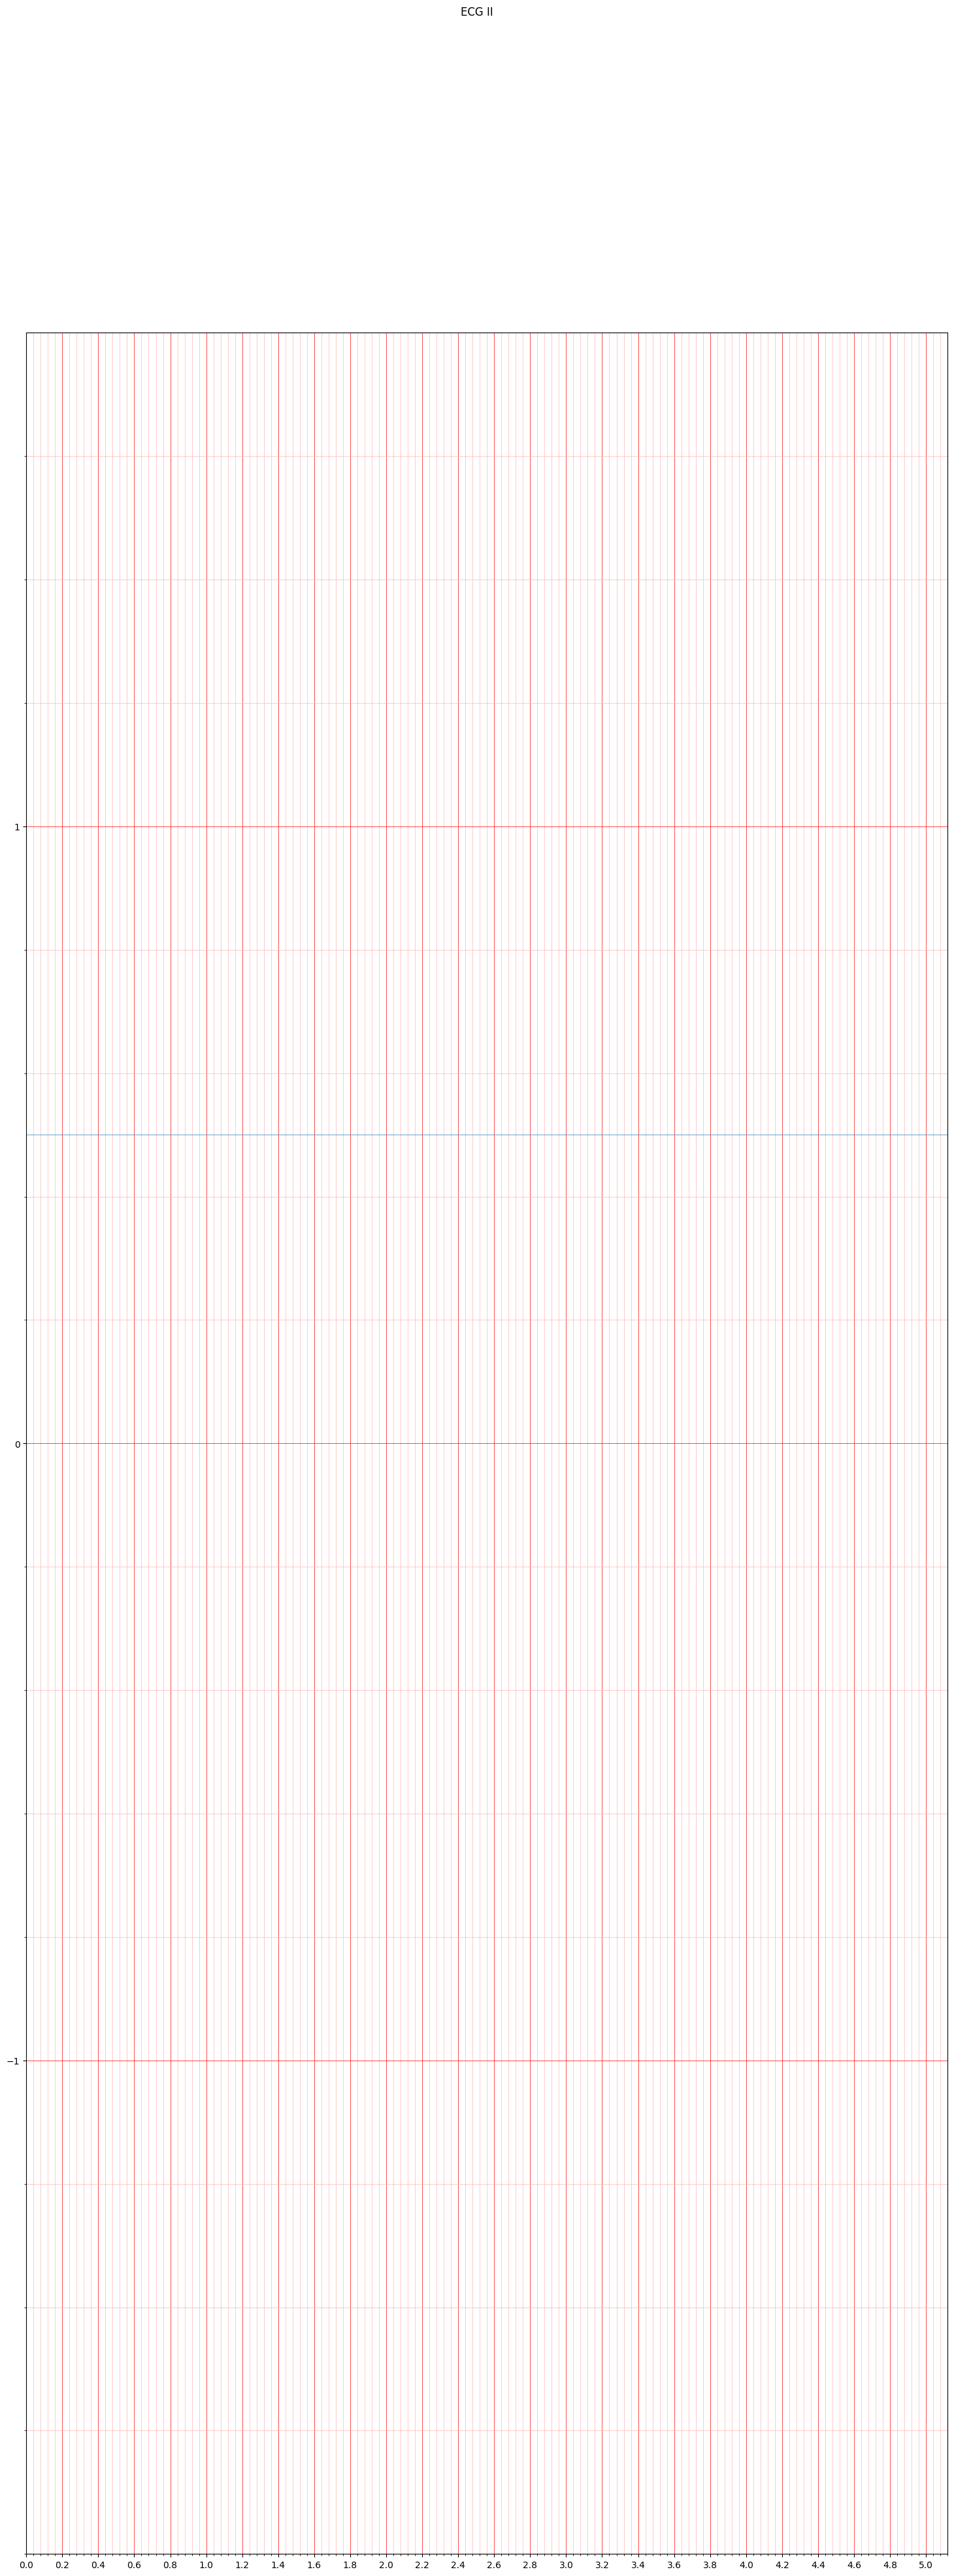

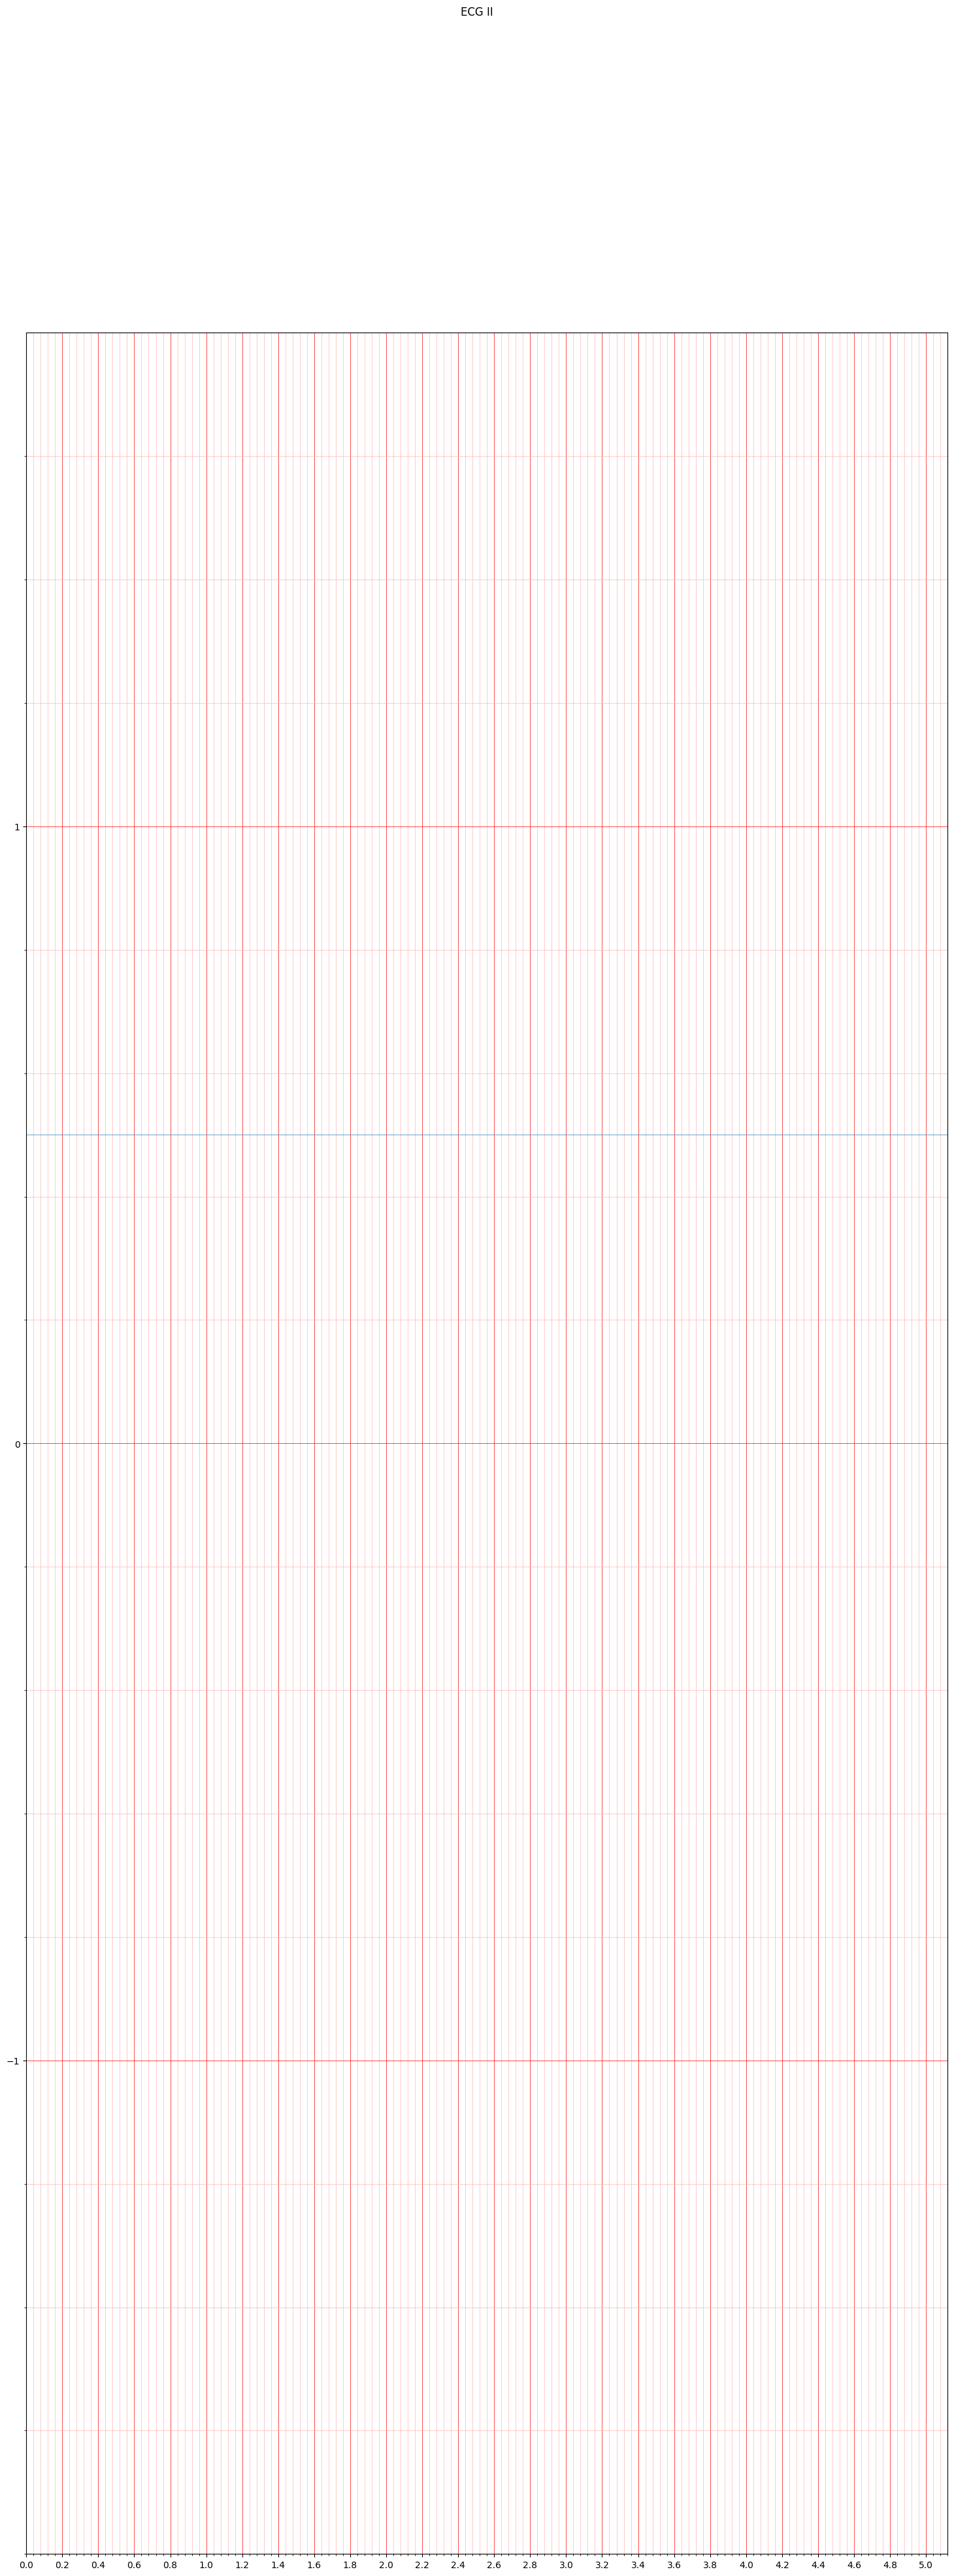

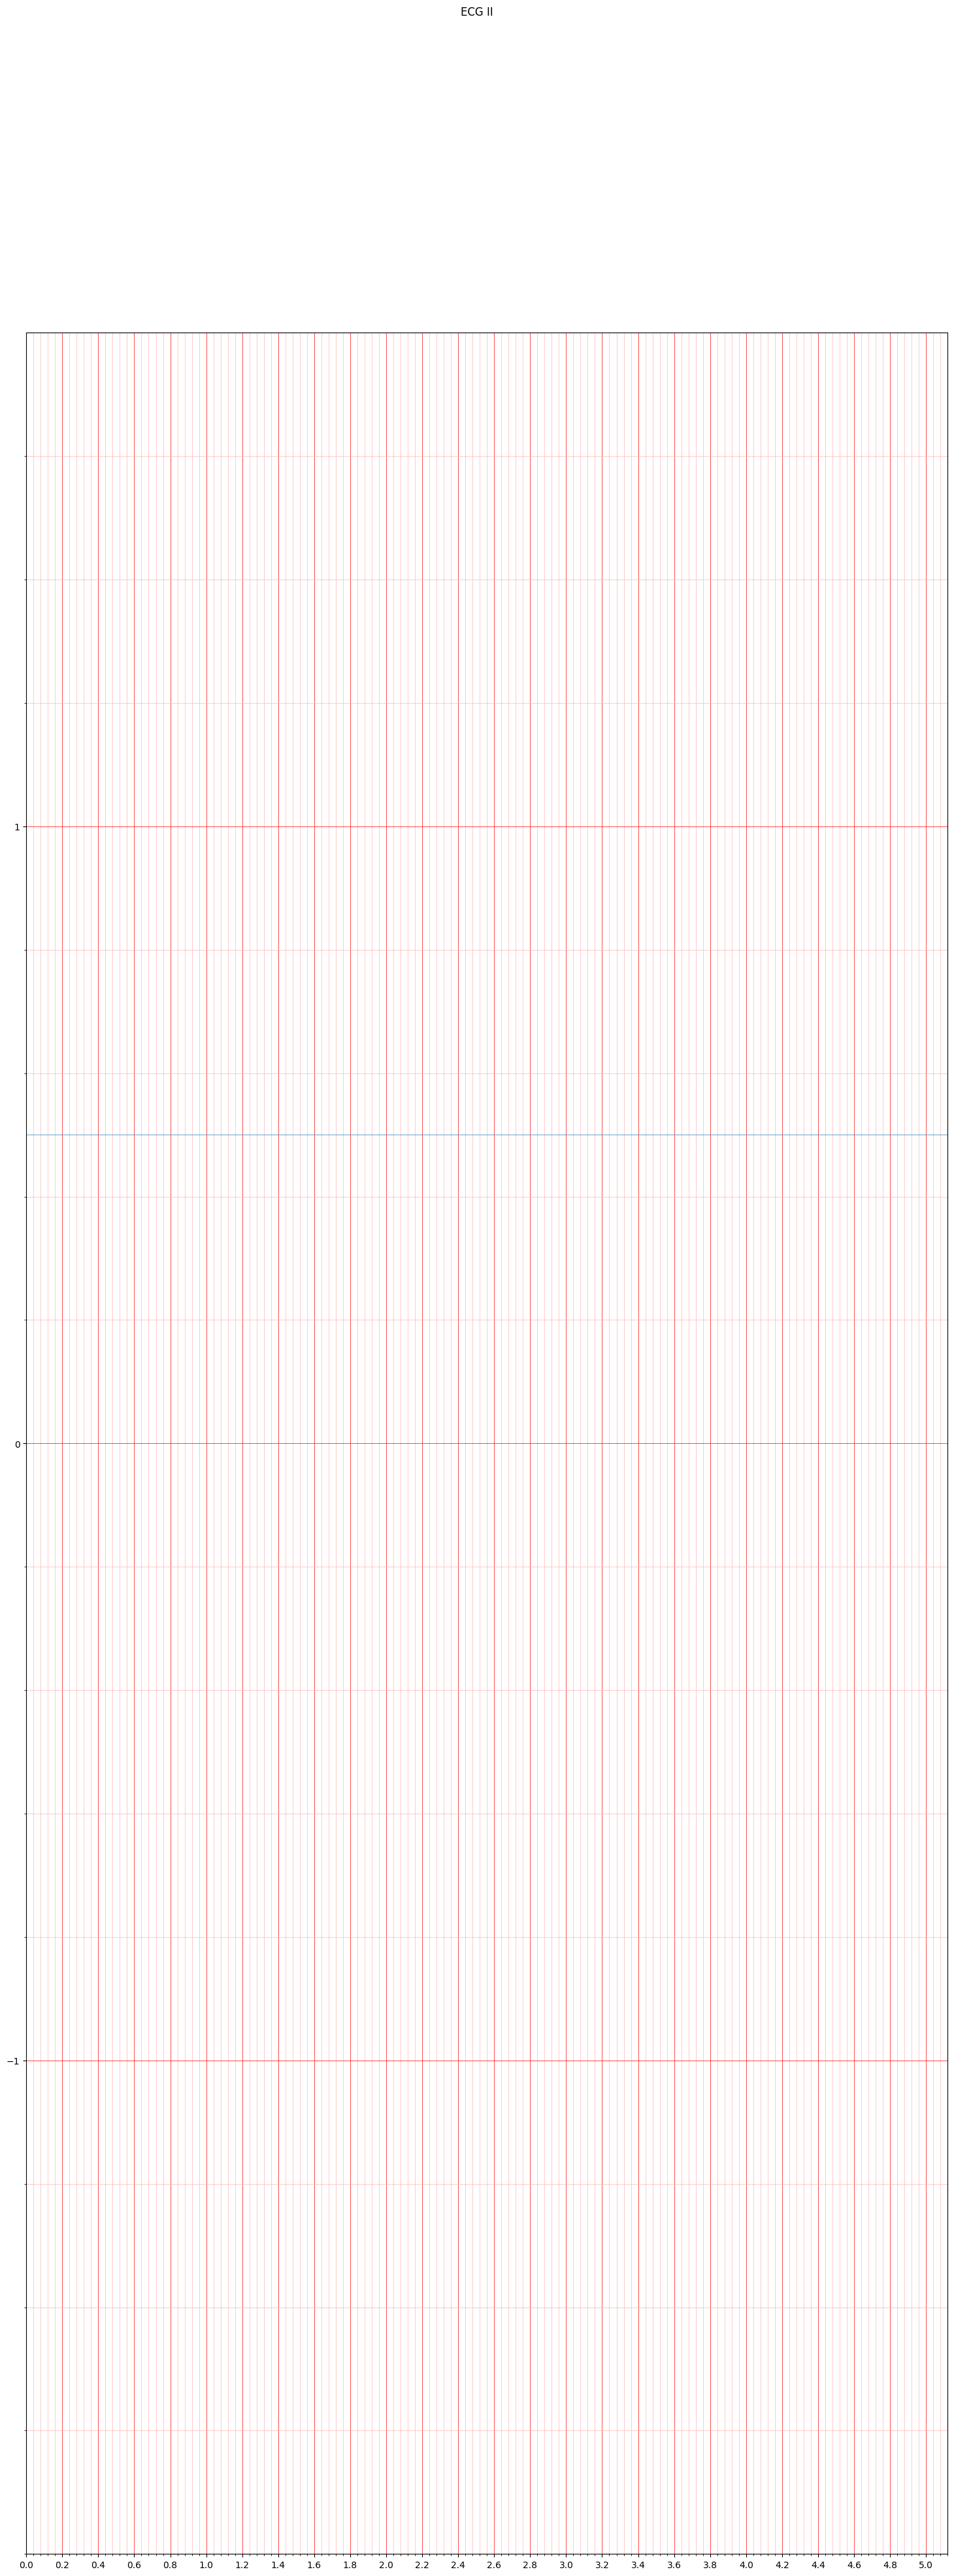

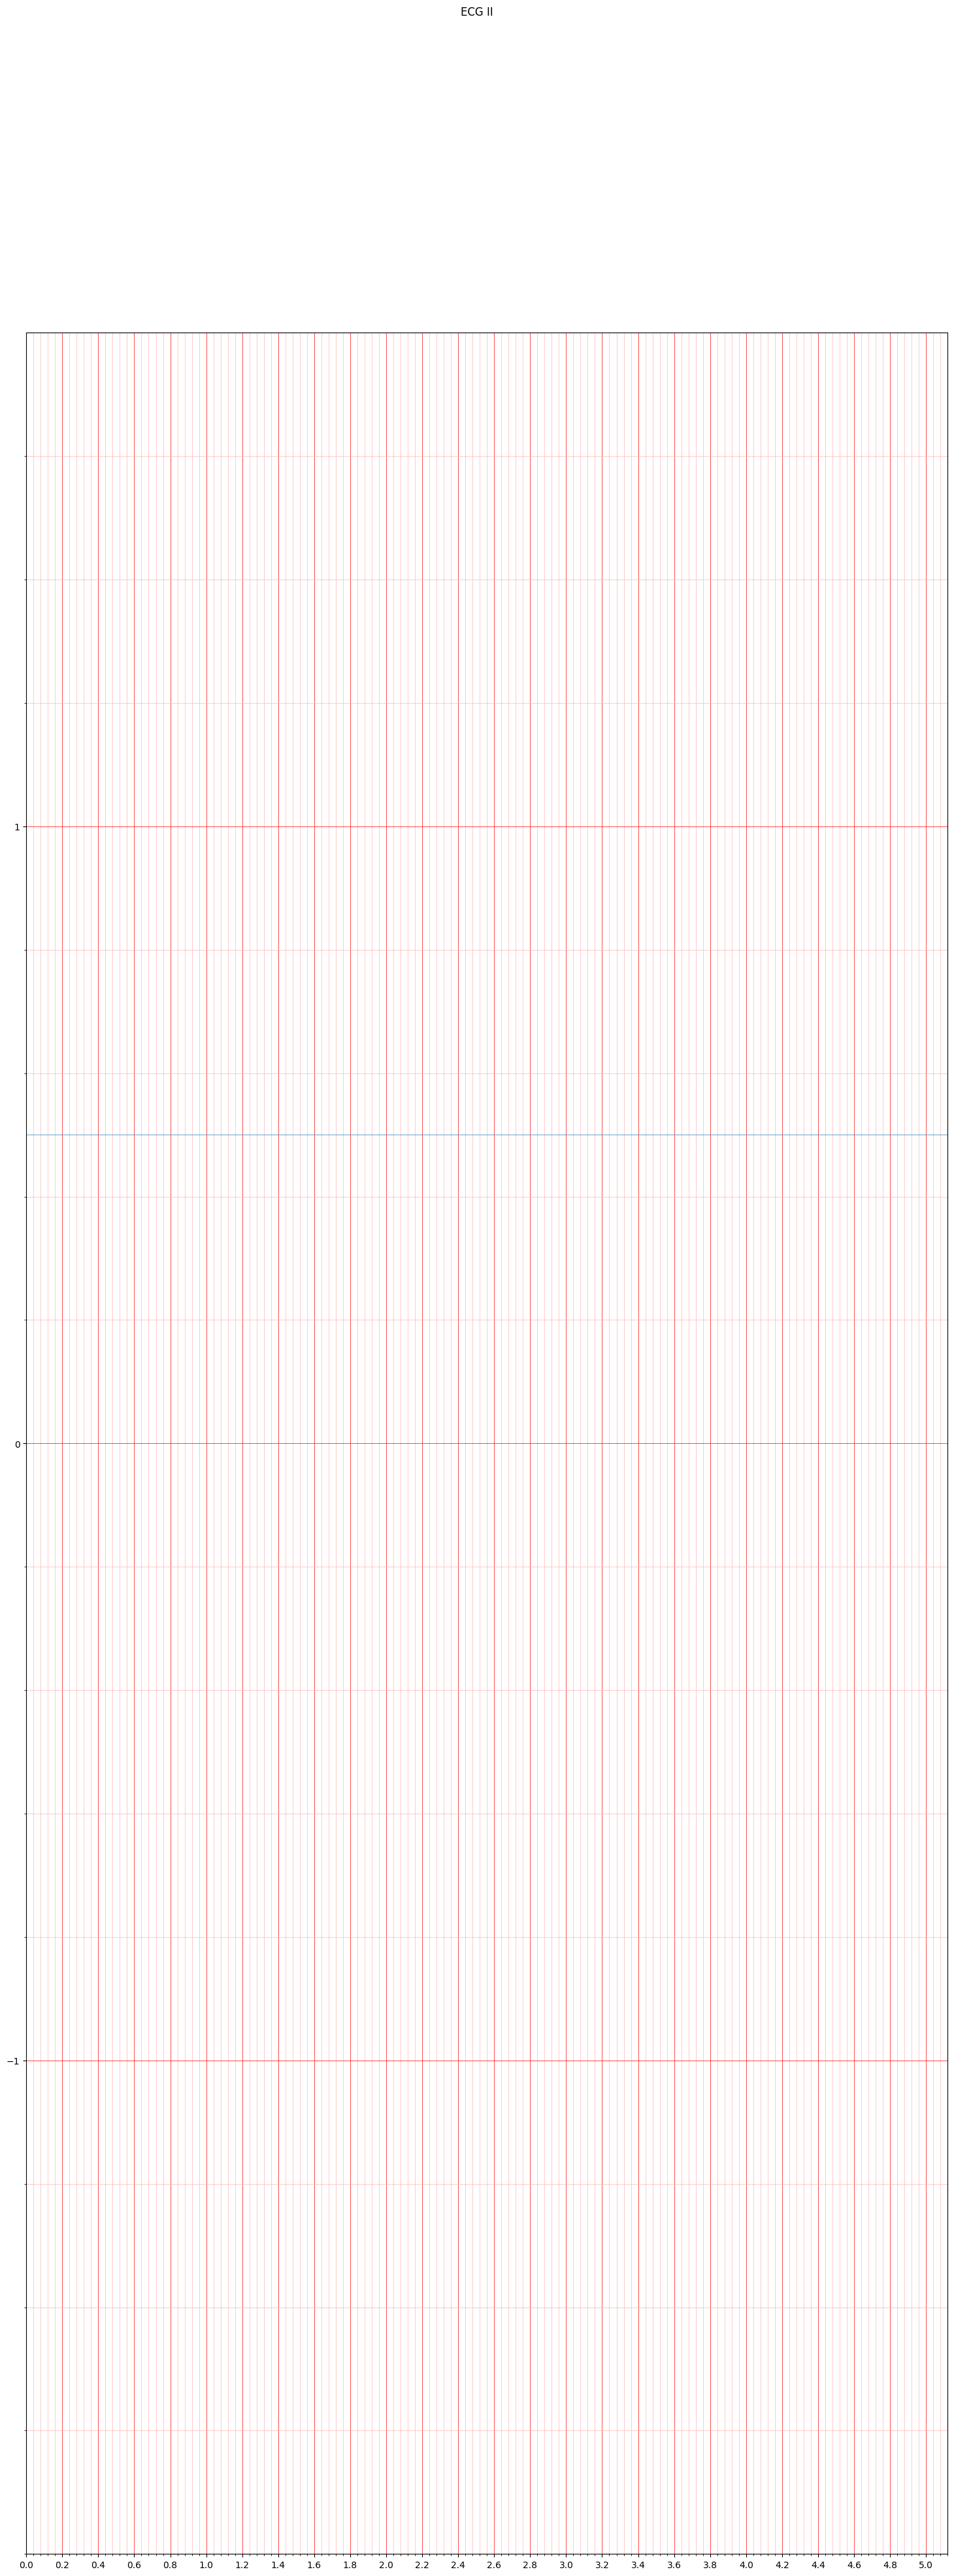

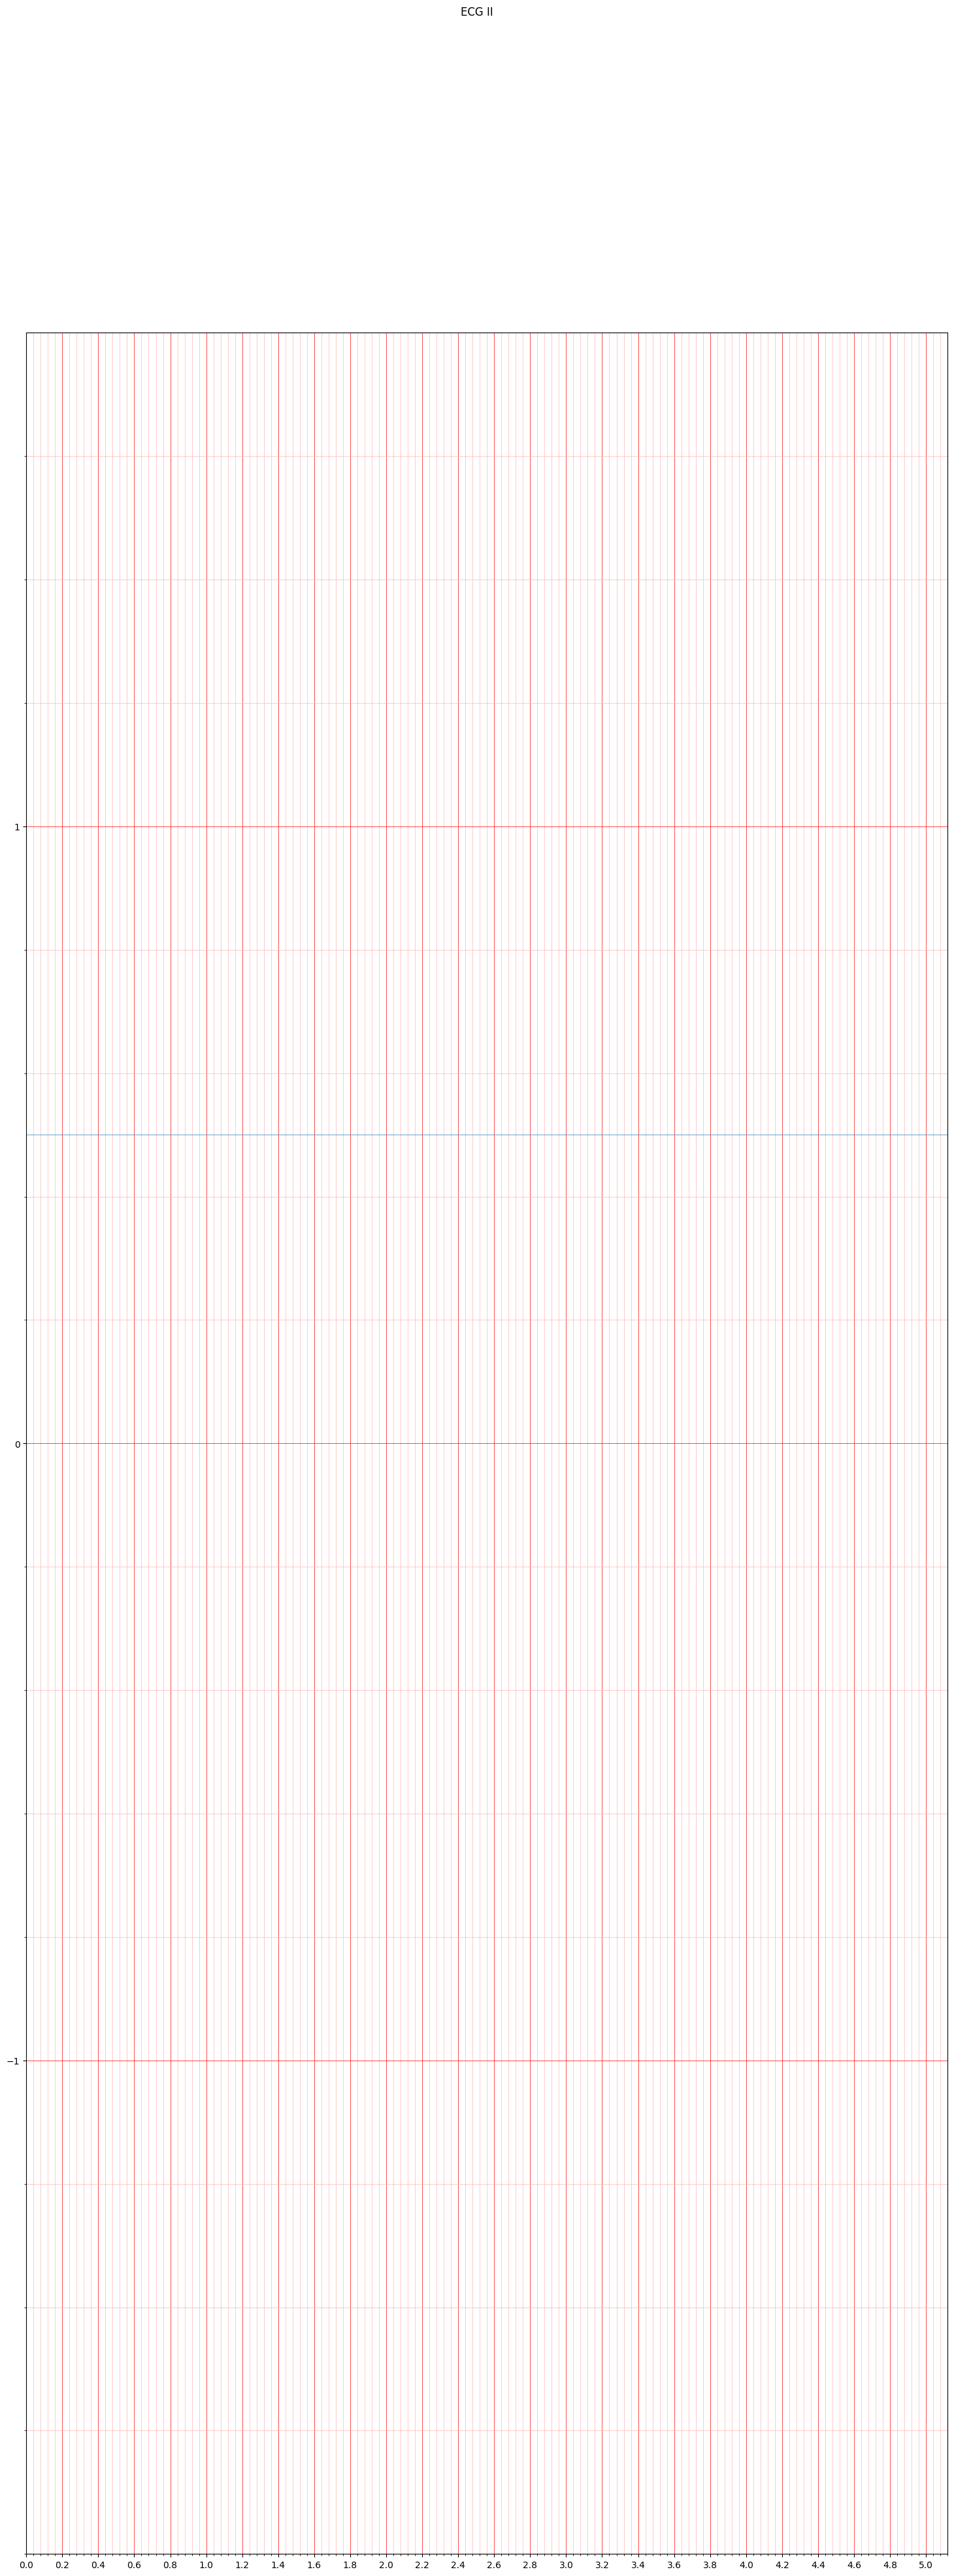

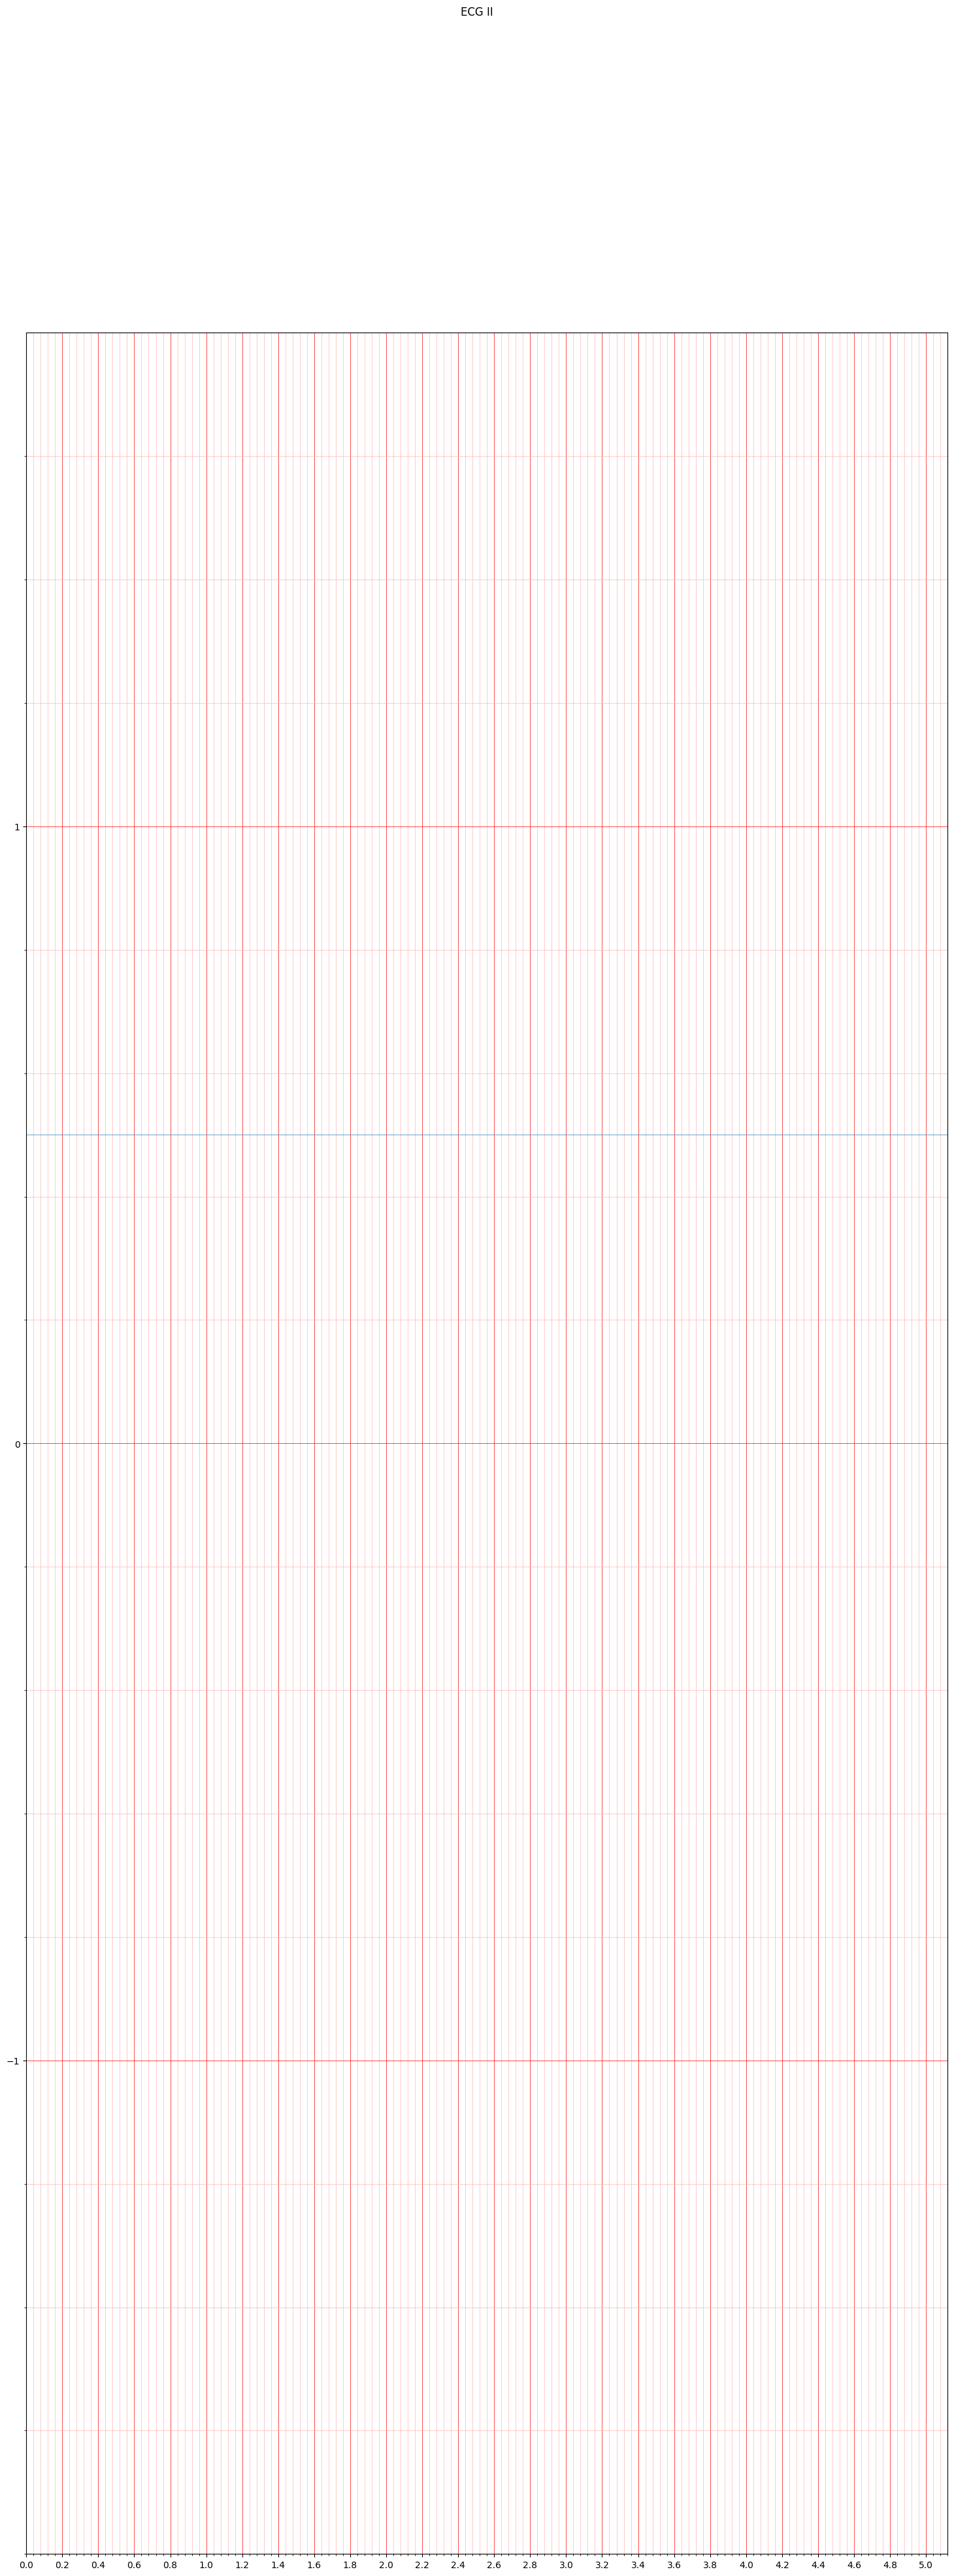

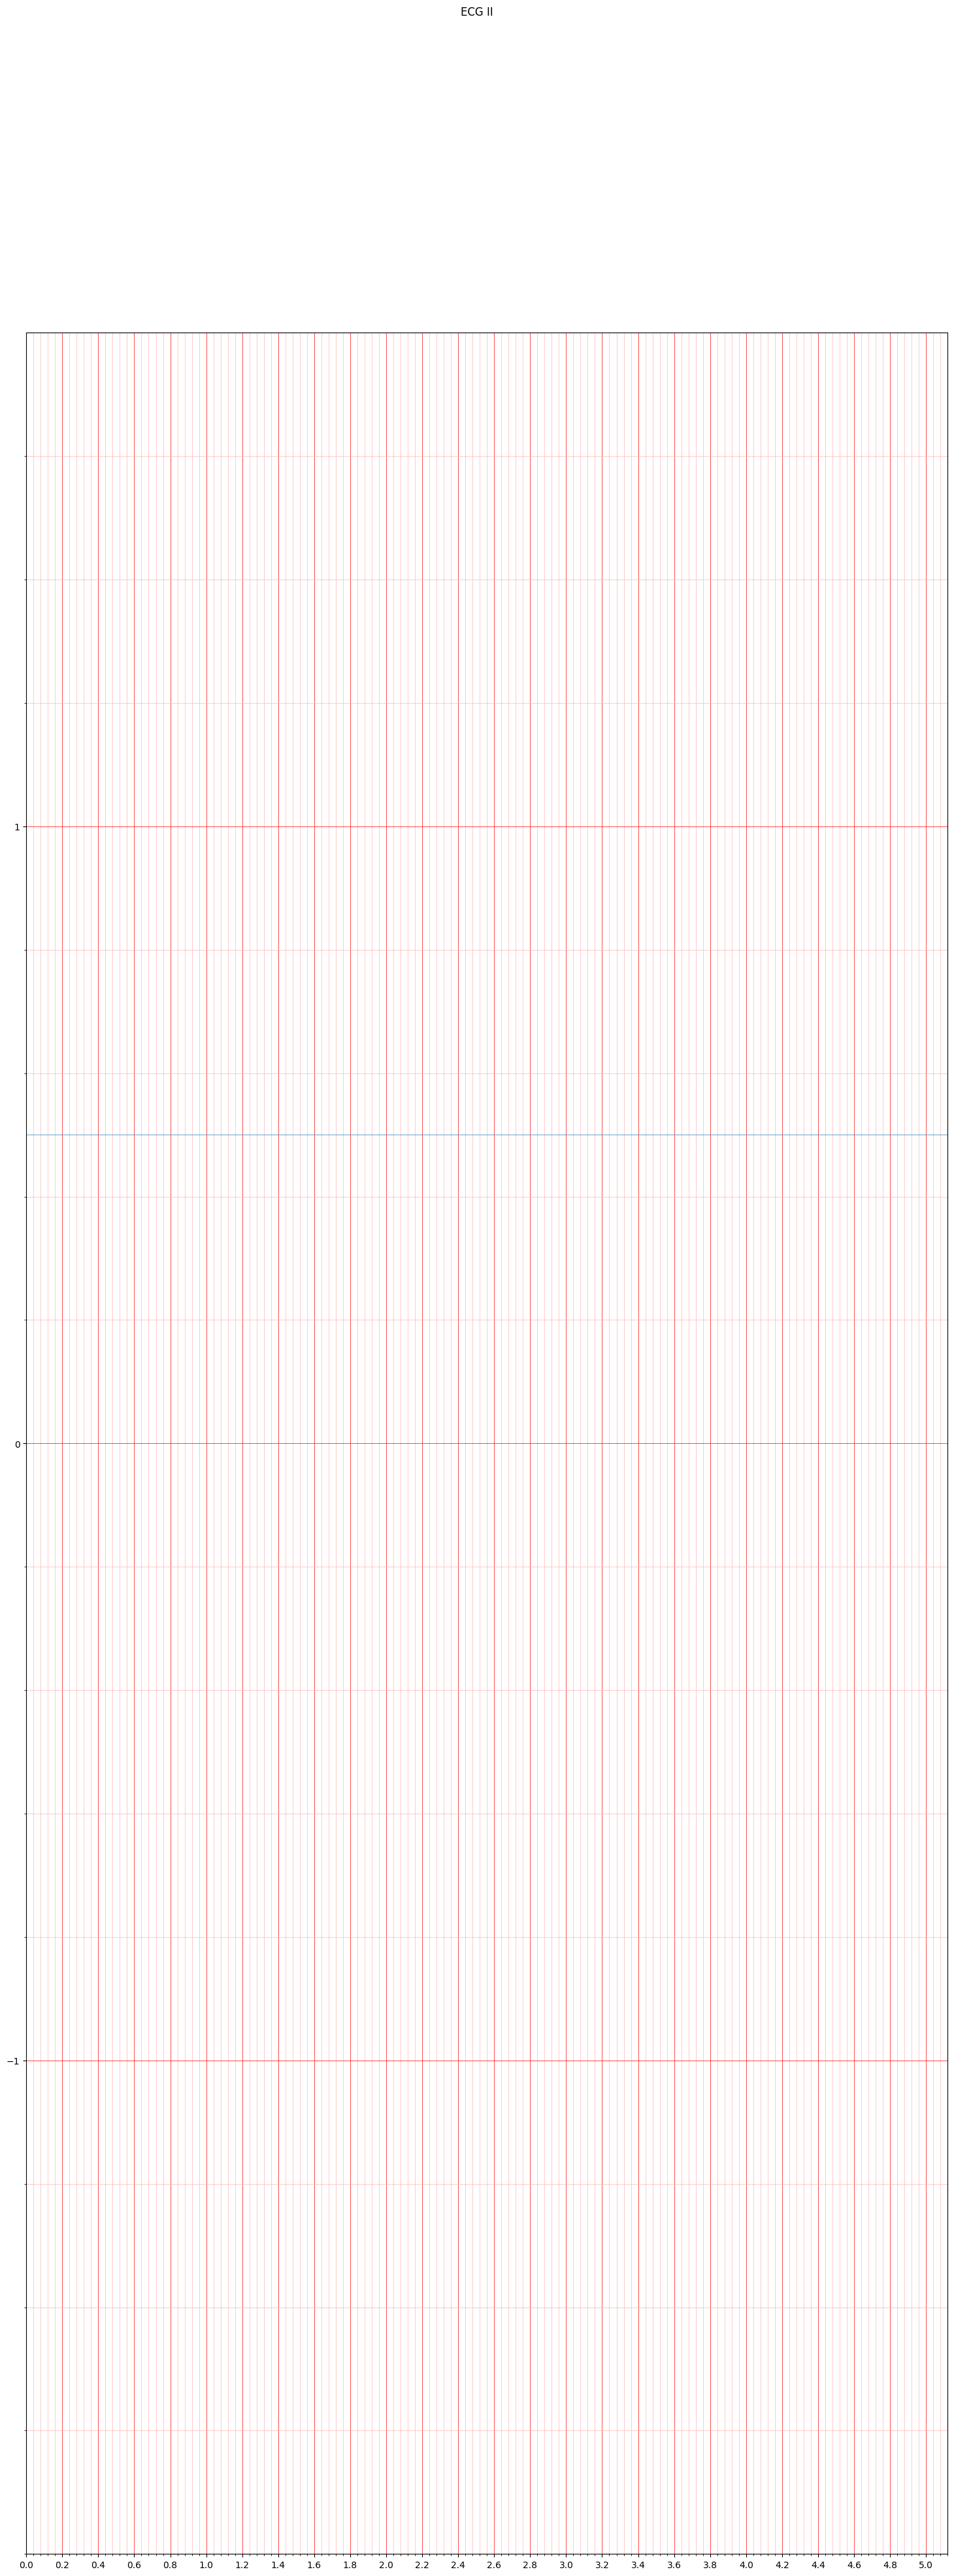

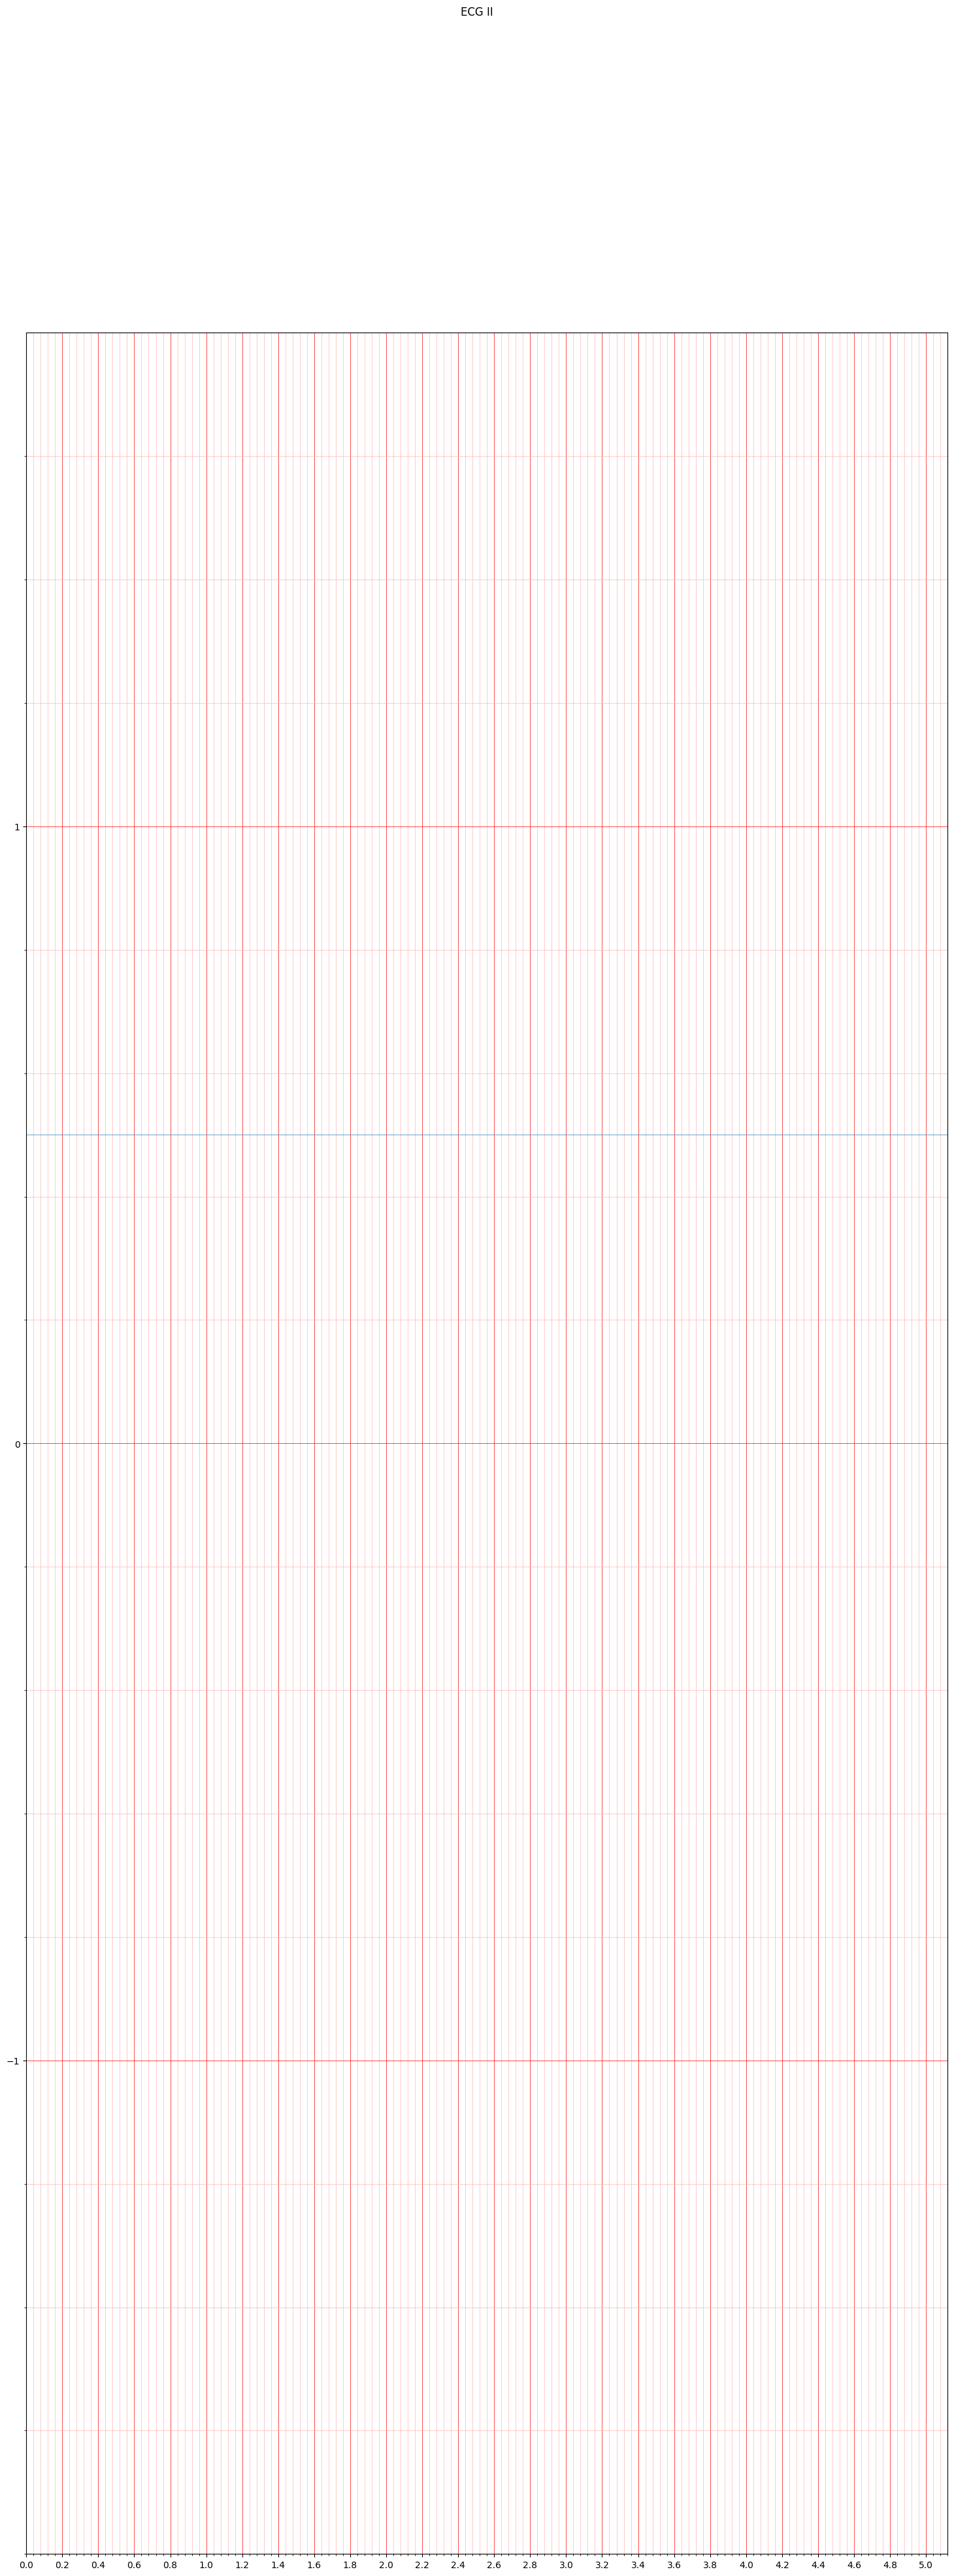

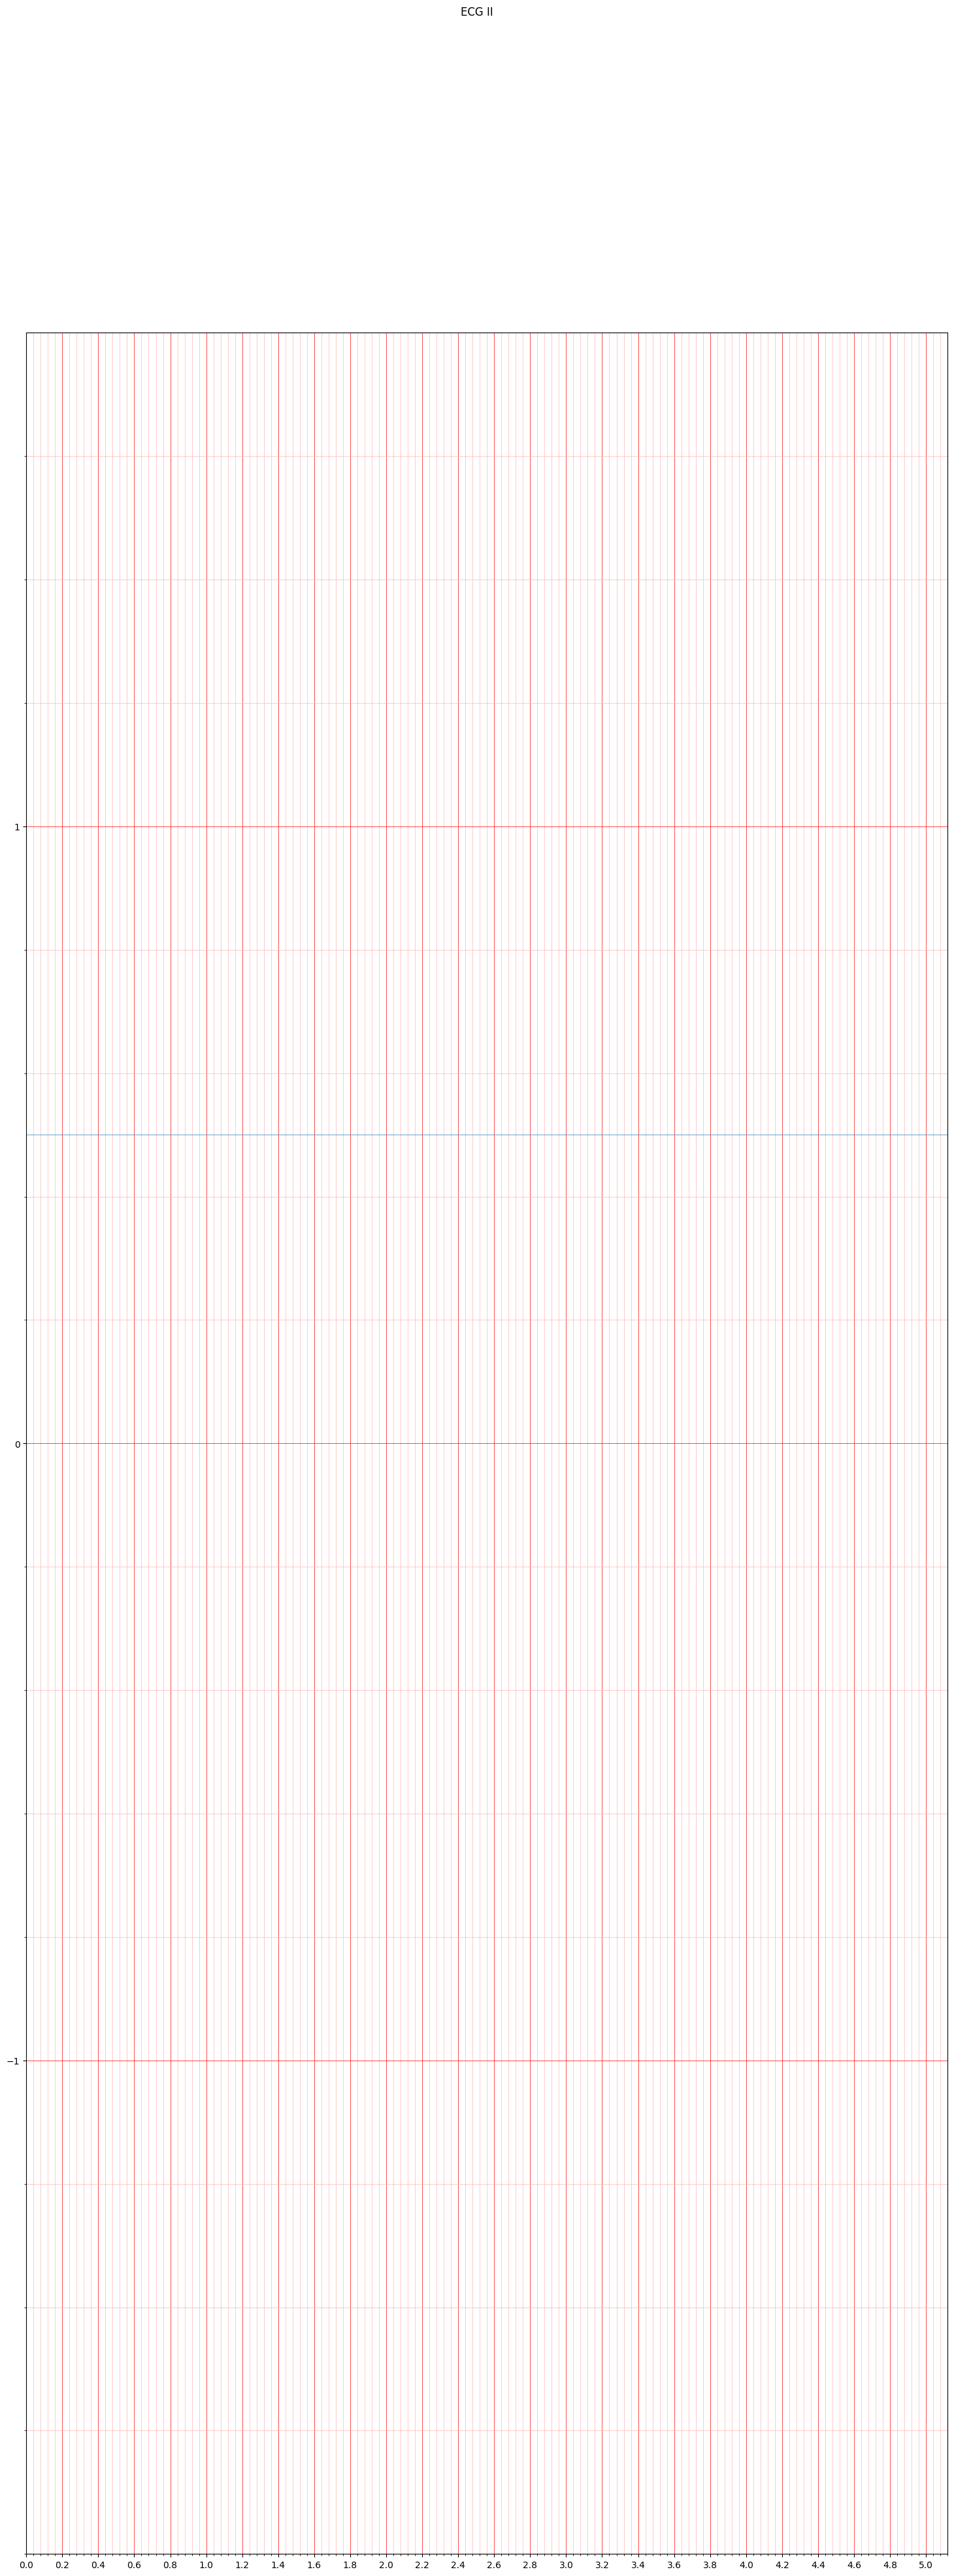

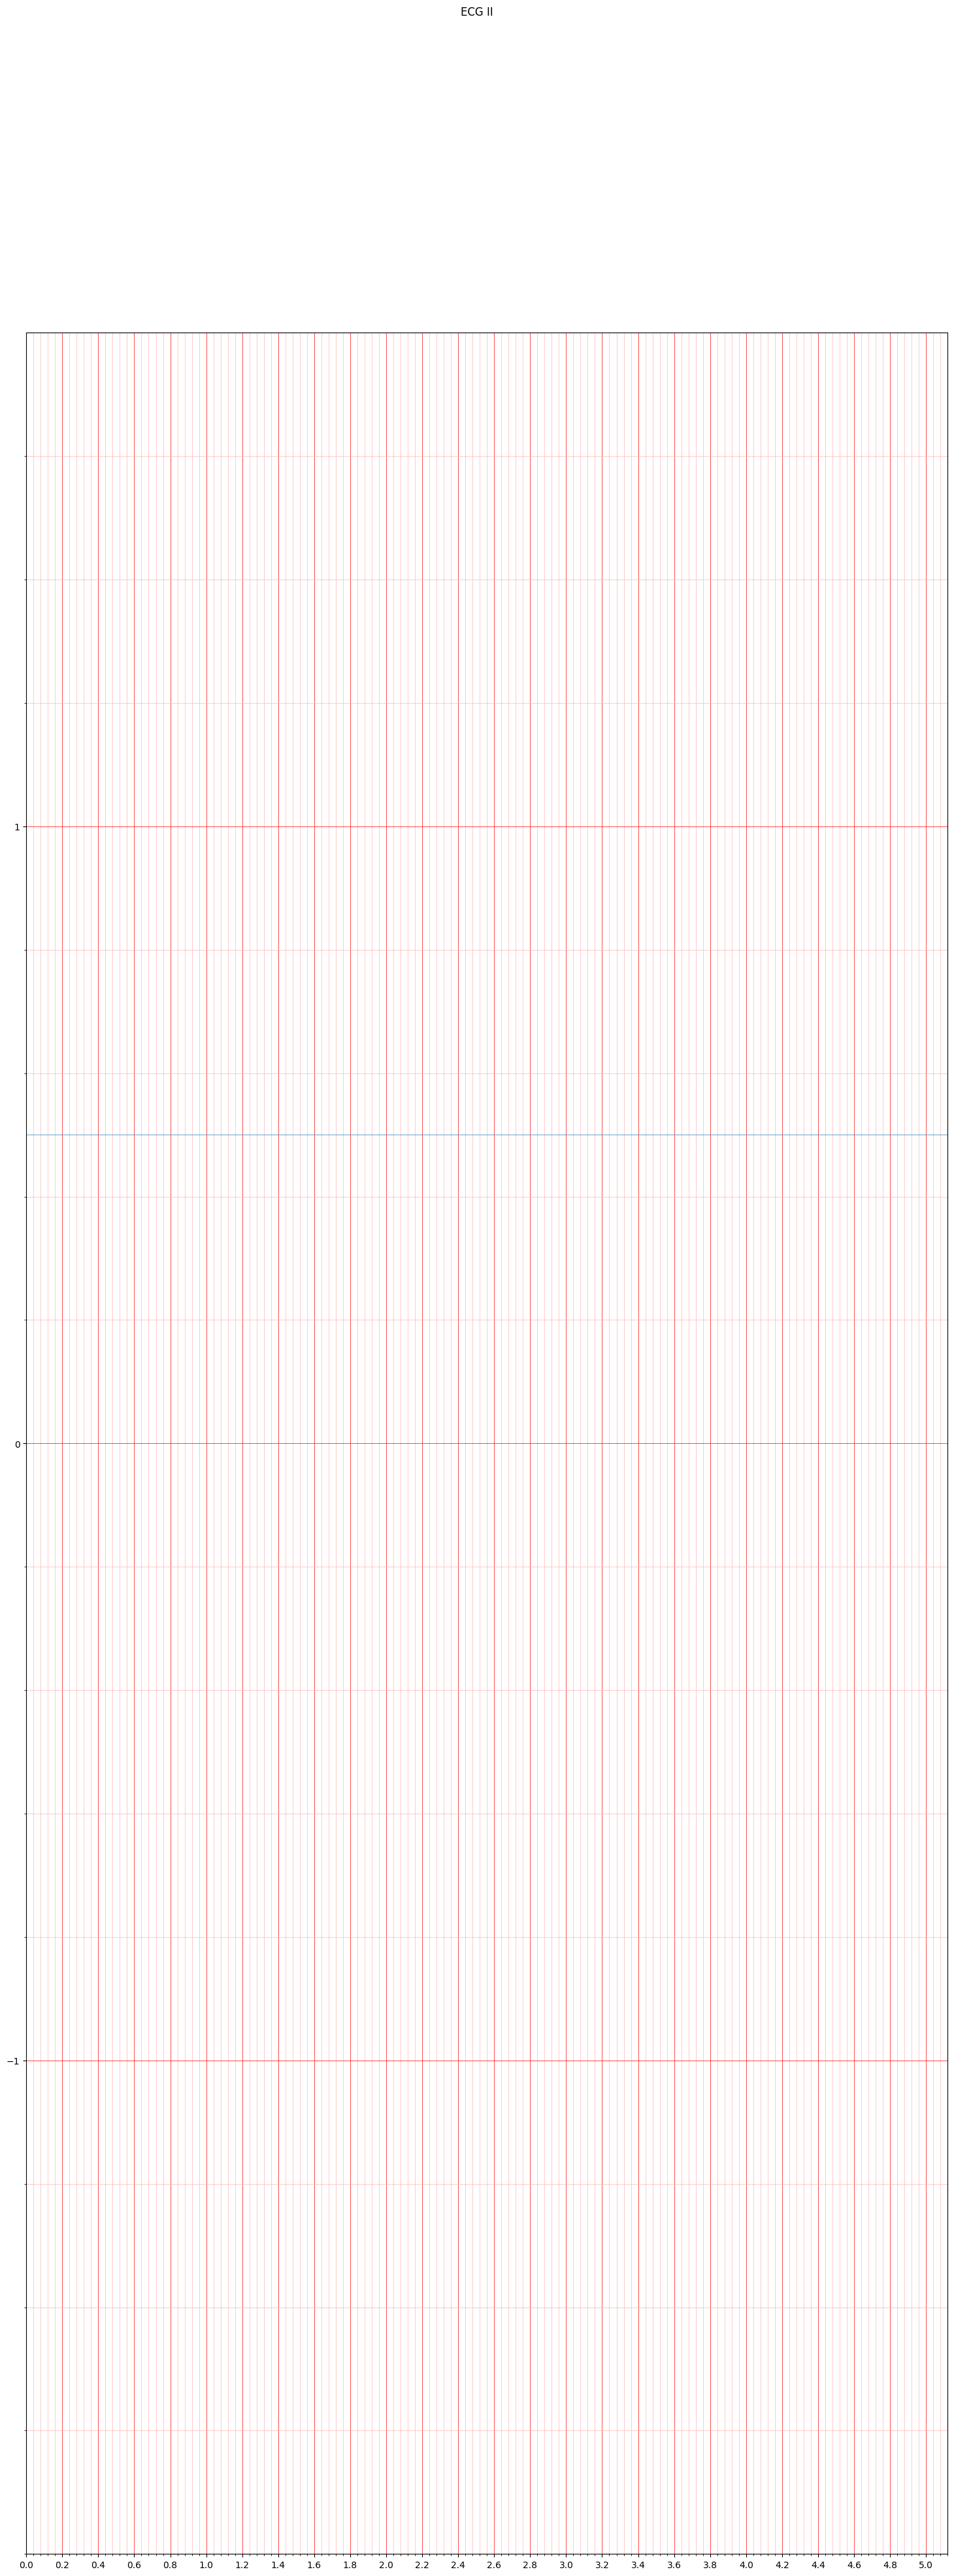

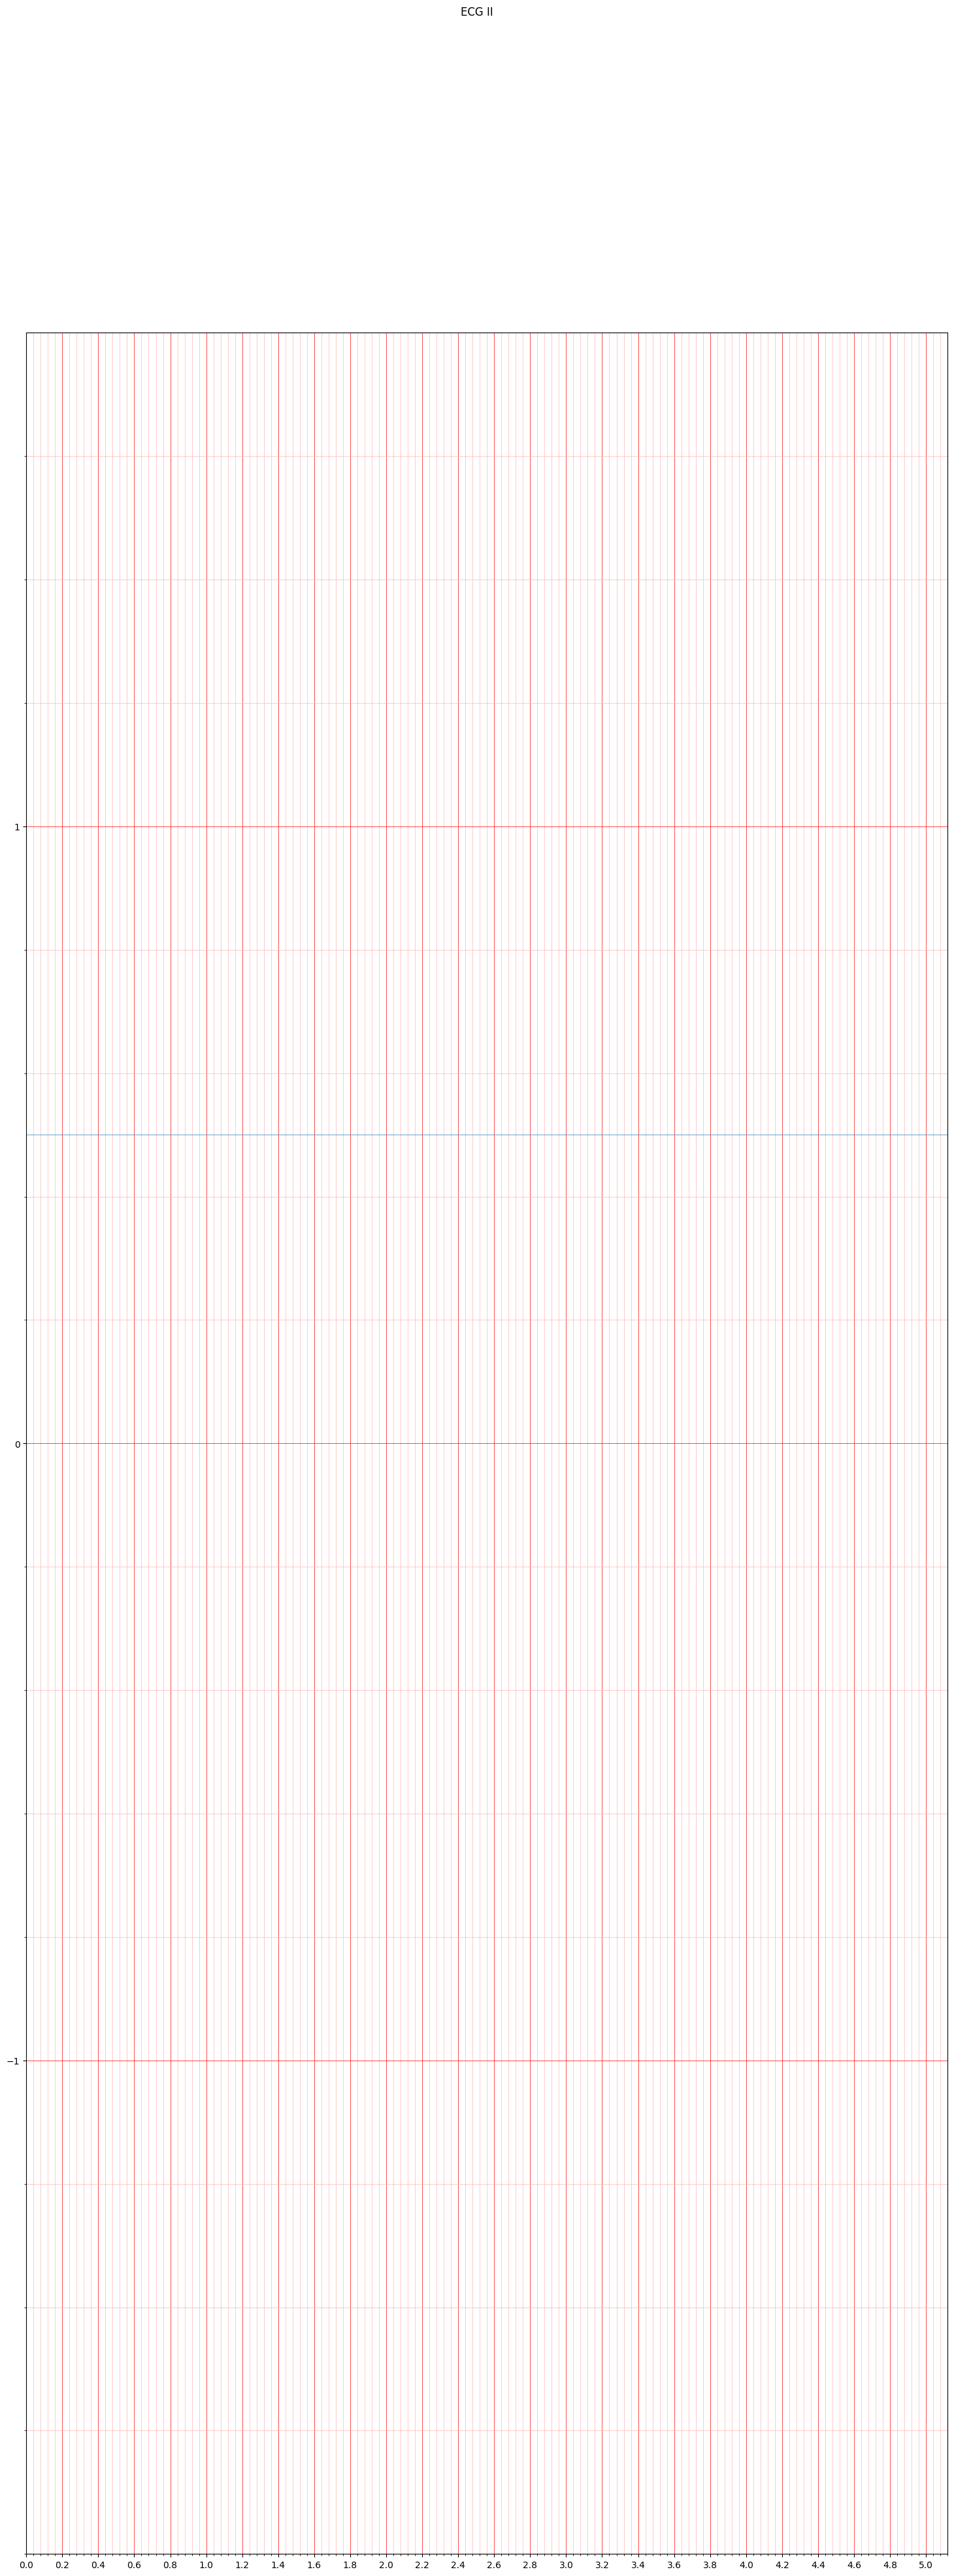

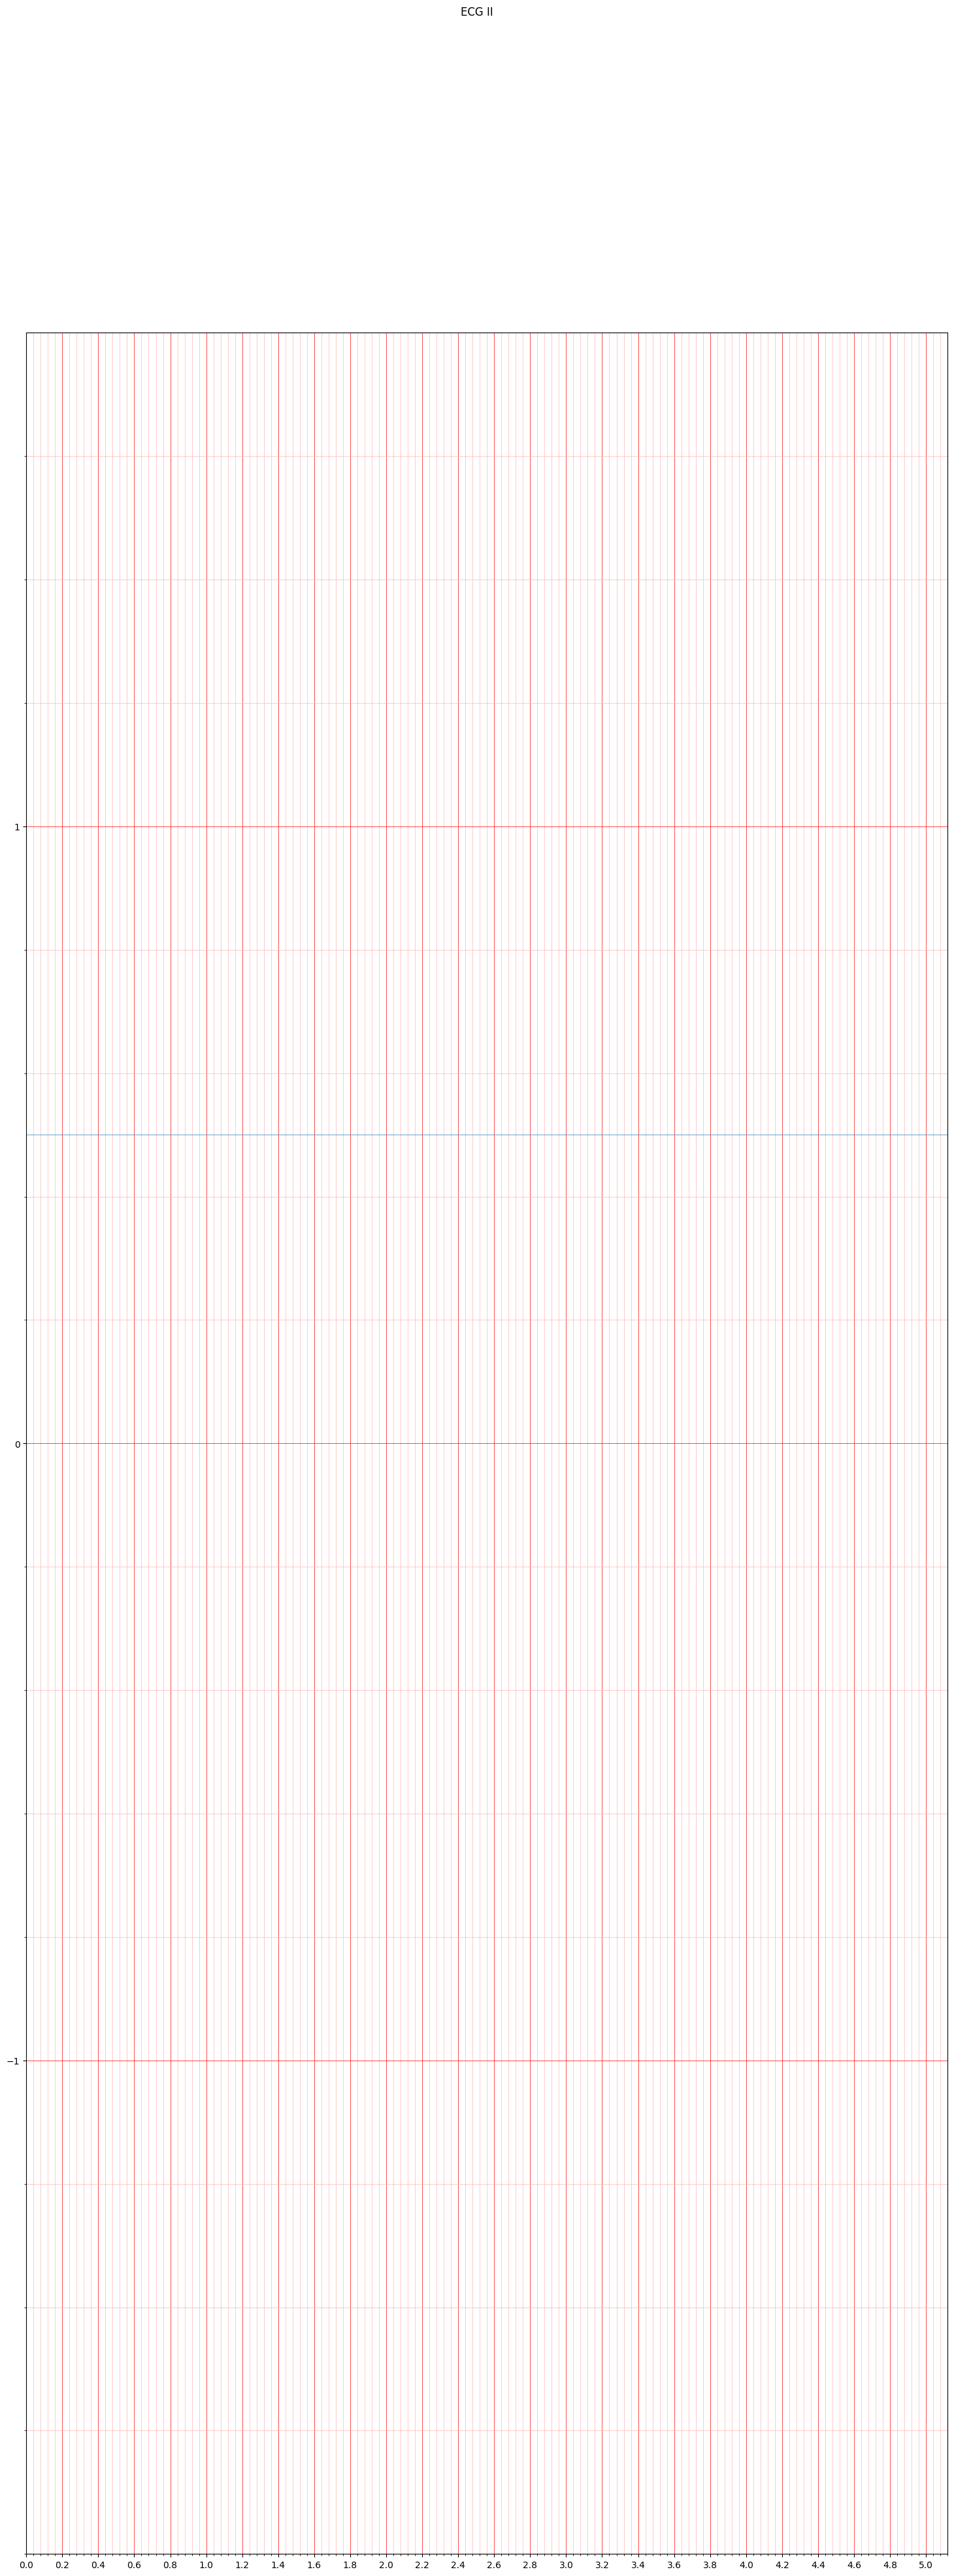

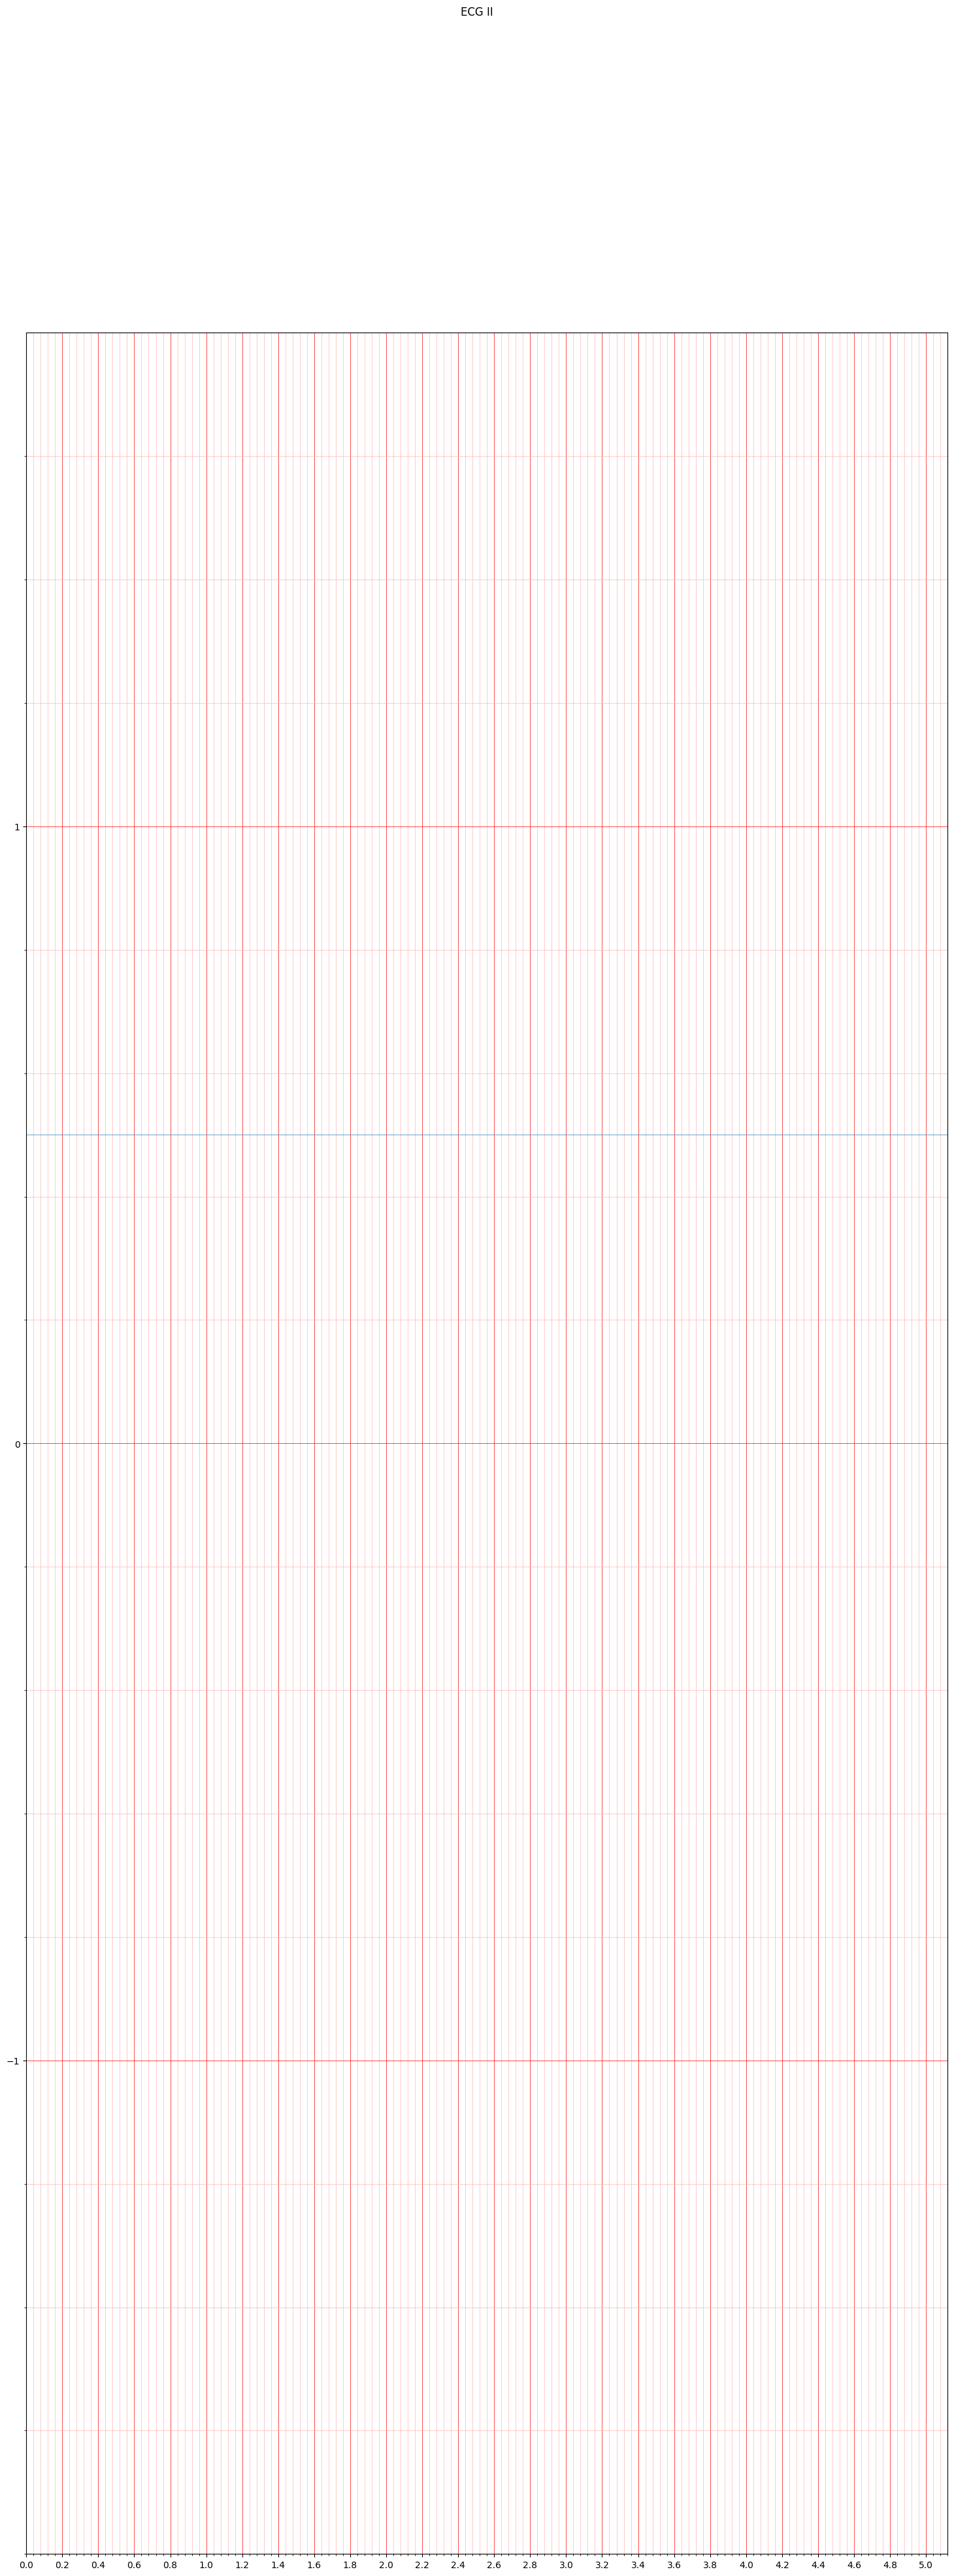

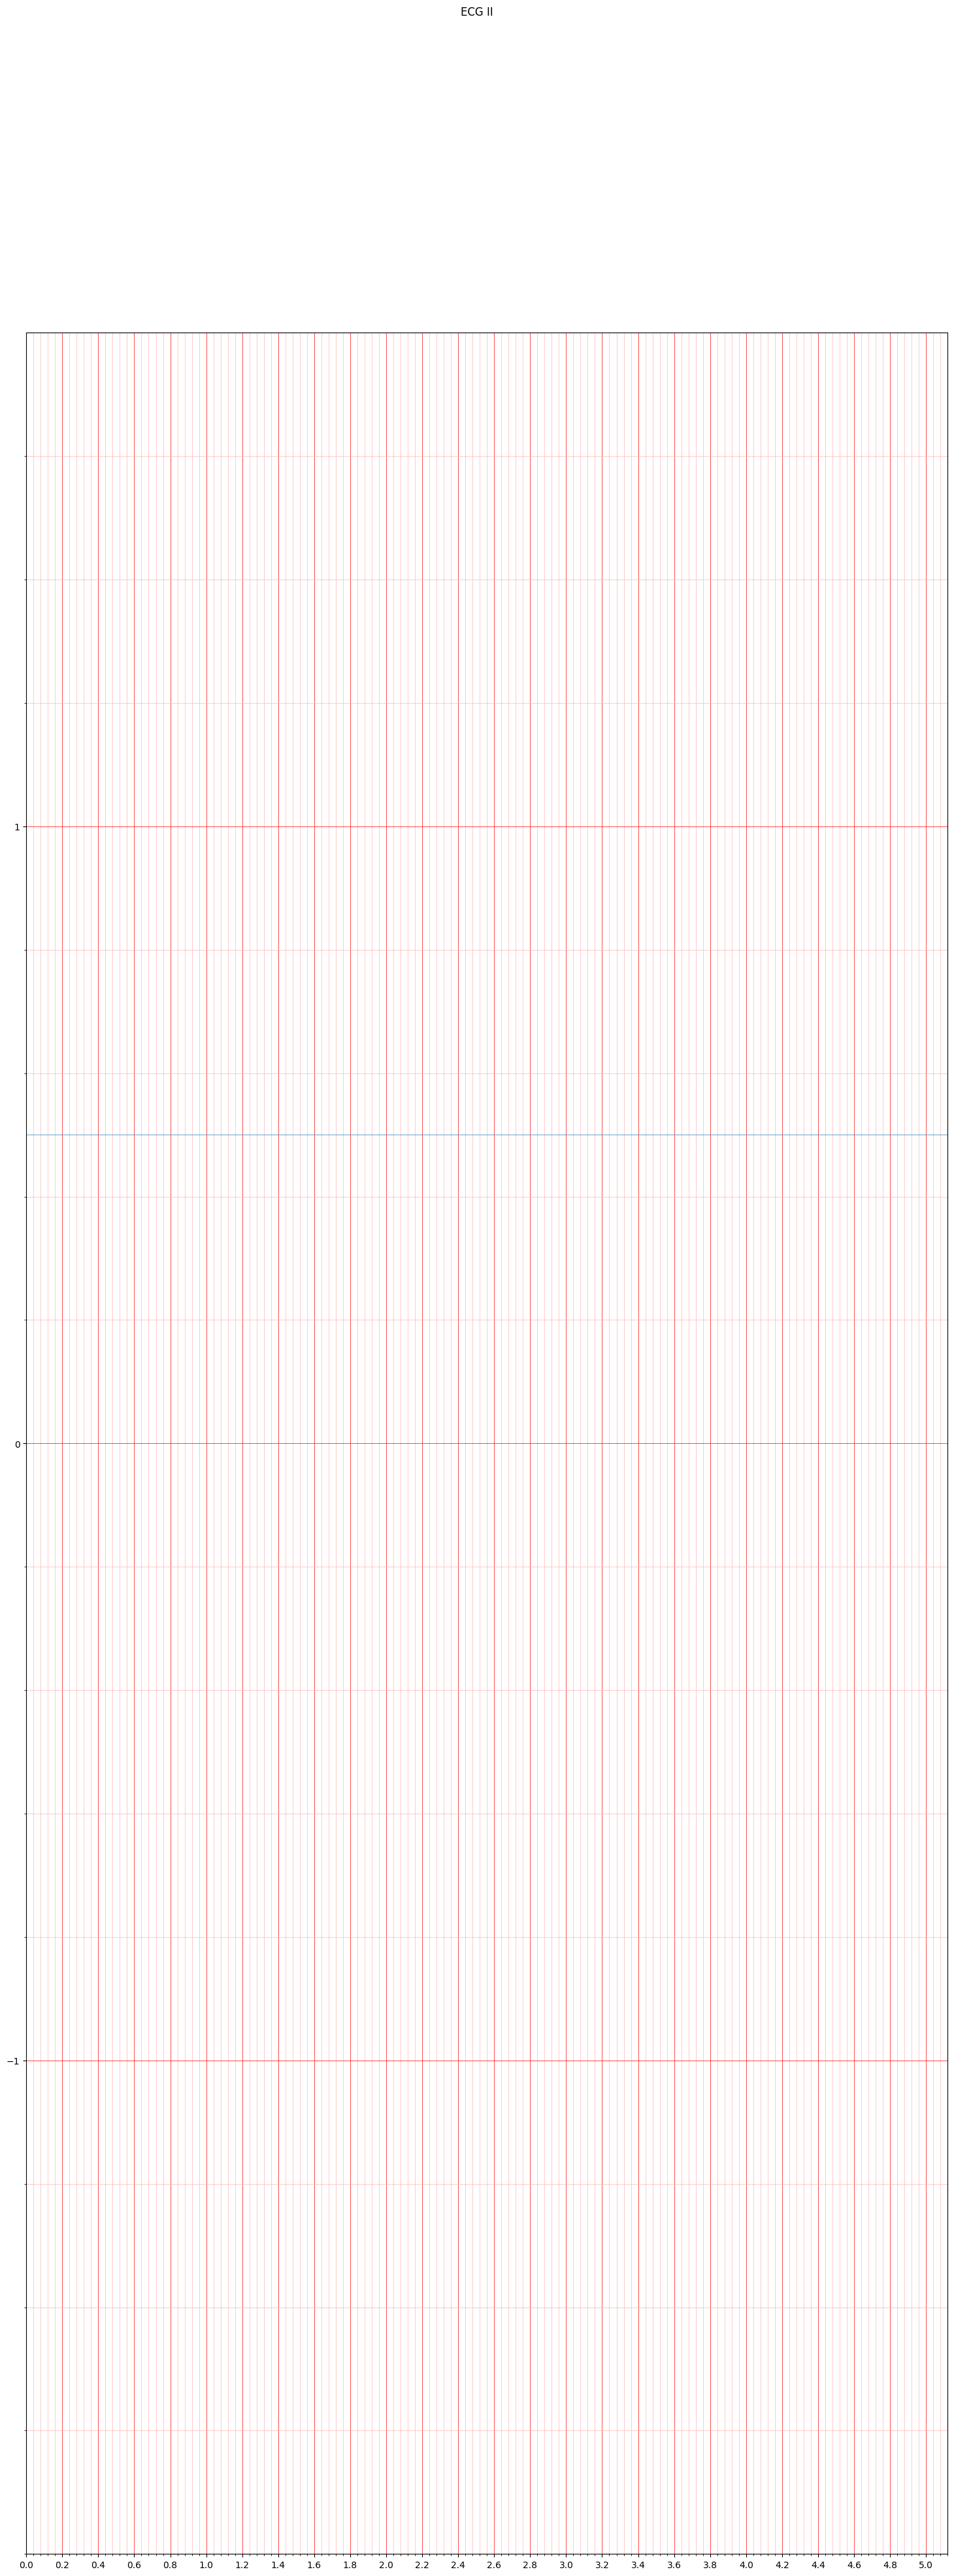

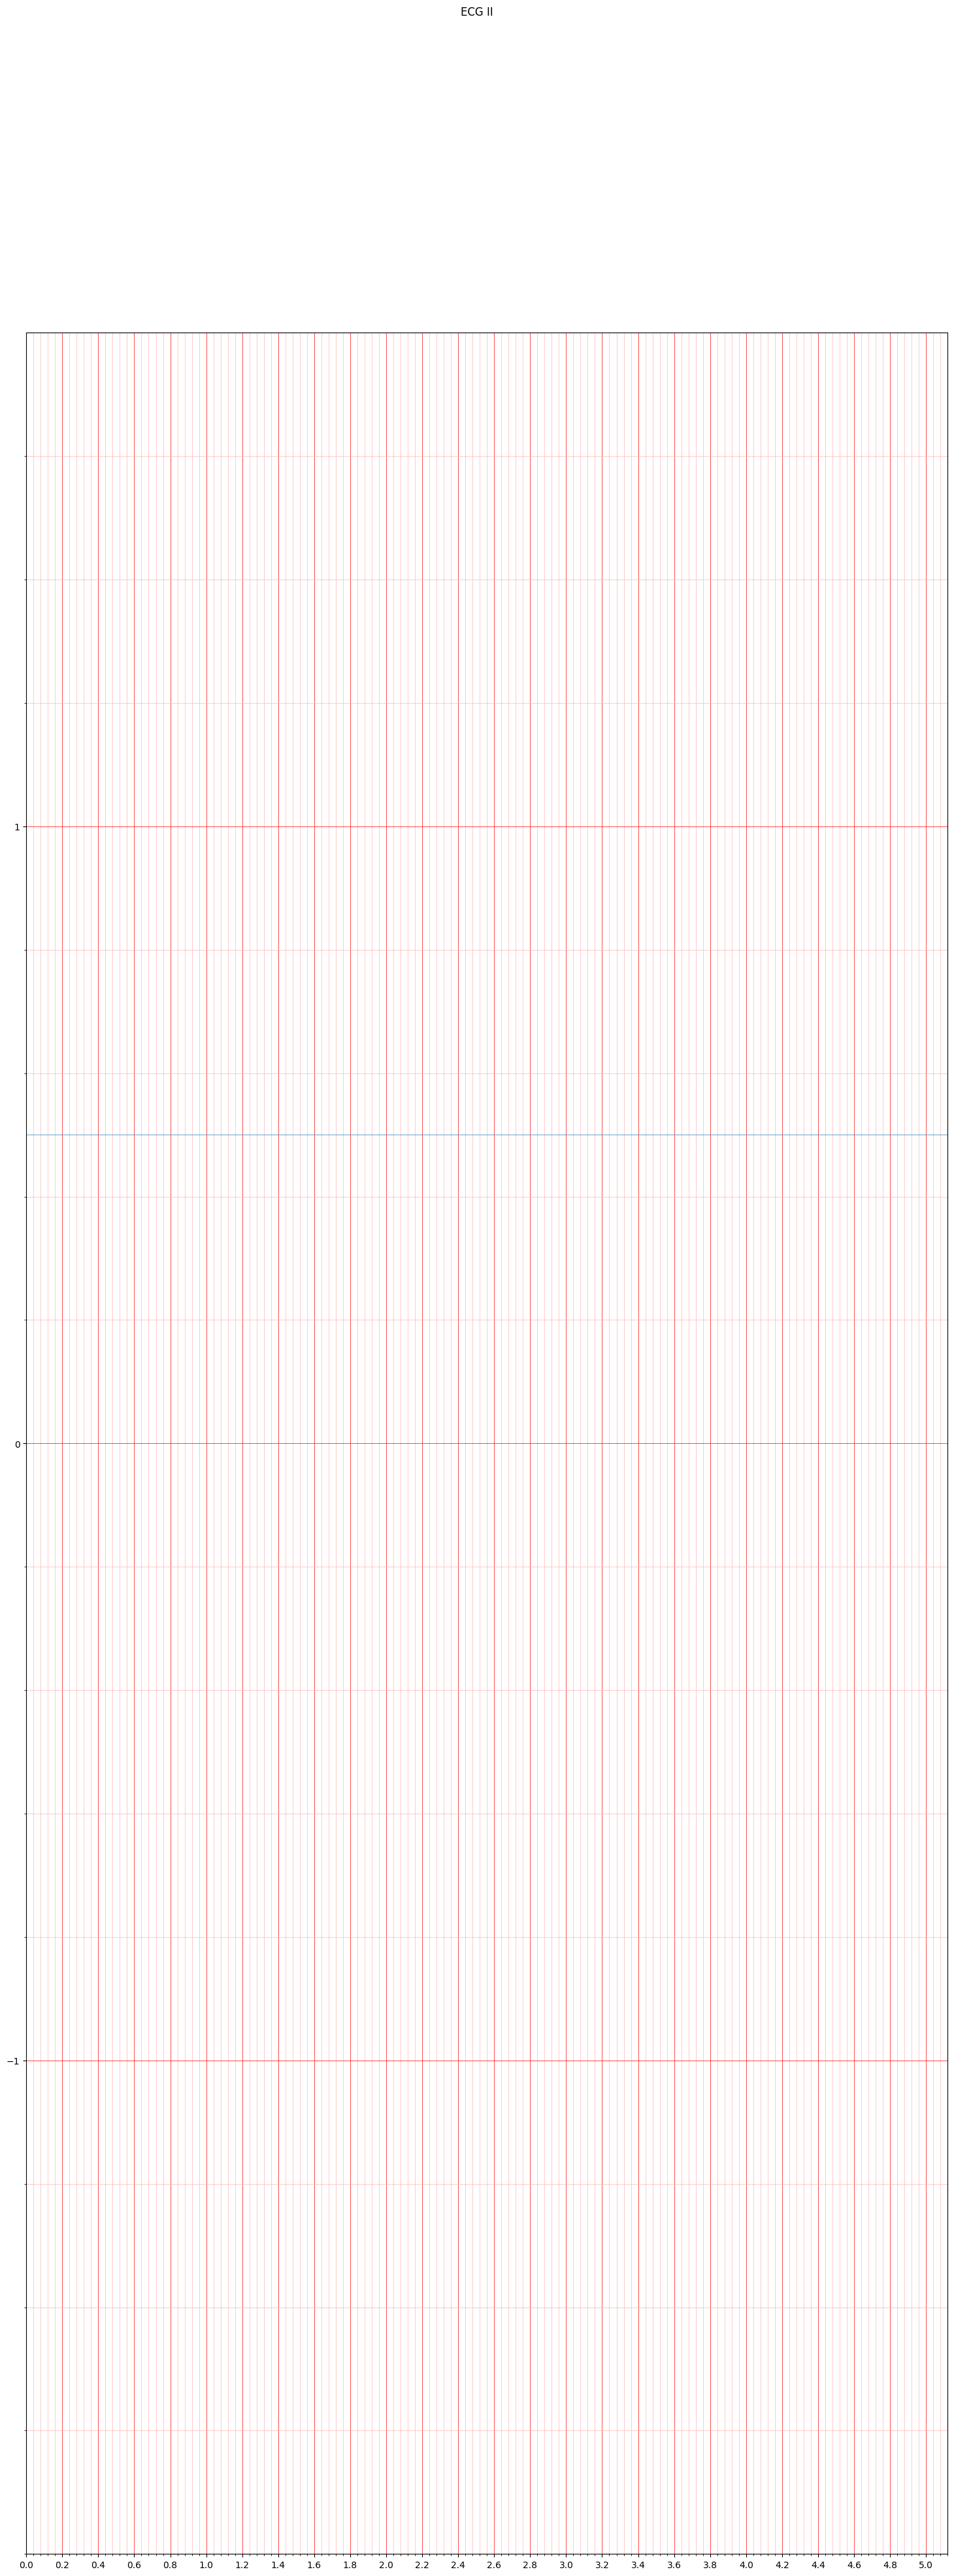

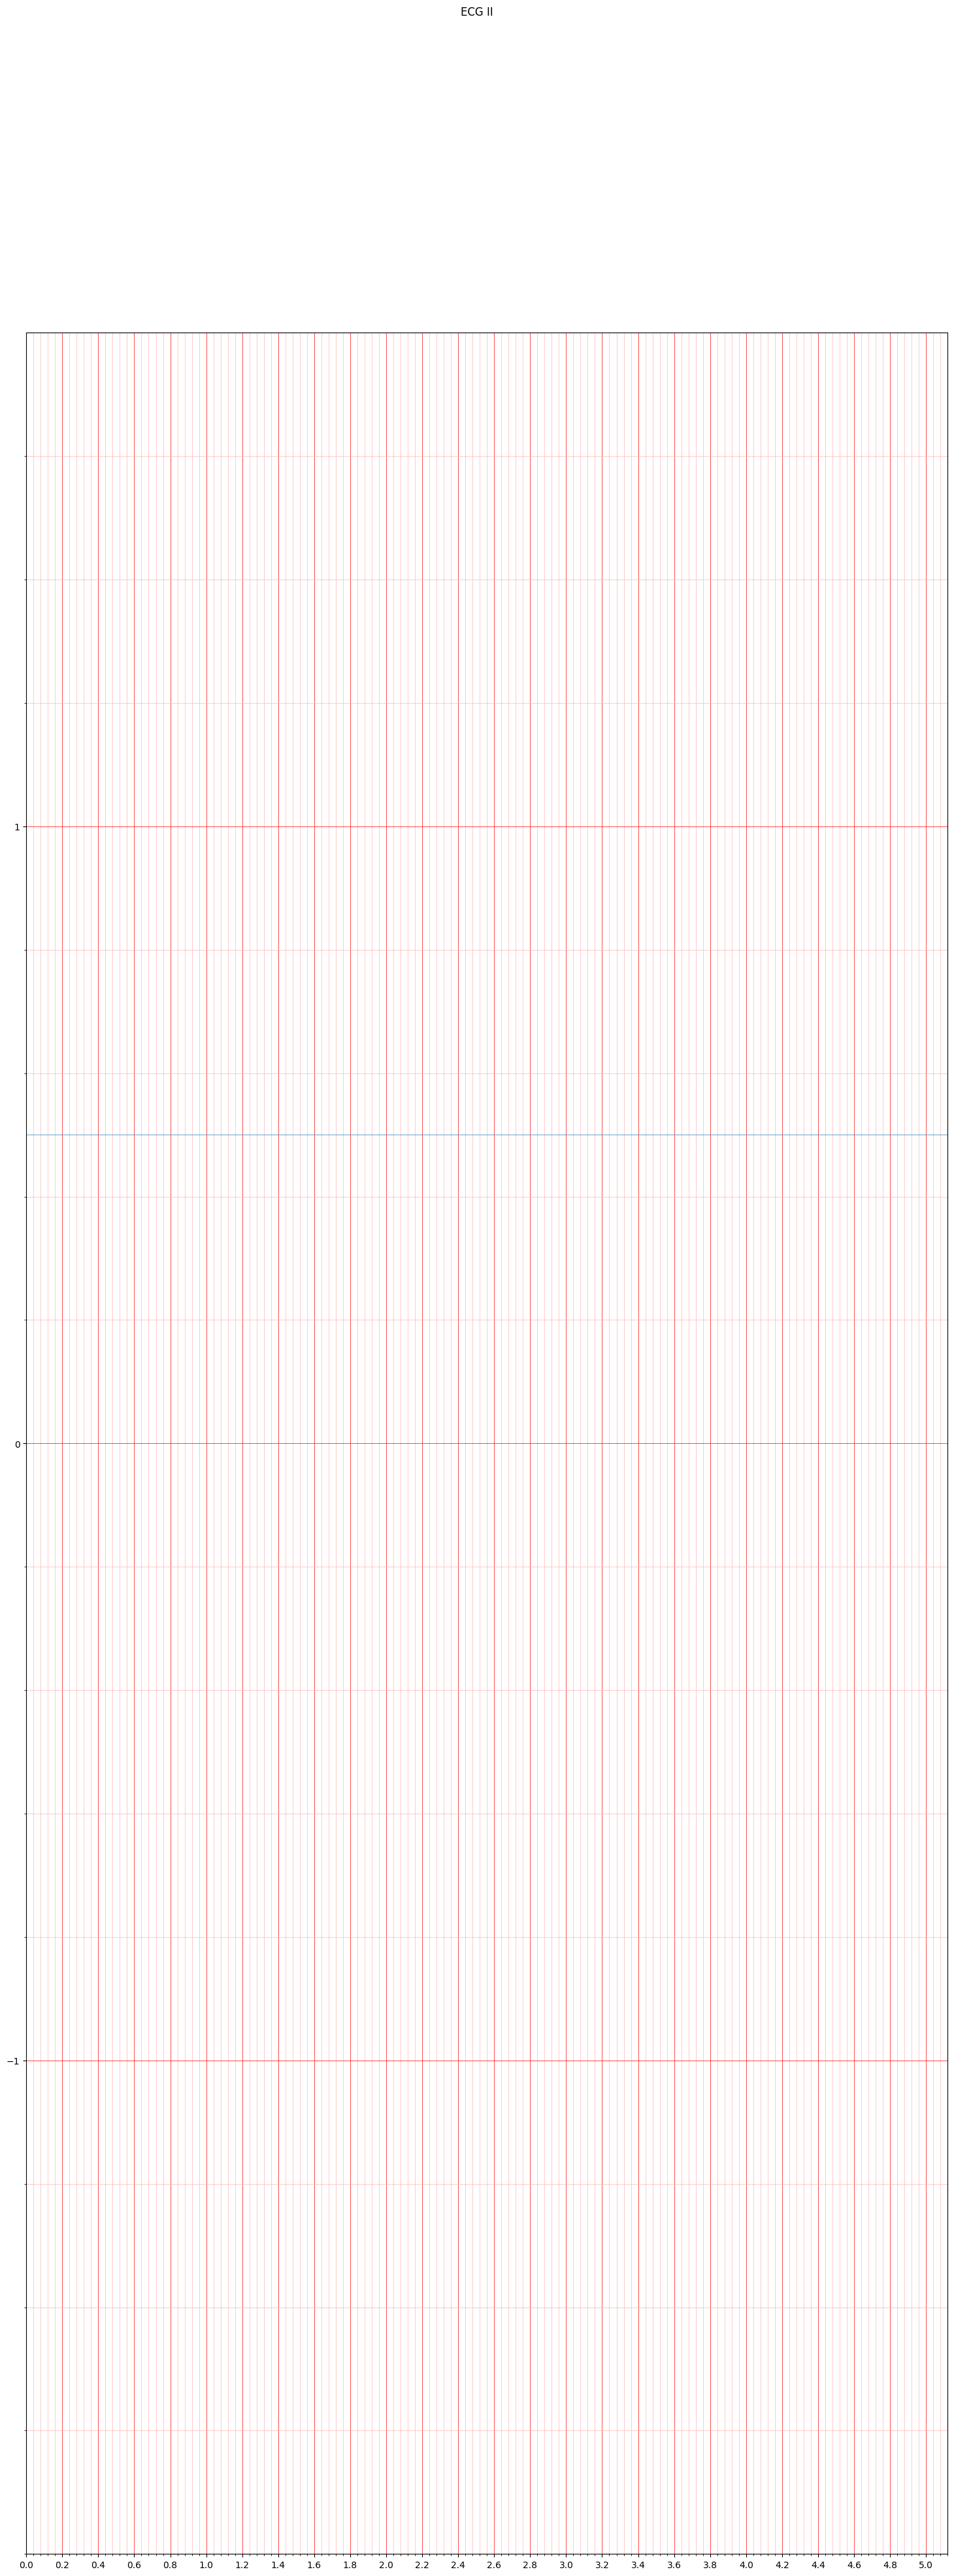

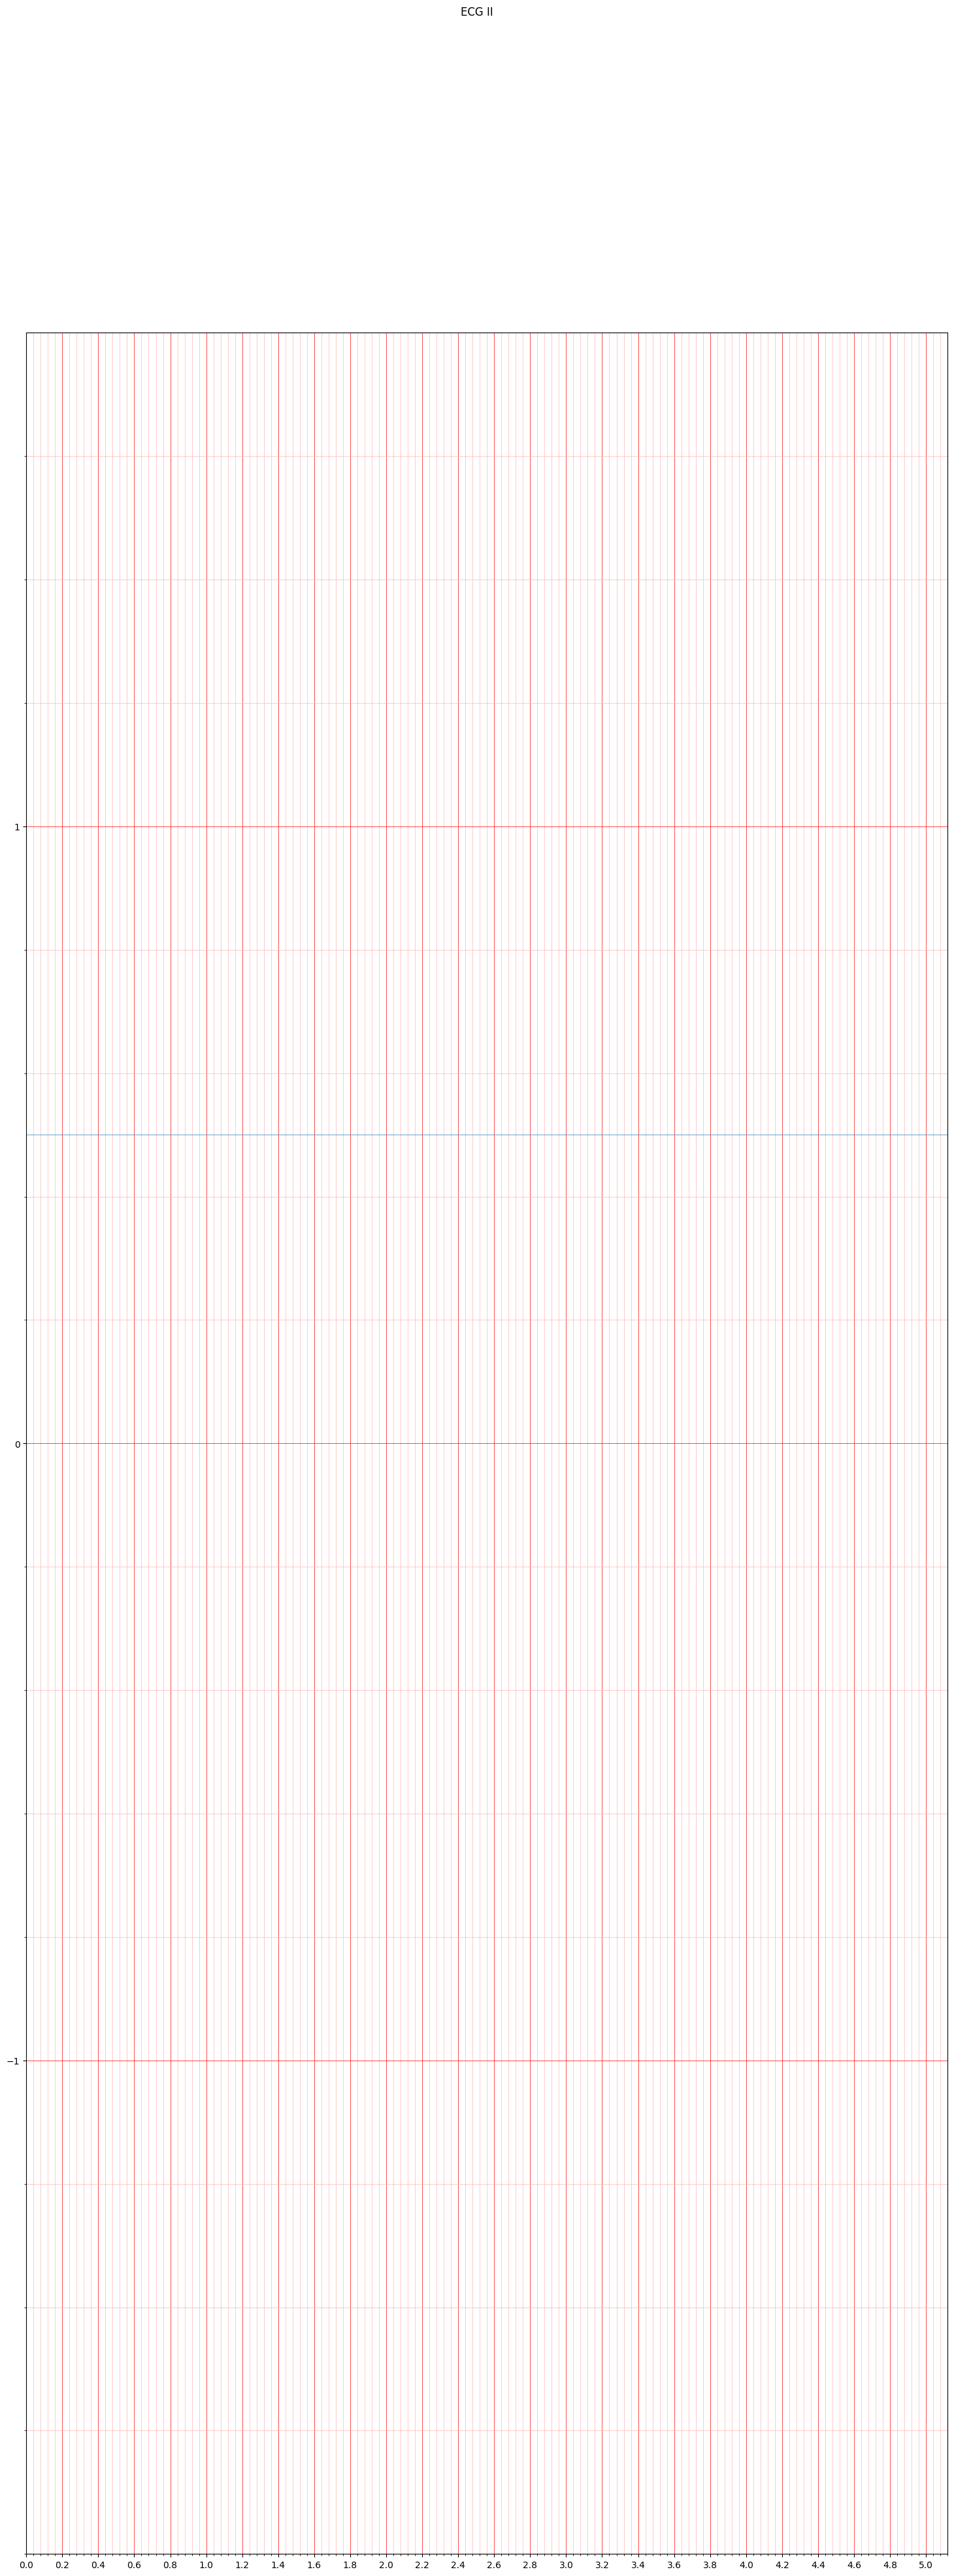

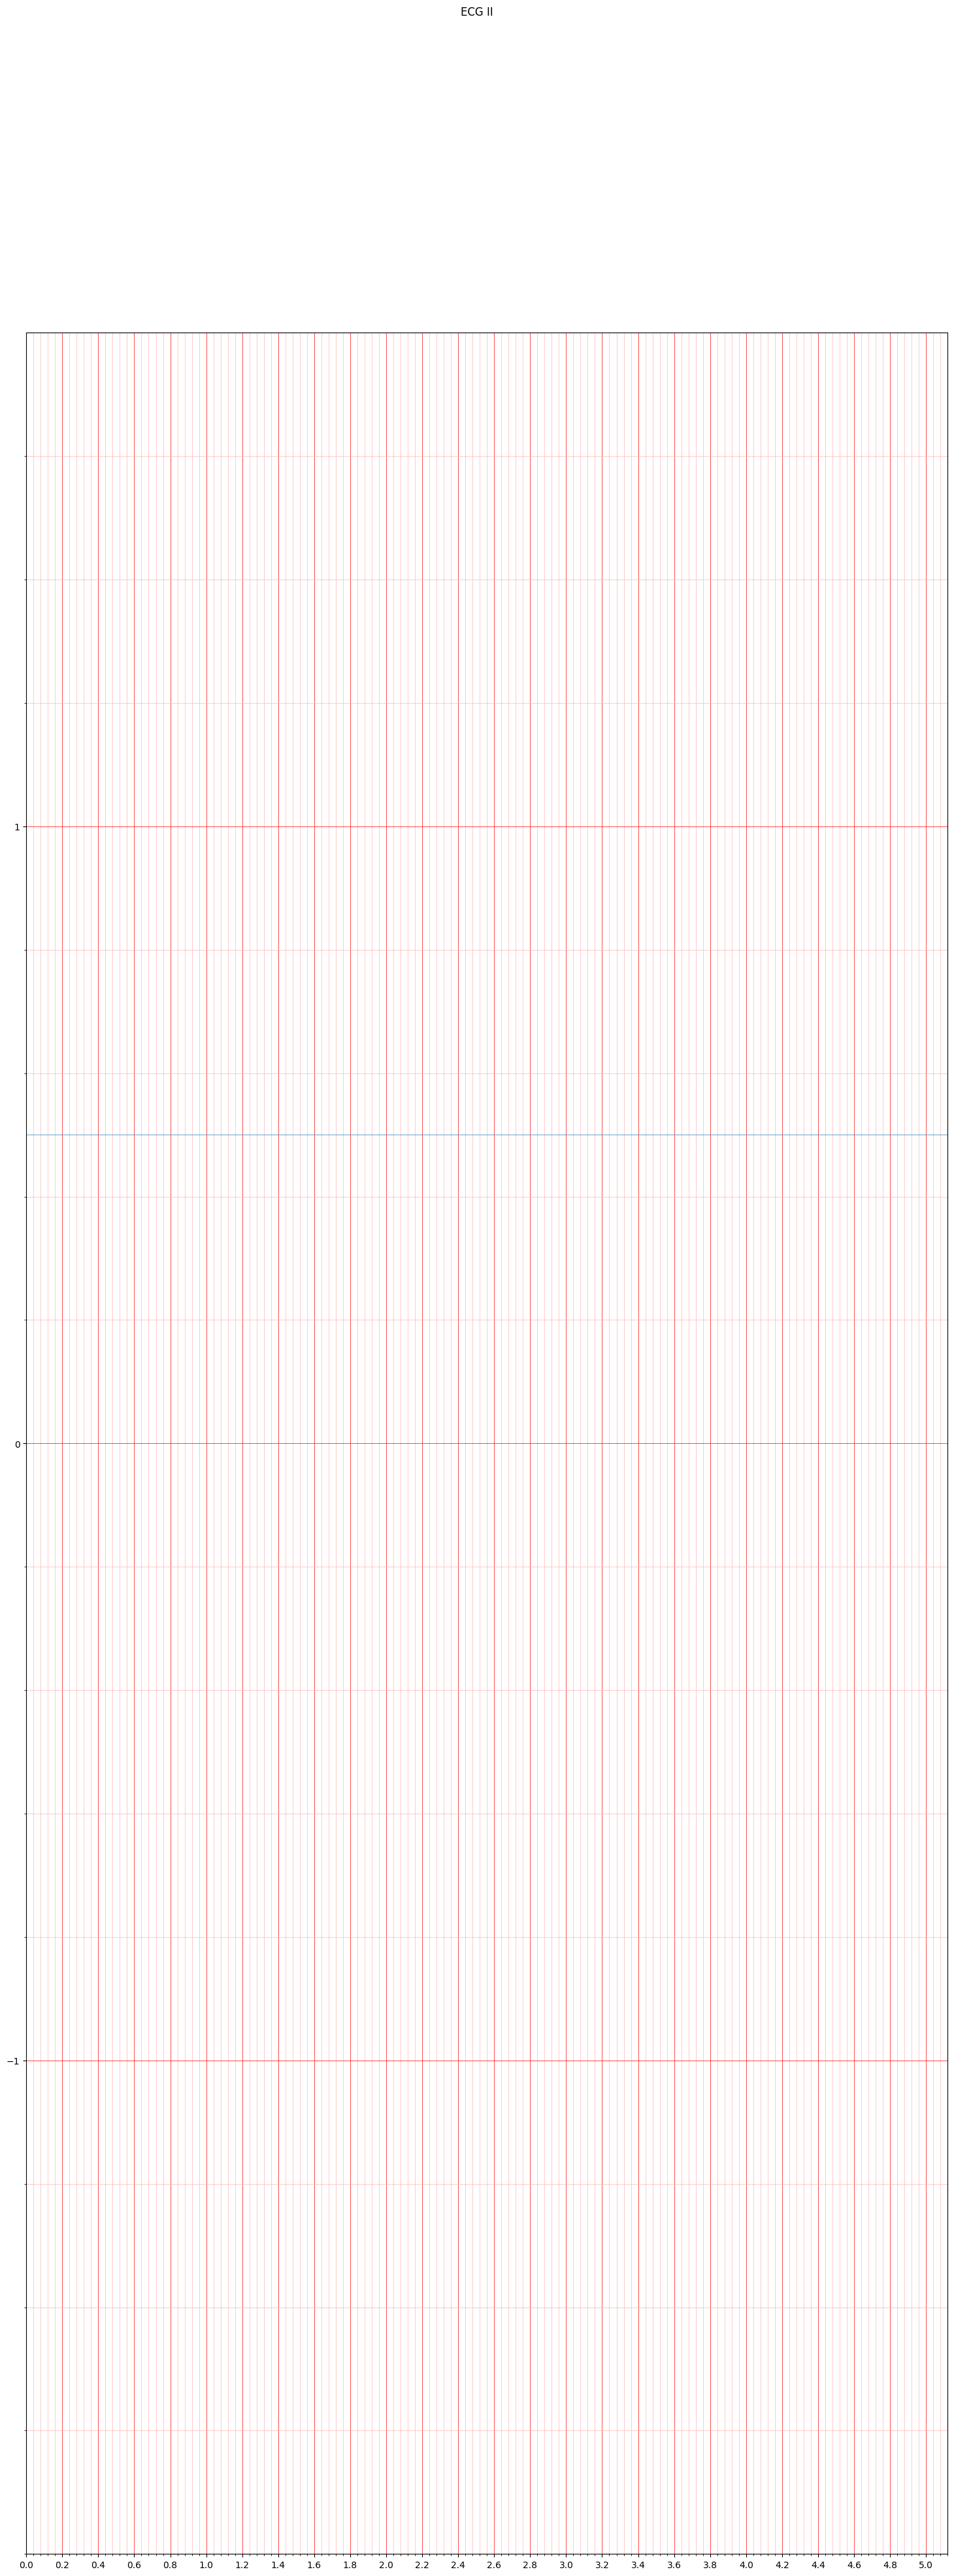

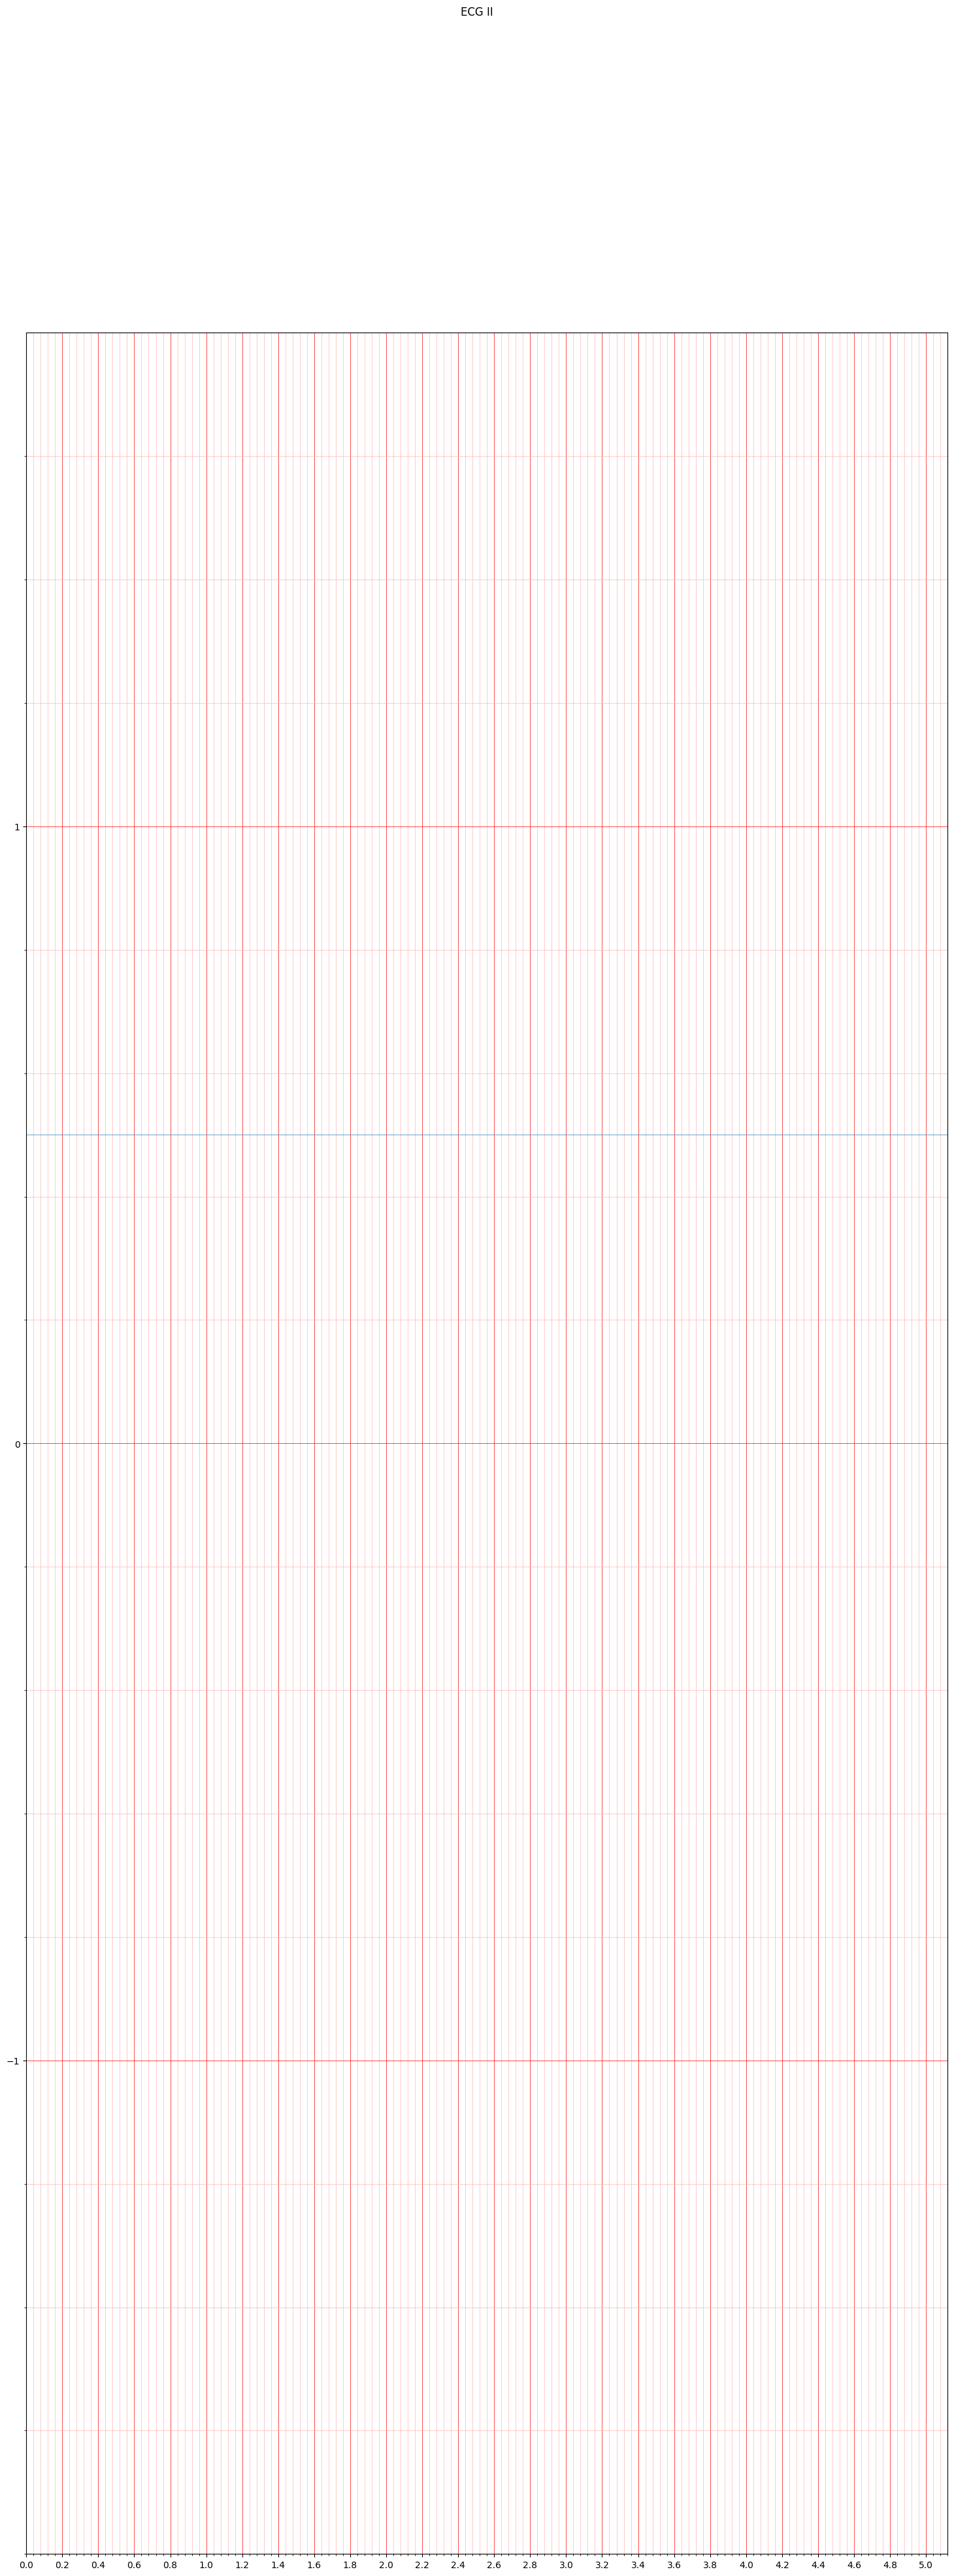

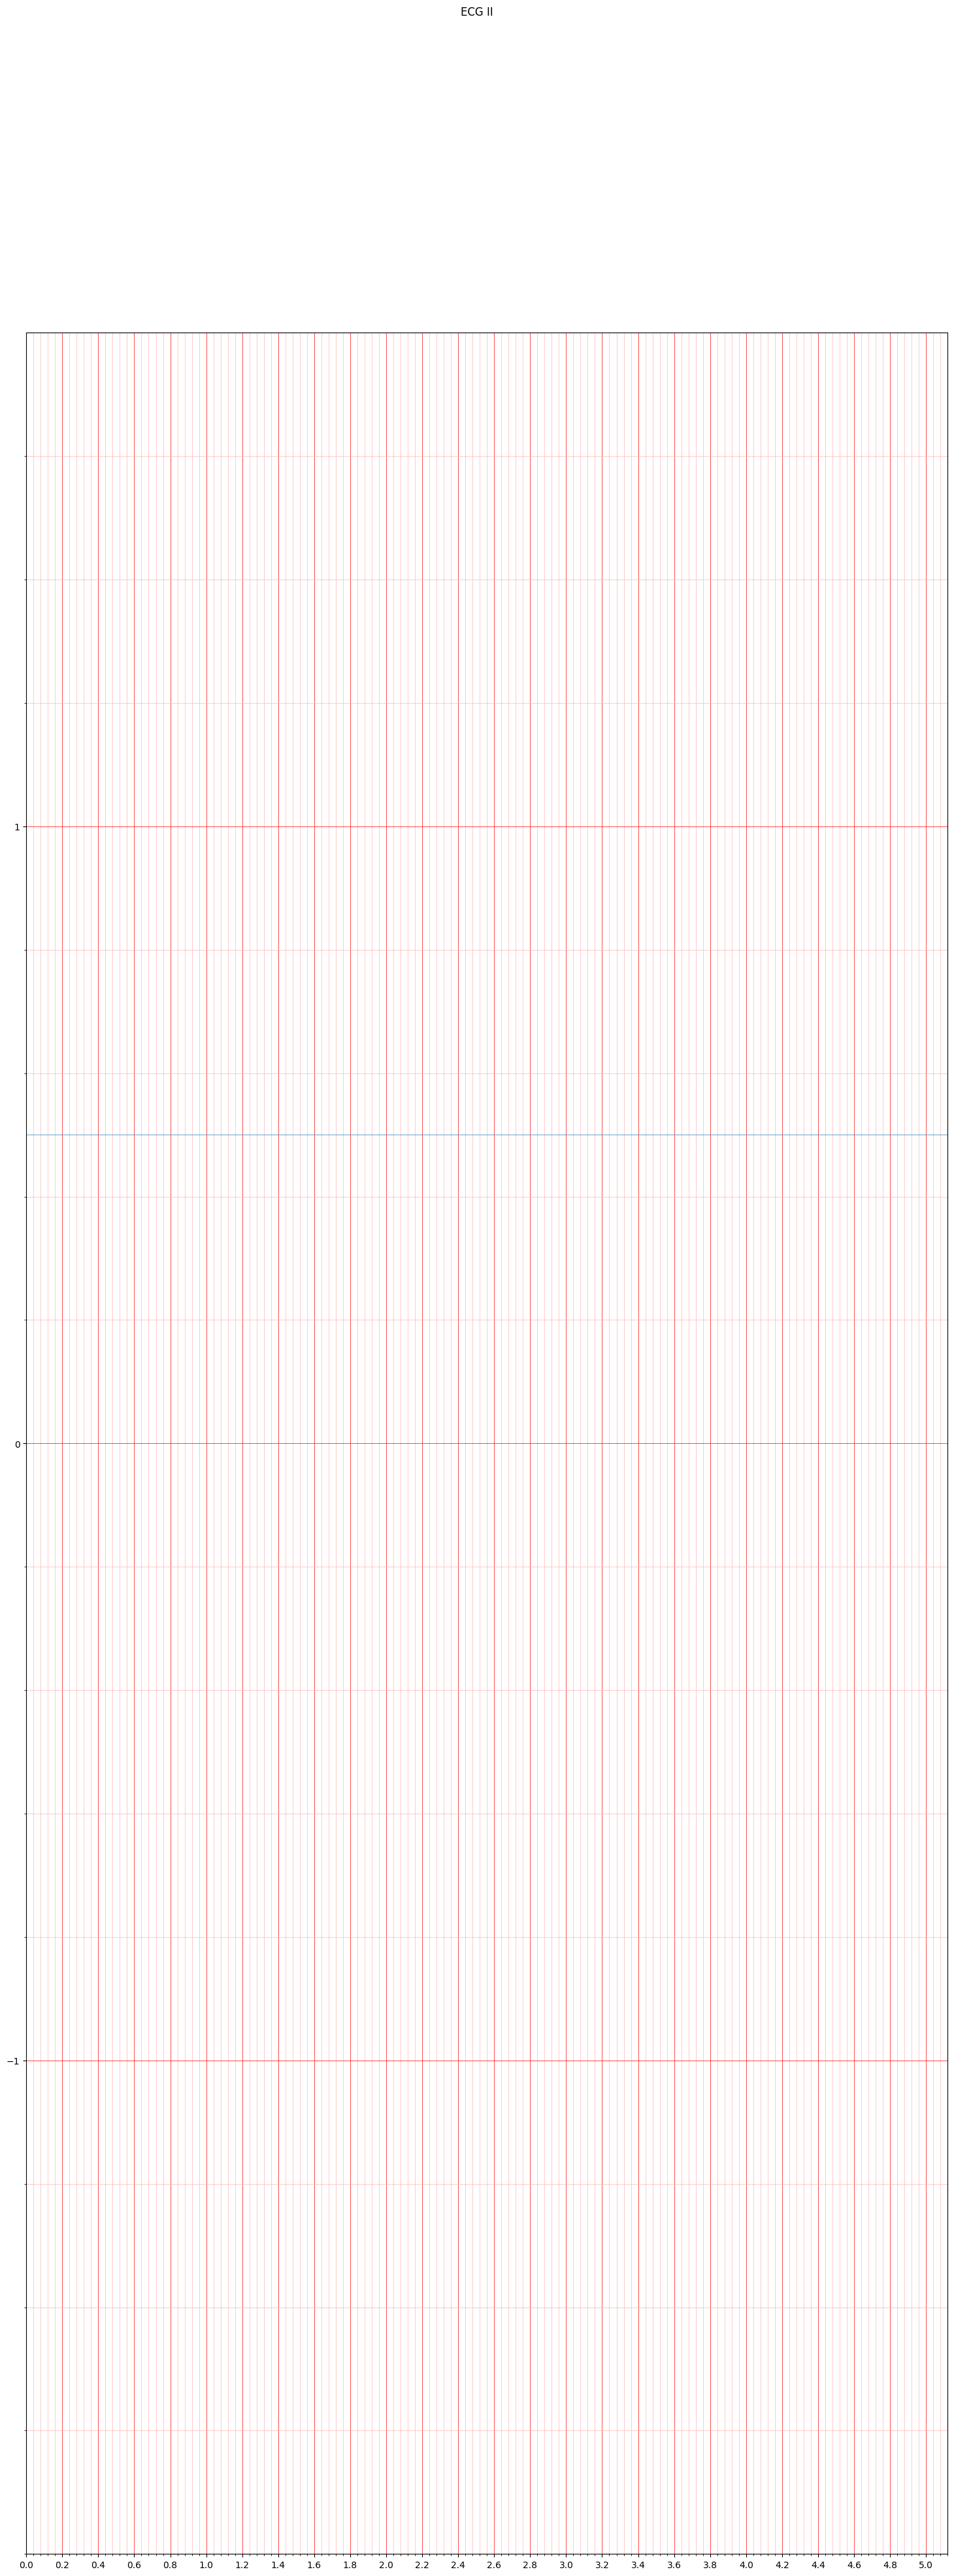

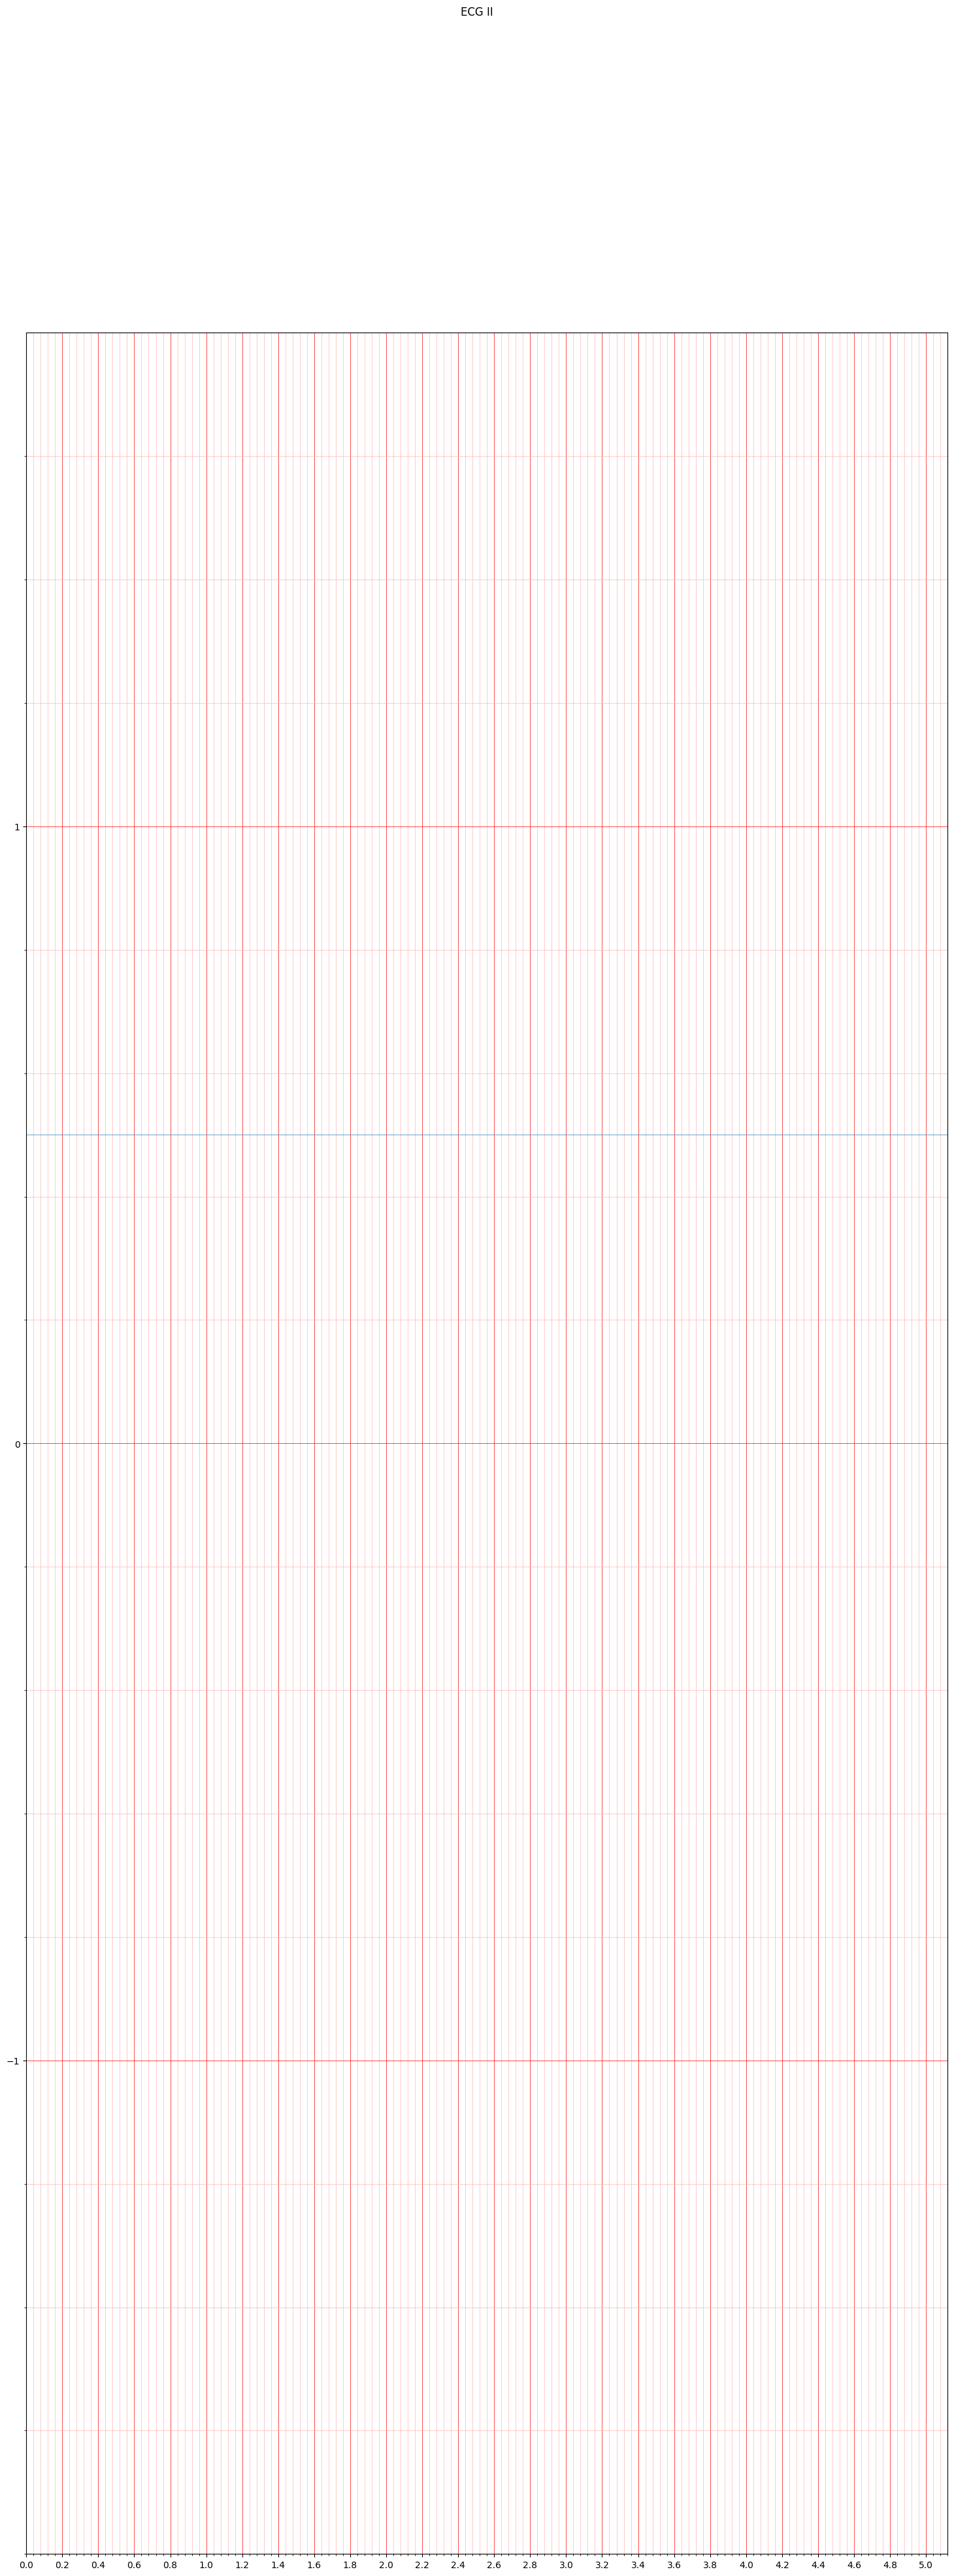

KeyboardInterrupt: 

In [21]:
for i in range(len(ecg)):
    ep.plot_1(ecg.iloc[i,:], sample_rate = 500, title = 'ECG II')
    ep.show()
    #ep.save_as_png(f'example_ecg{i}','./image/')

In [10]:
l=len(ecg)

In [11]:
type(l)

int